<a href="https://colab.research.google.com/github/nicolly-sak/HD-emg-analysis/blob/main/PDPD5_Mapa_de_Calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib import pylab
import scipy.signal
!pip install --upgrade numpy
import h5py
from numba import jit
import numba
import time
!pip install hickle
import hickle

In [ ]:
tabelas_correlacao_dict = hickle.load('/content/drive/MyDrive/PDPD/Dicionário/tabelas_correlacao_dict.hkl')

In [ ]:
#função para escolher cada caracteristica desejada

def selecionar(df, subjx = "todos", sessionx= "todos", speedx= "todos", movementx= "todos", channels_emgx= "todos", channels_glovex= "todos") :
  queryexpression= " "
  if subjx != "todos" :
    queryexpression= queryexpression + 'subj == "'+ subjx +'" &' 
  if sessionx != "todos" :
    queryexpression= queryexpression + ' session =='+ str(sessionx) + '&'
  if speedx != "todos" :
    queryexpression= queryexpression + ' speed =="'+ speedx + '" &'
  
  if channels_emgx != "todos" :
    queryexpression= queryexpression + ' channels_emg =="'+ channels_emgx + '" &'
  
  if channels_glovex != "todos" :
    queryexpression= queryexpression + ' channels_glove =="'+ channels_glovex + '" &'

  elif movementx == 'todos' :
    if queryexpression[-1].find("&") == 0:
      queryexpression= queryexpression[0:-1]
  if movementx != "todos" :
    queryexpression= queryexpression +  ' movement =="'+ movementx +'"'   
  else :
    if queryexpression[-1].find("&") == 0:
      queryexpression= queryexpression[0:-1]

  if queryexpression == " ":
    w= df   
  else:
    w= df.query(queryexpression)
  
  print(queryexpression)
  
  return w

In [ ]:
selecionar(tabelas_correlacao_dict[1], speedx= "fast", movementx= "point")

subj: todos
  speed =="fast" & movement =="point"


,subj,movement,channels_emg,channels_glove,correlacao,session,speed
0,subj01,point,MA1,Thumb_Roll,-0.500000,2,fast
1,subj01,point,MA2,Thumb_Roll,-0.500000,2,fast
2,subj01,point,MA3,Thumb_Roll,-0.406250,2,fast
3,subj01,point,MA4,Thumb_Roll,-0.410156,2,fast
4,subj01,point,MA5,Thumb_Roll,-0.410156,2,fast
...,...,...,...,...,...,...,...
2407,subj01,point,EXG4,Wrist_Abduction,-0.500000,2,fast
2408,subj01,point,EXG5,Wrist_Abduction,-0.500000,2,fast
2409,subj01,point,EXG6,Wrist_Abduction,-0.500000,2,fast
2410,subj01,point,EXG7,Wrist_Abduction,-0.500000,2,fast


In [ ]:
matriz = dict()
tabela = dict()

movement: cilinder
subj: todos
  speed =="slow" & movement =="cilinder"


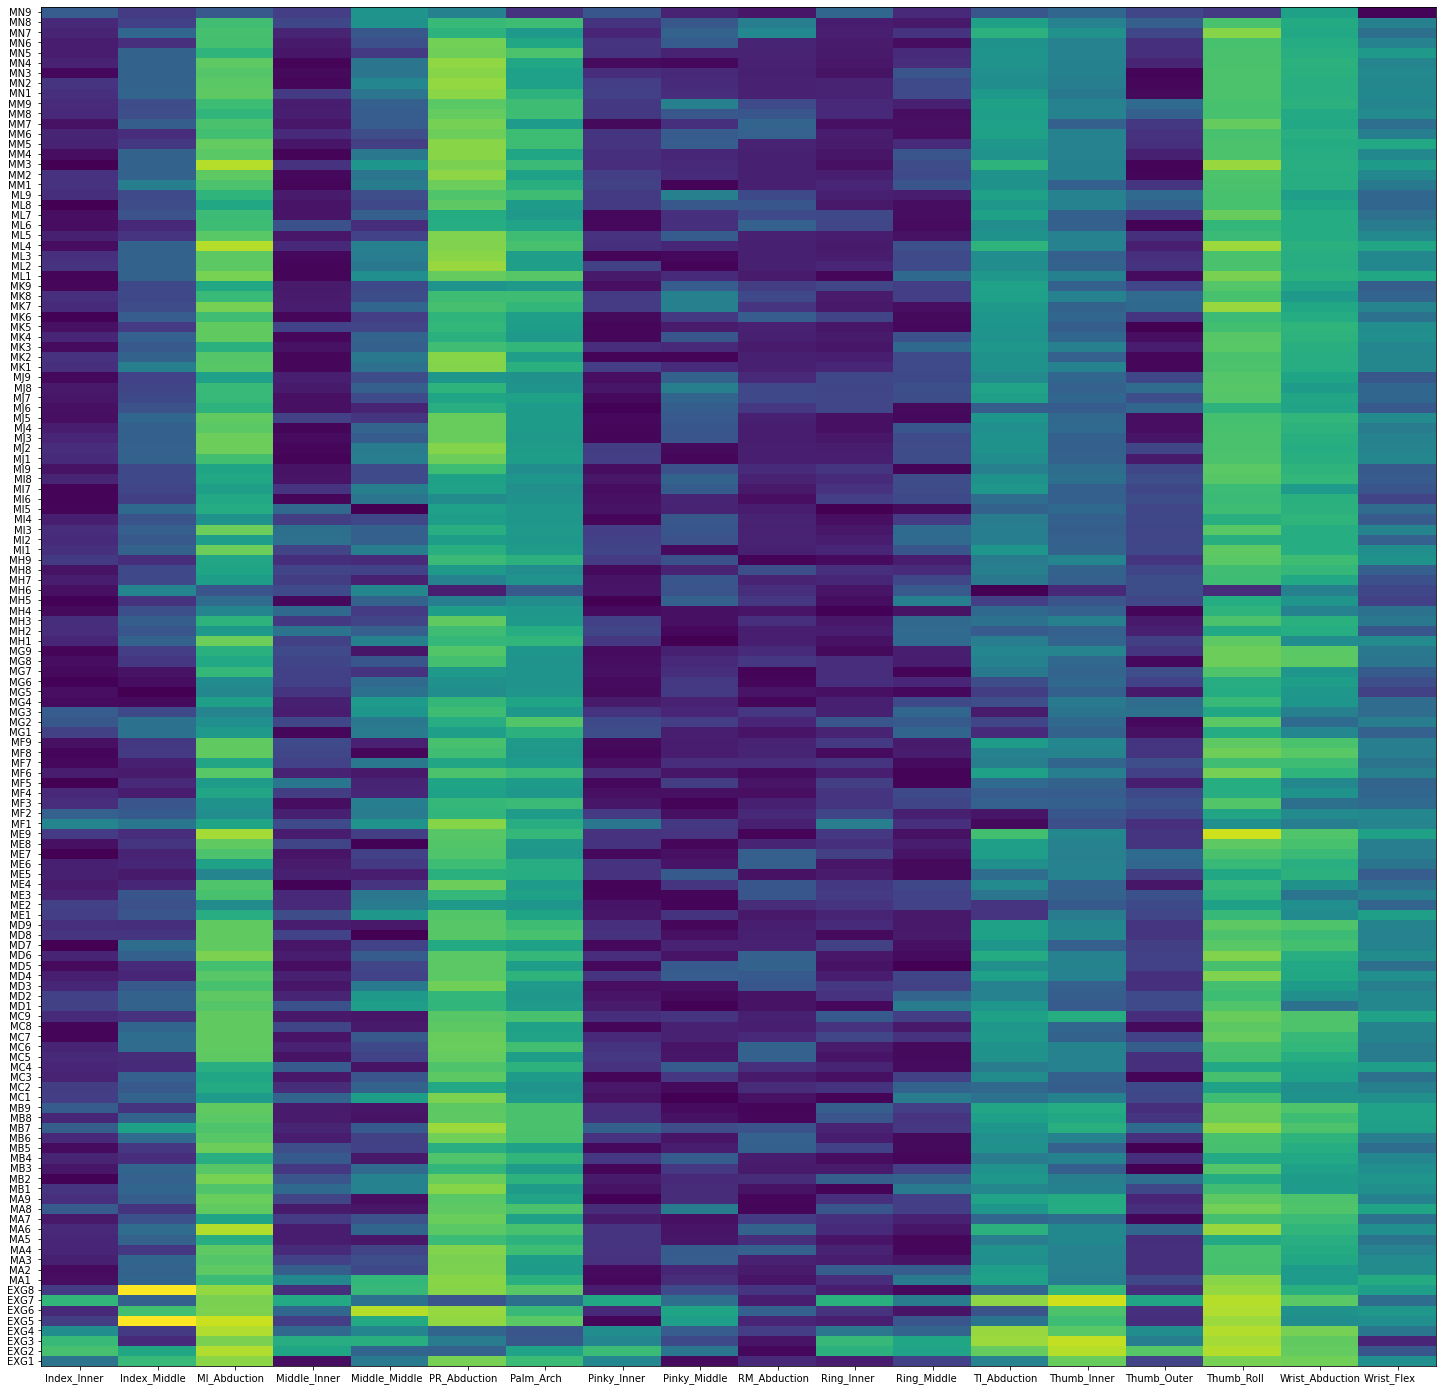

movement: point
subj: todos
  speed =="slow" & movement =="point"


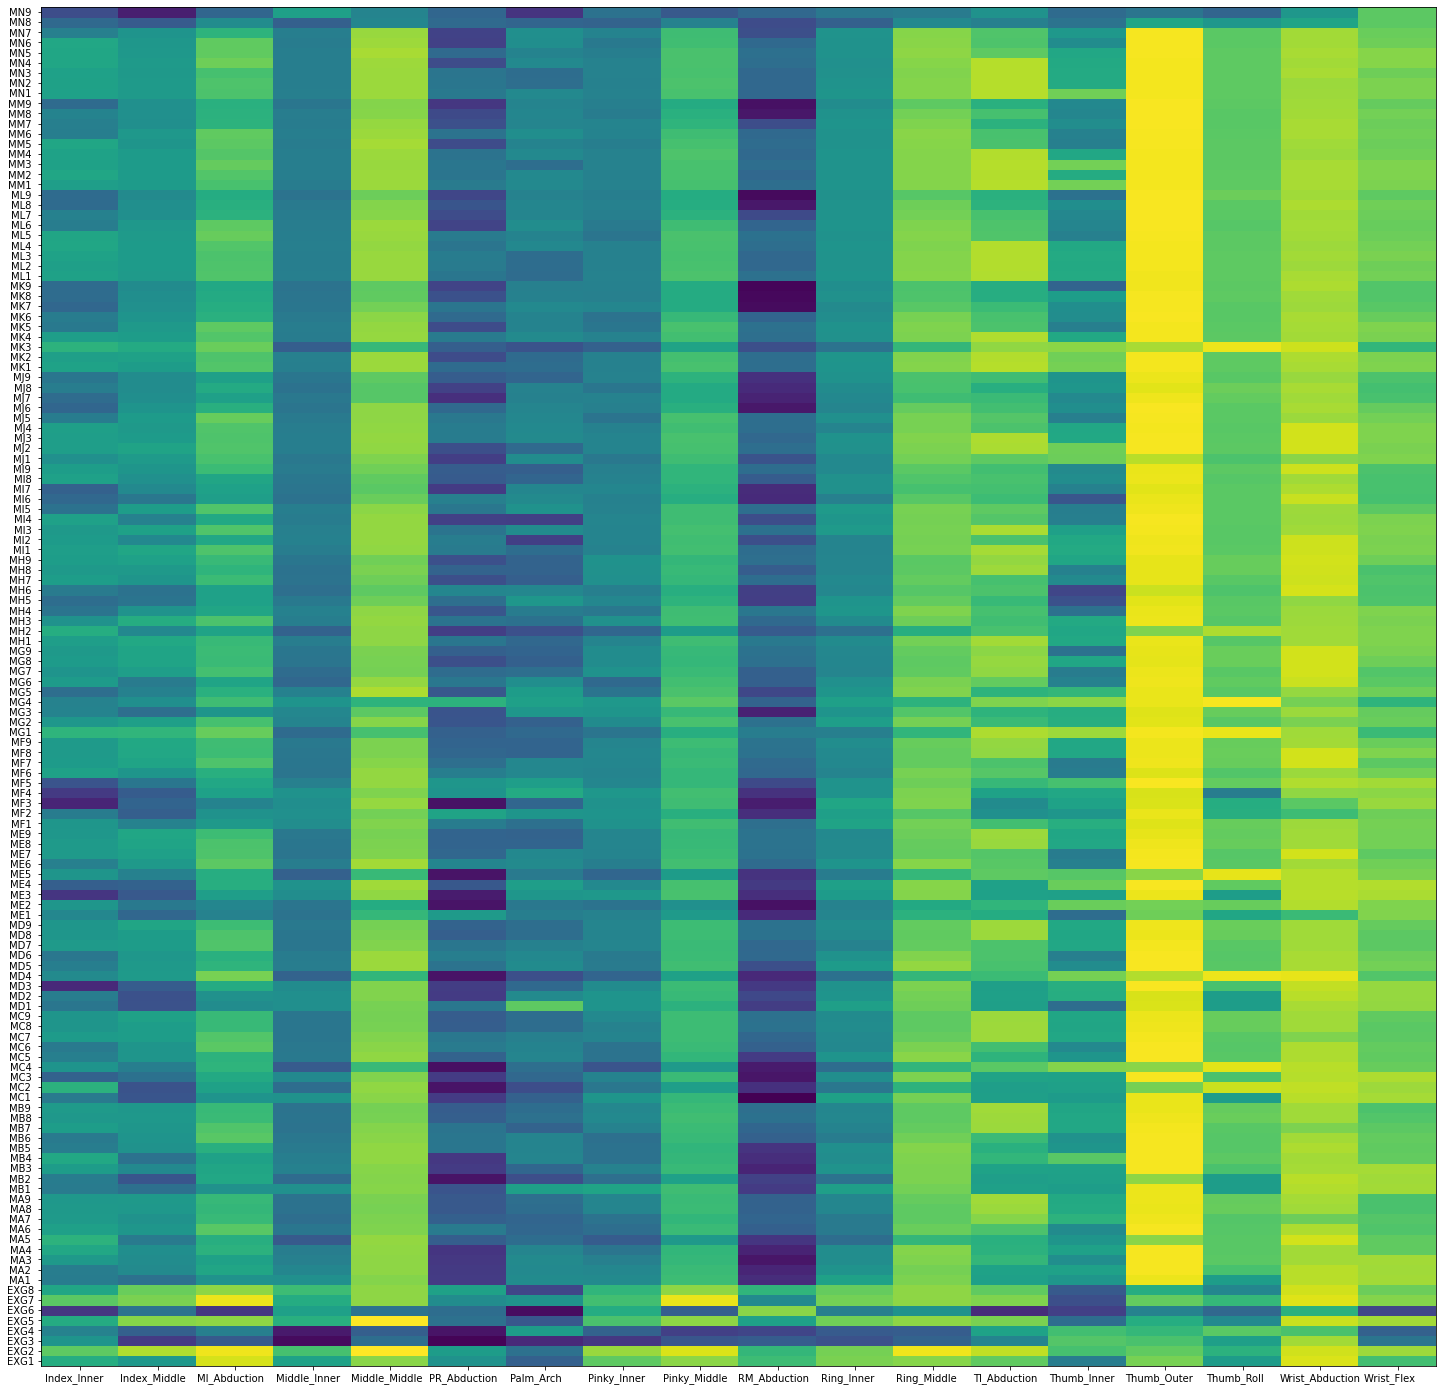

movement: 3digit
subj: todos
  speed =="slow" & movement =="3digit"


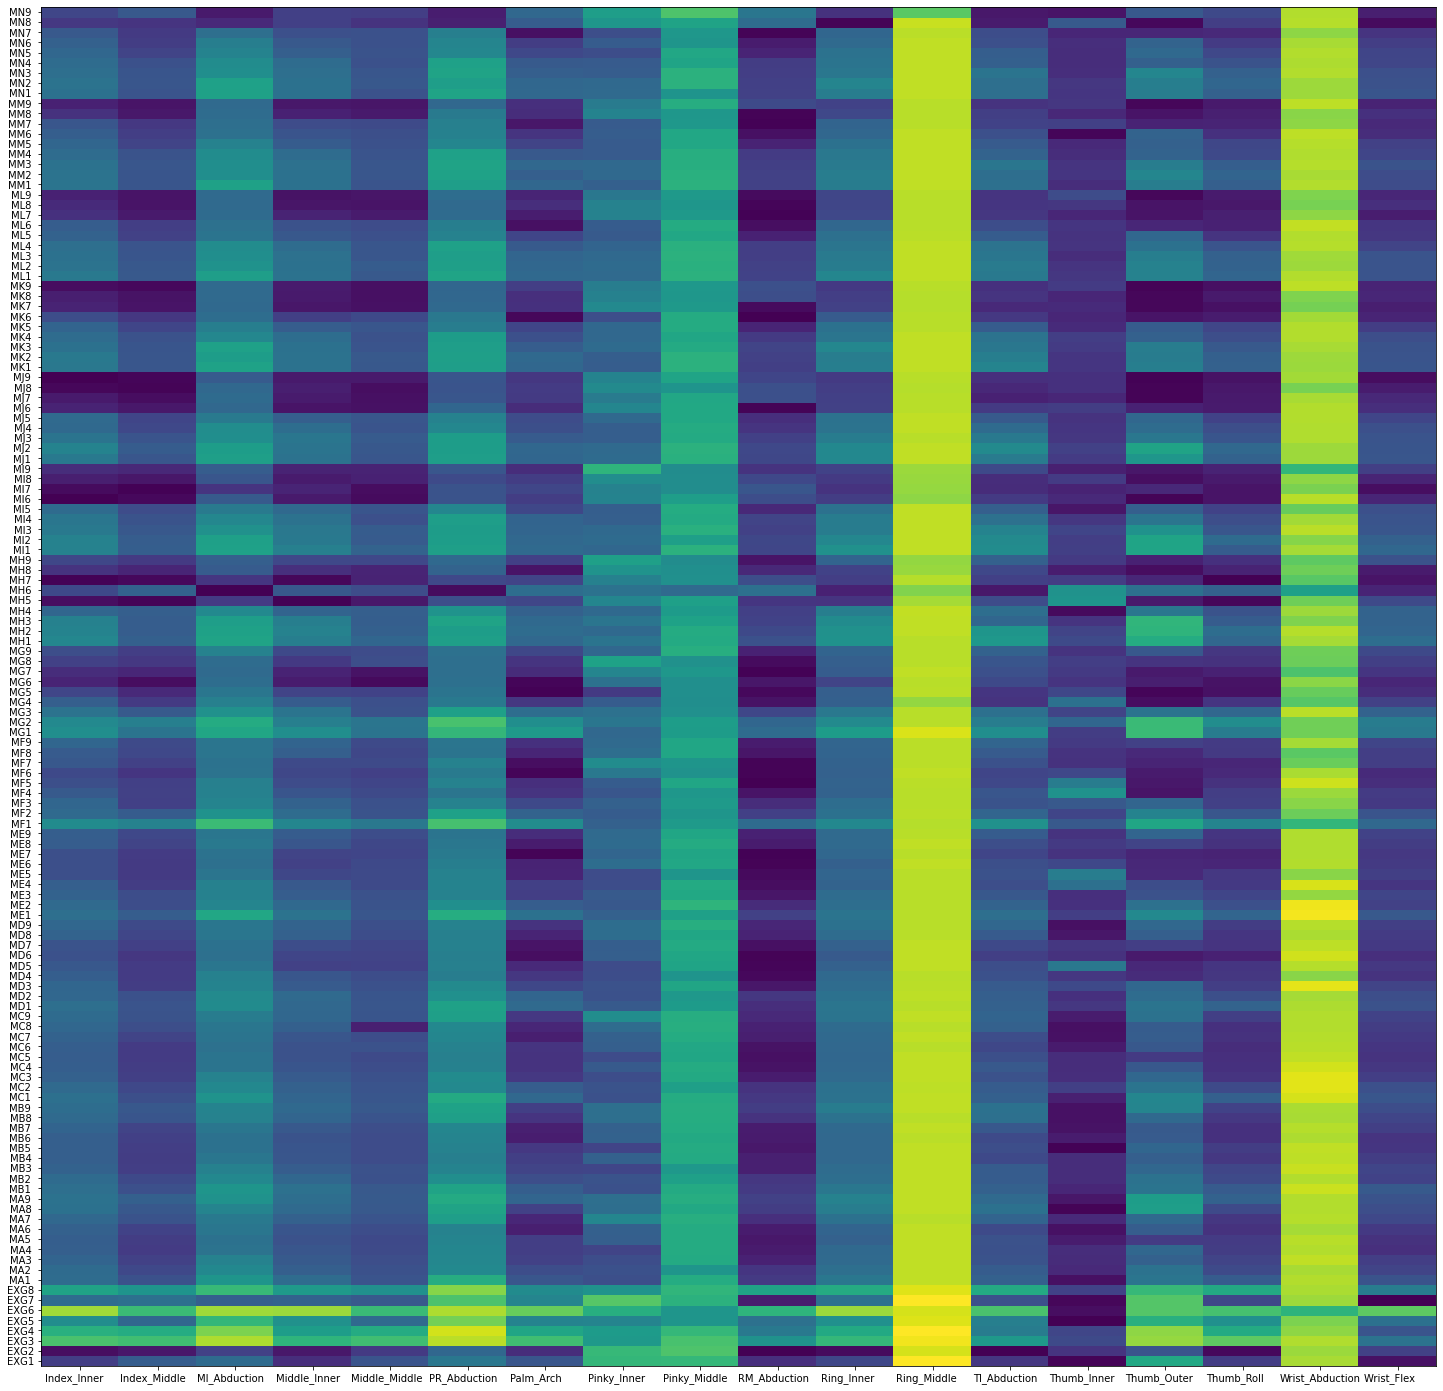

movement: thumbFlex
subj: todos
  speed =="slow" & movement =="thumbFlex"


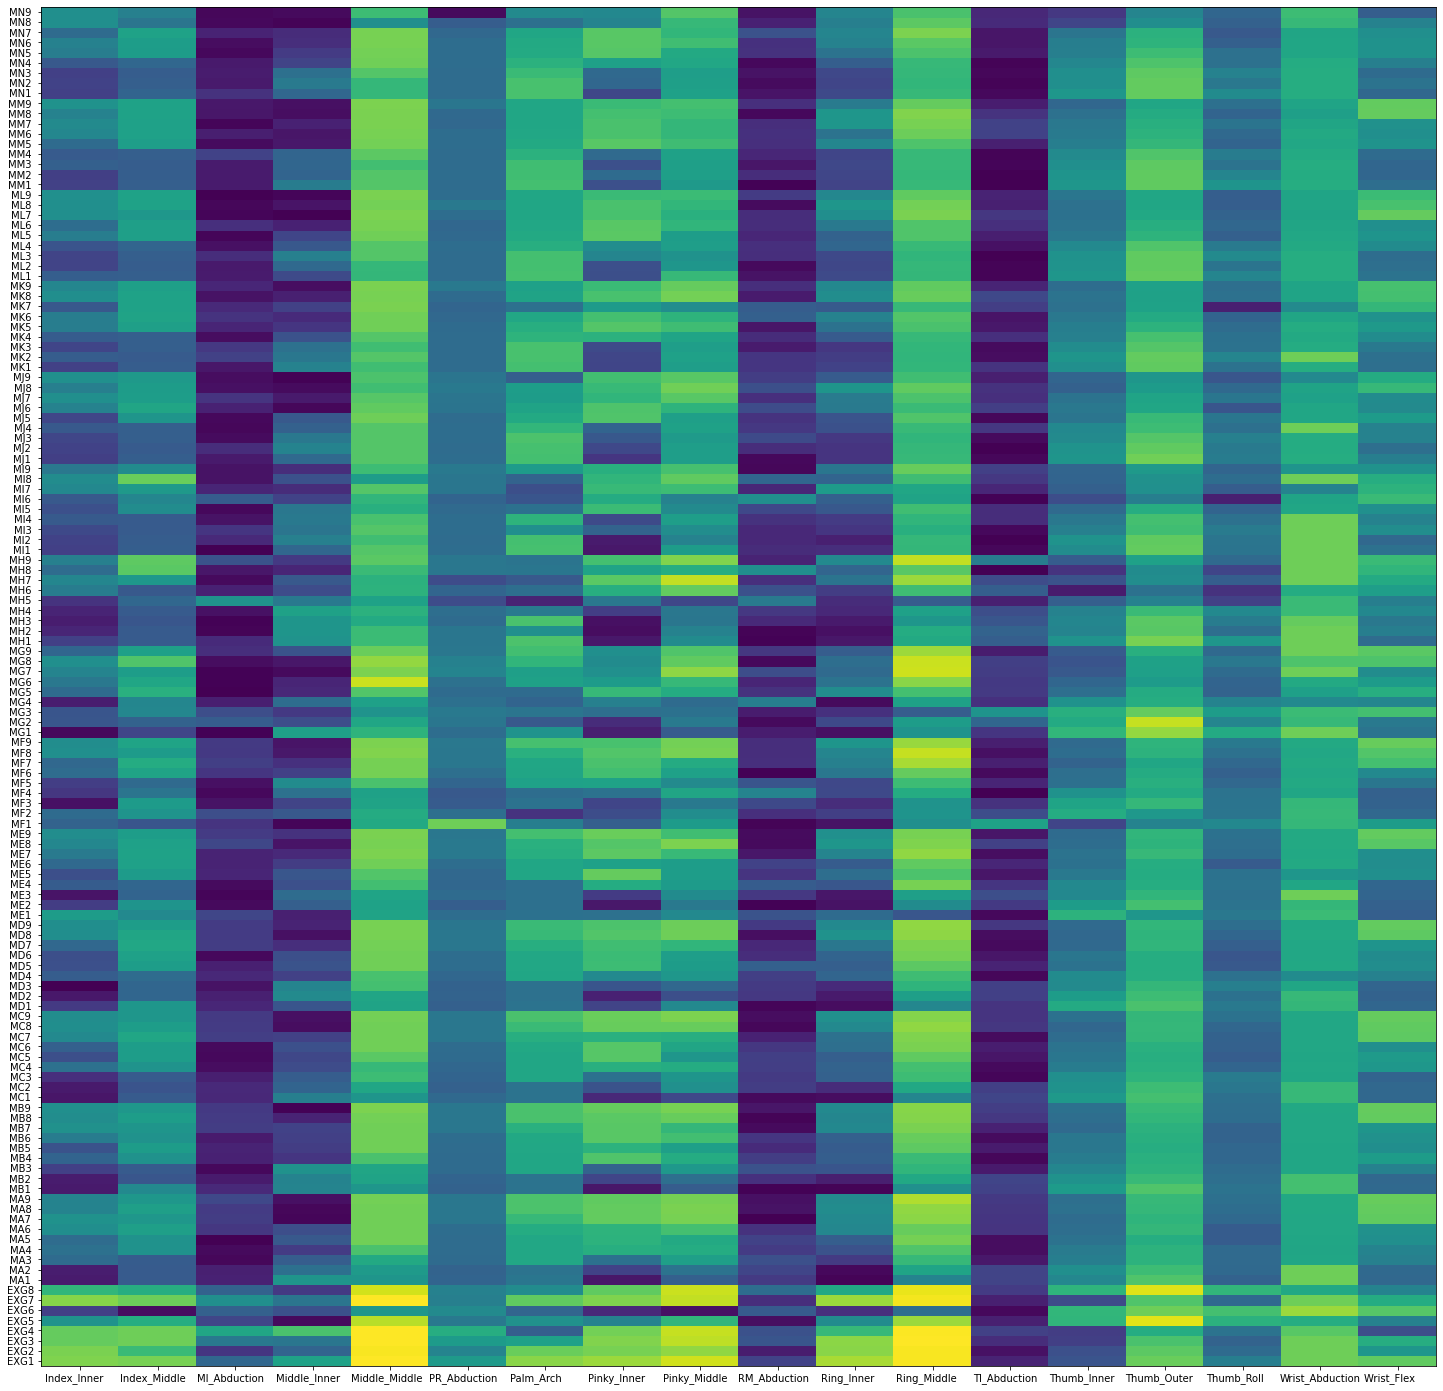

movement: index
subj: todos
  speed =="slow" & movement =="index"


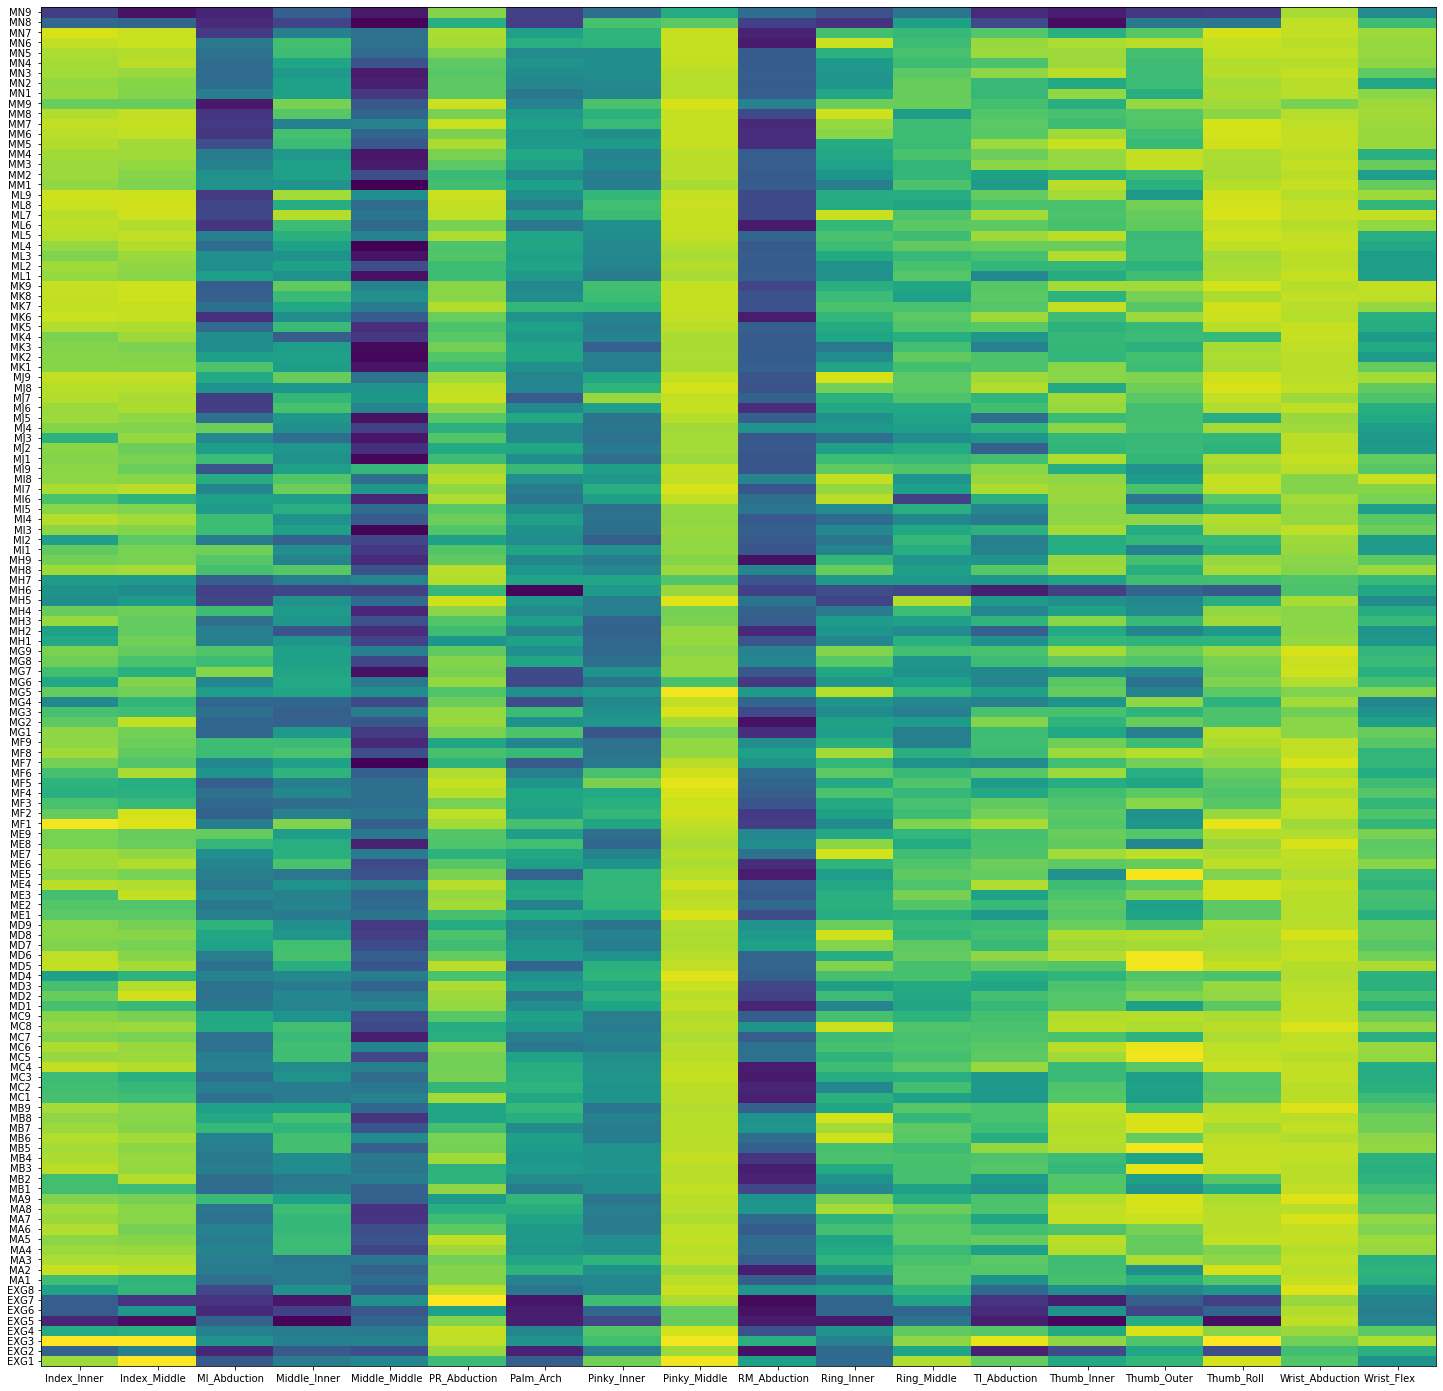

movement: index_flex
subj: todos
  speed =="slow" & movement =="index_flex"


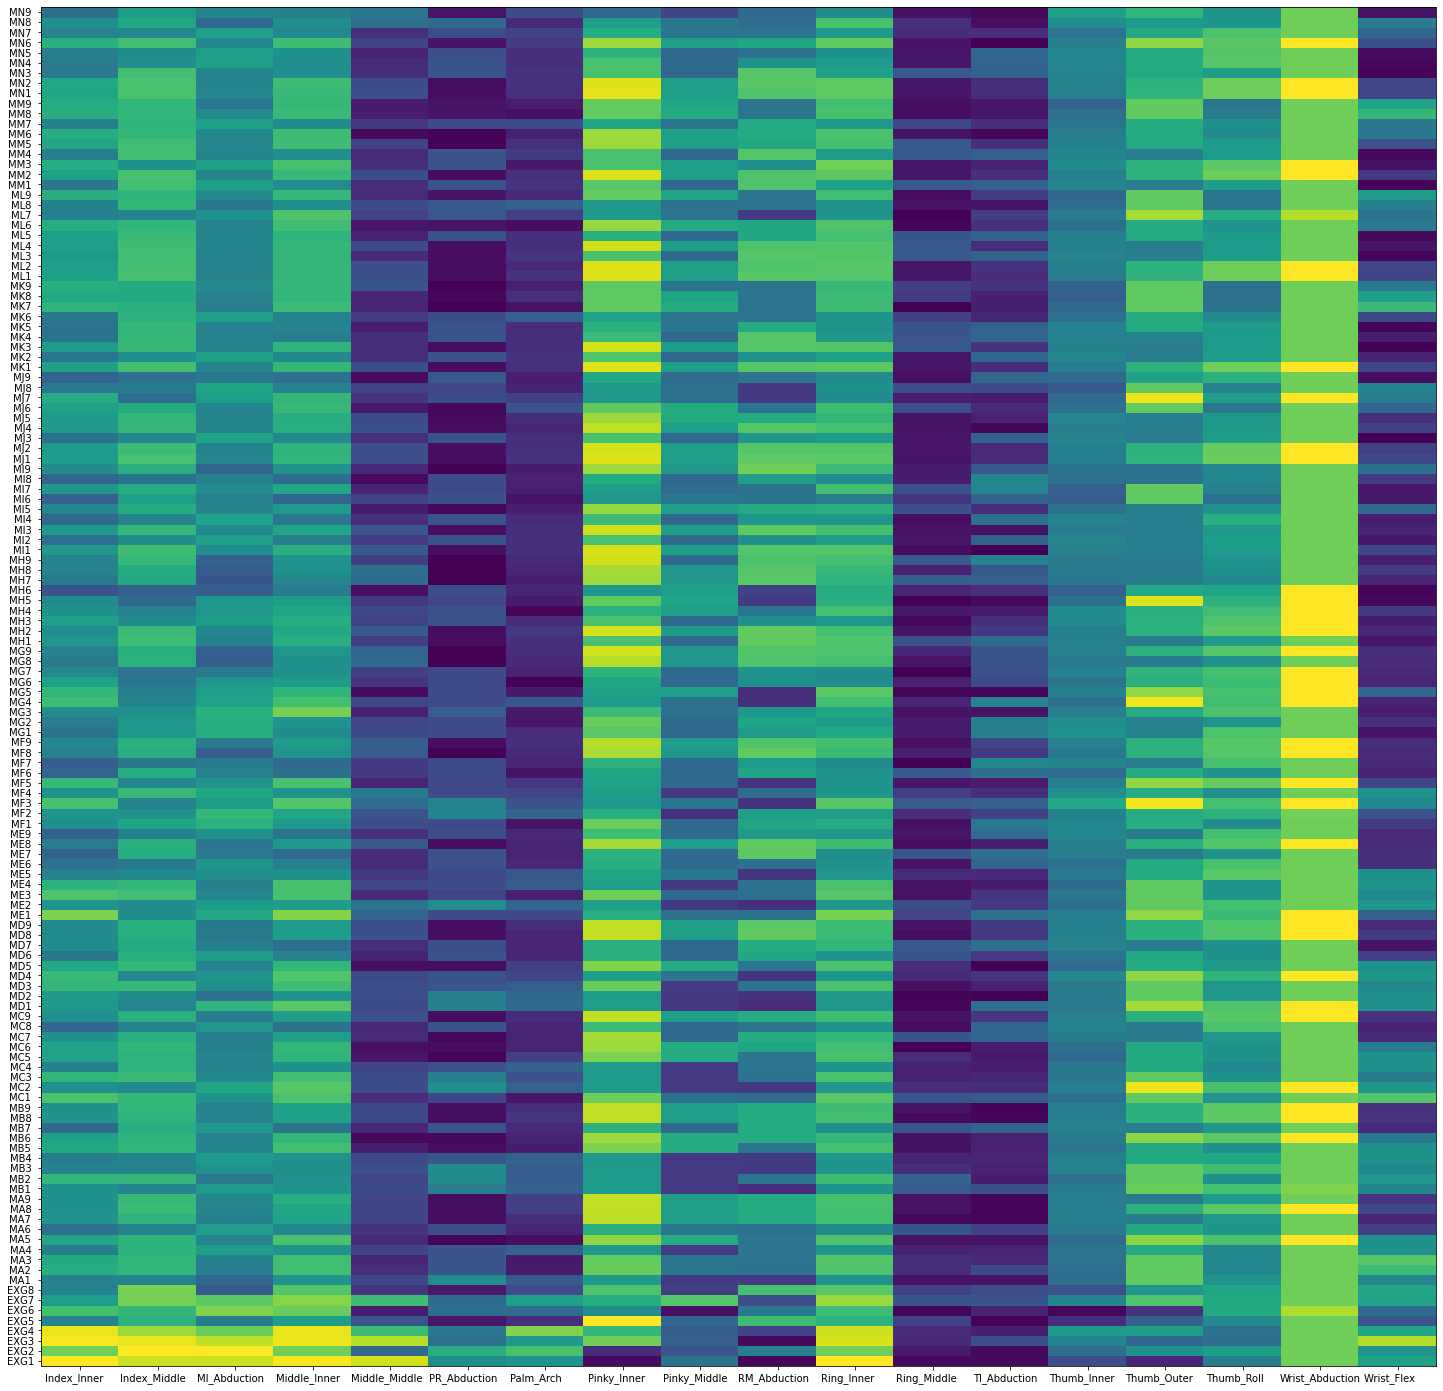

movement: thumbAdd
subj: todos
  speed =="slow" & movement =="thumbAdd"


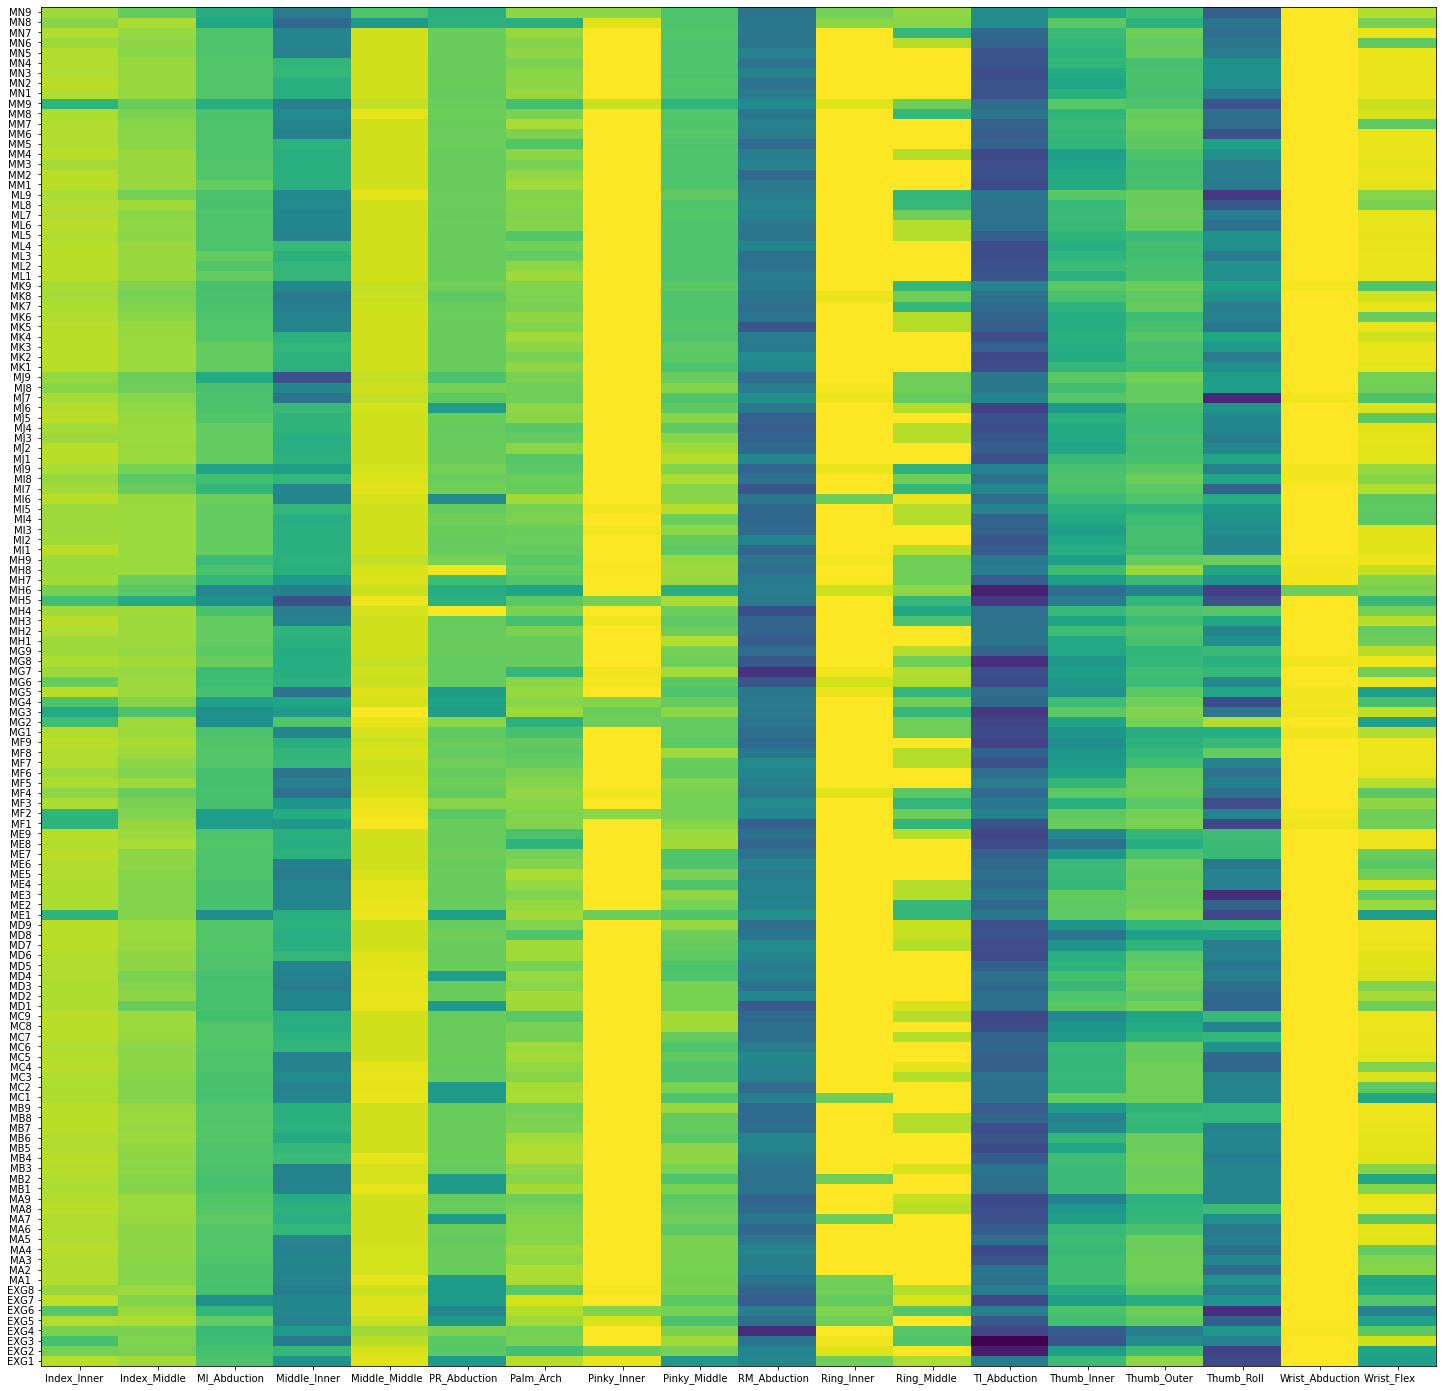

movement: middle
subj: todos
  speed =="slow" & movement =="middle"


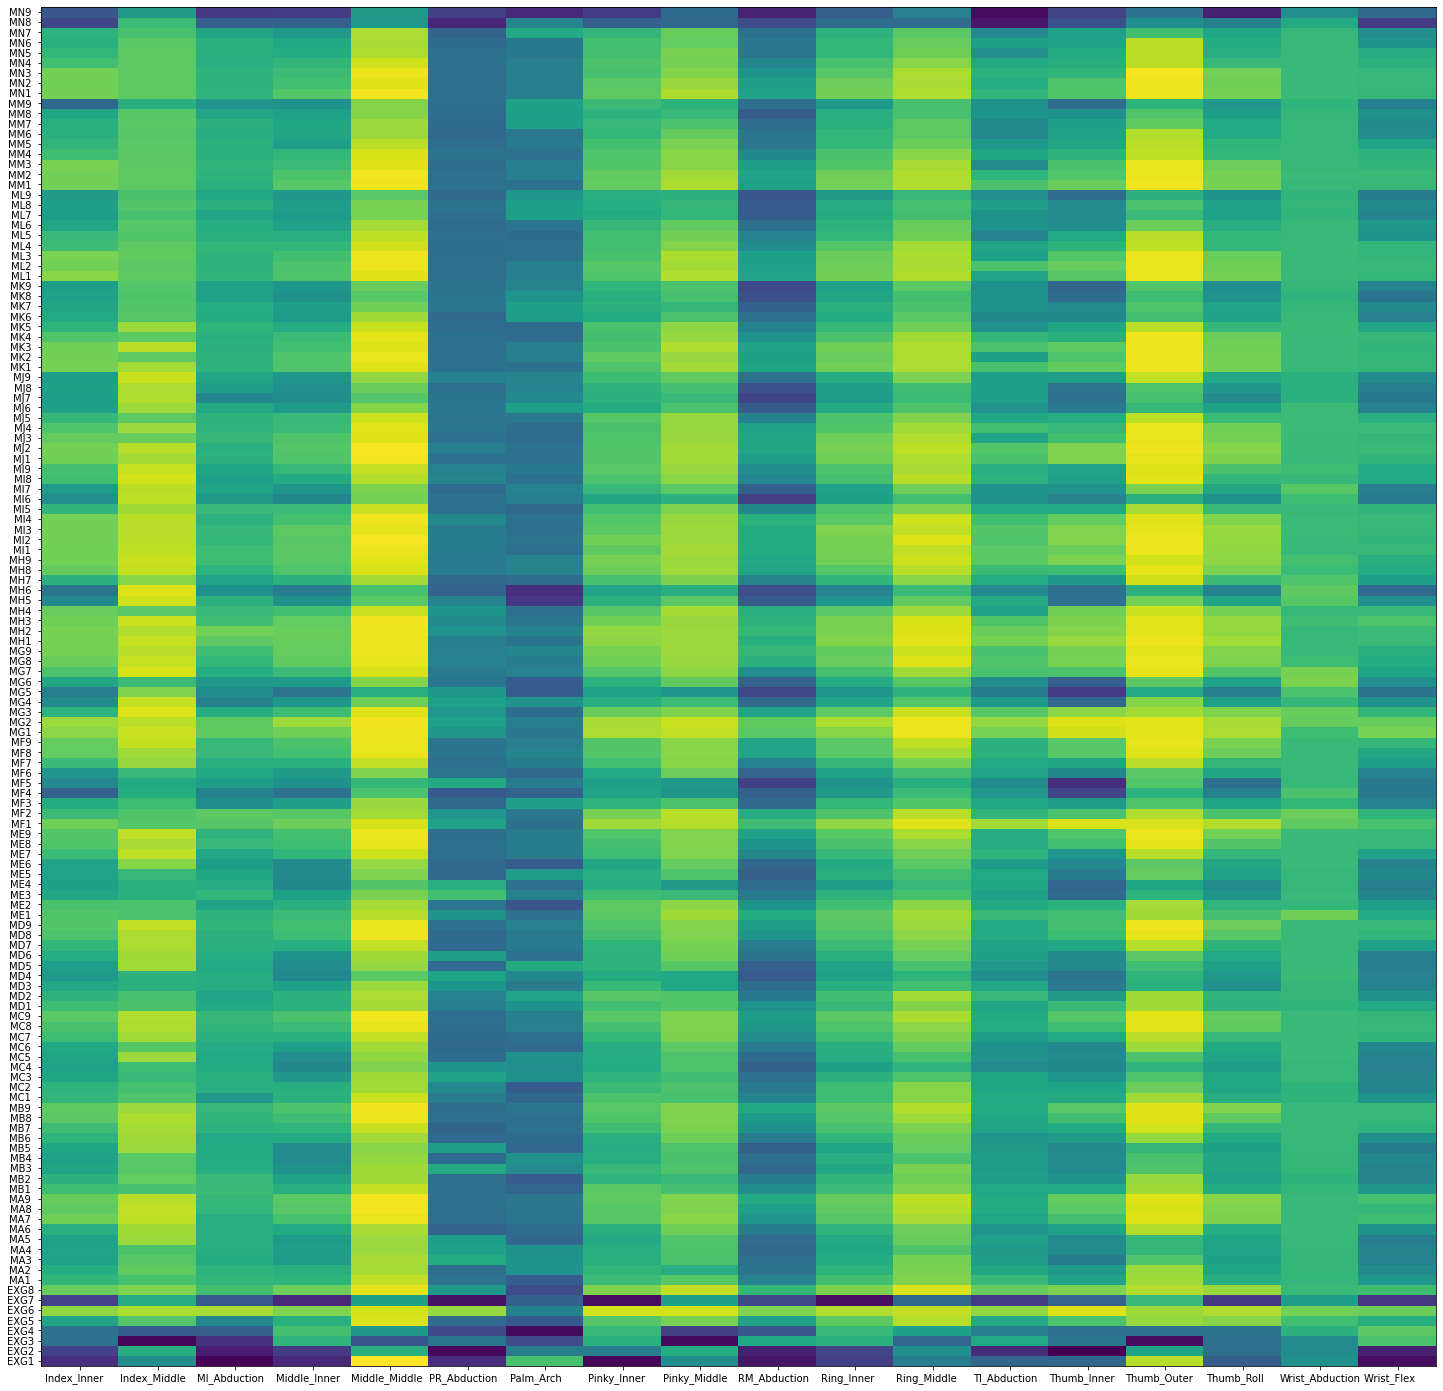

movement: fist
subj: todos
  speed =="slow" & movement =="fist"


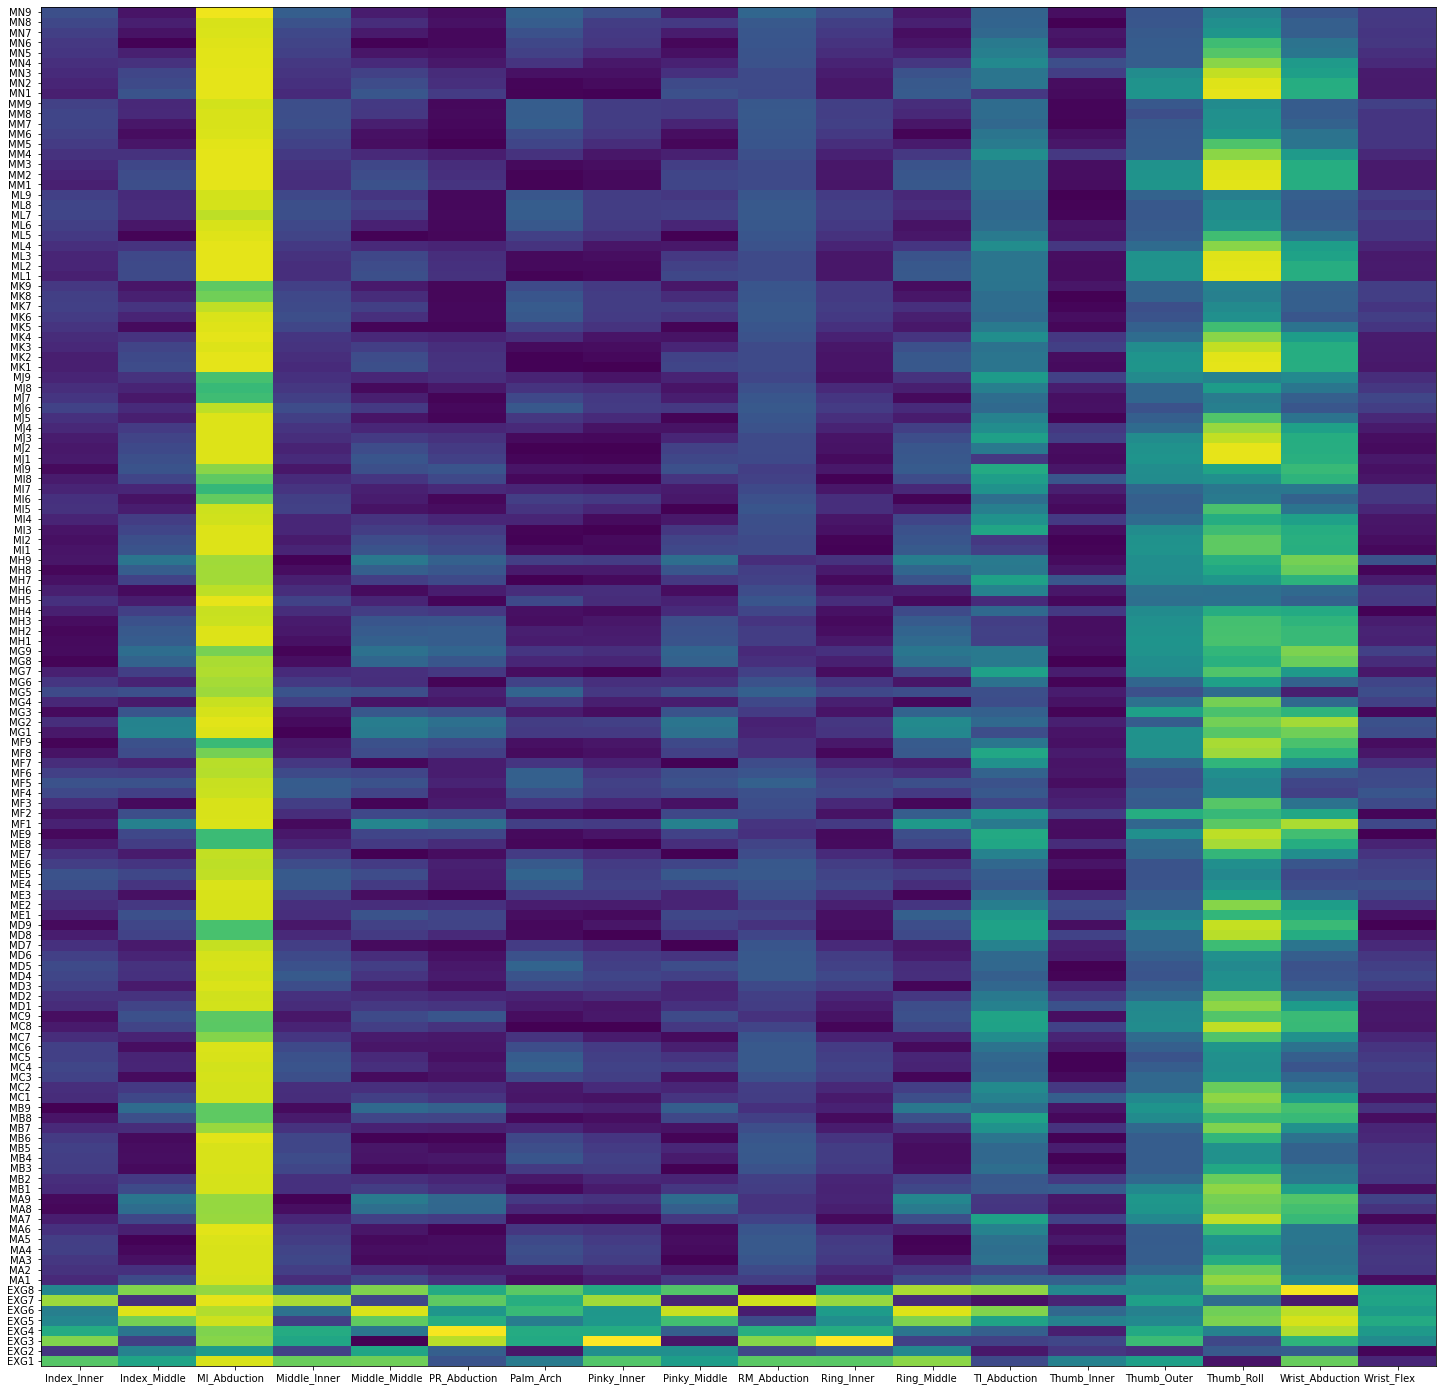

movement: middle_flex
subj: todos
  speed =="slow" & movement =="middle_flex"


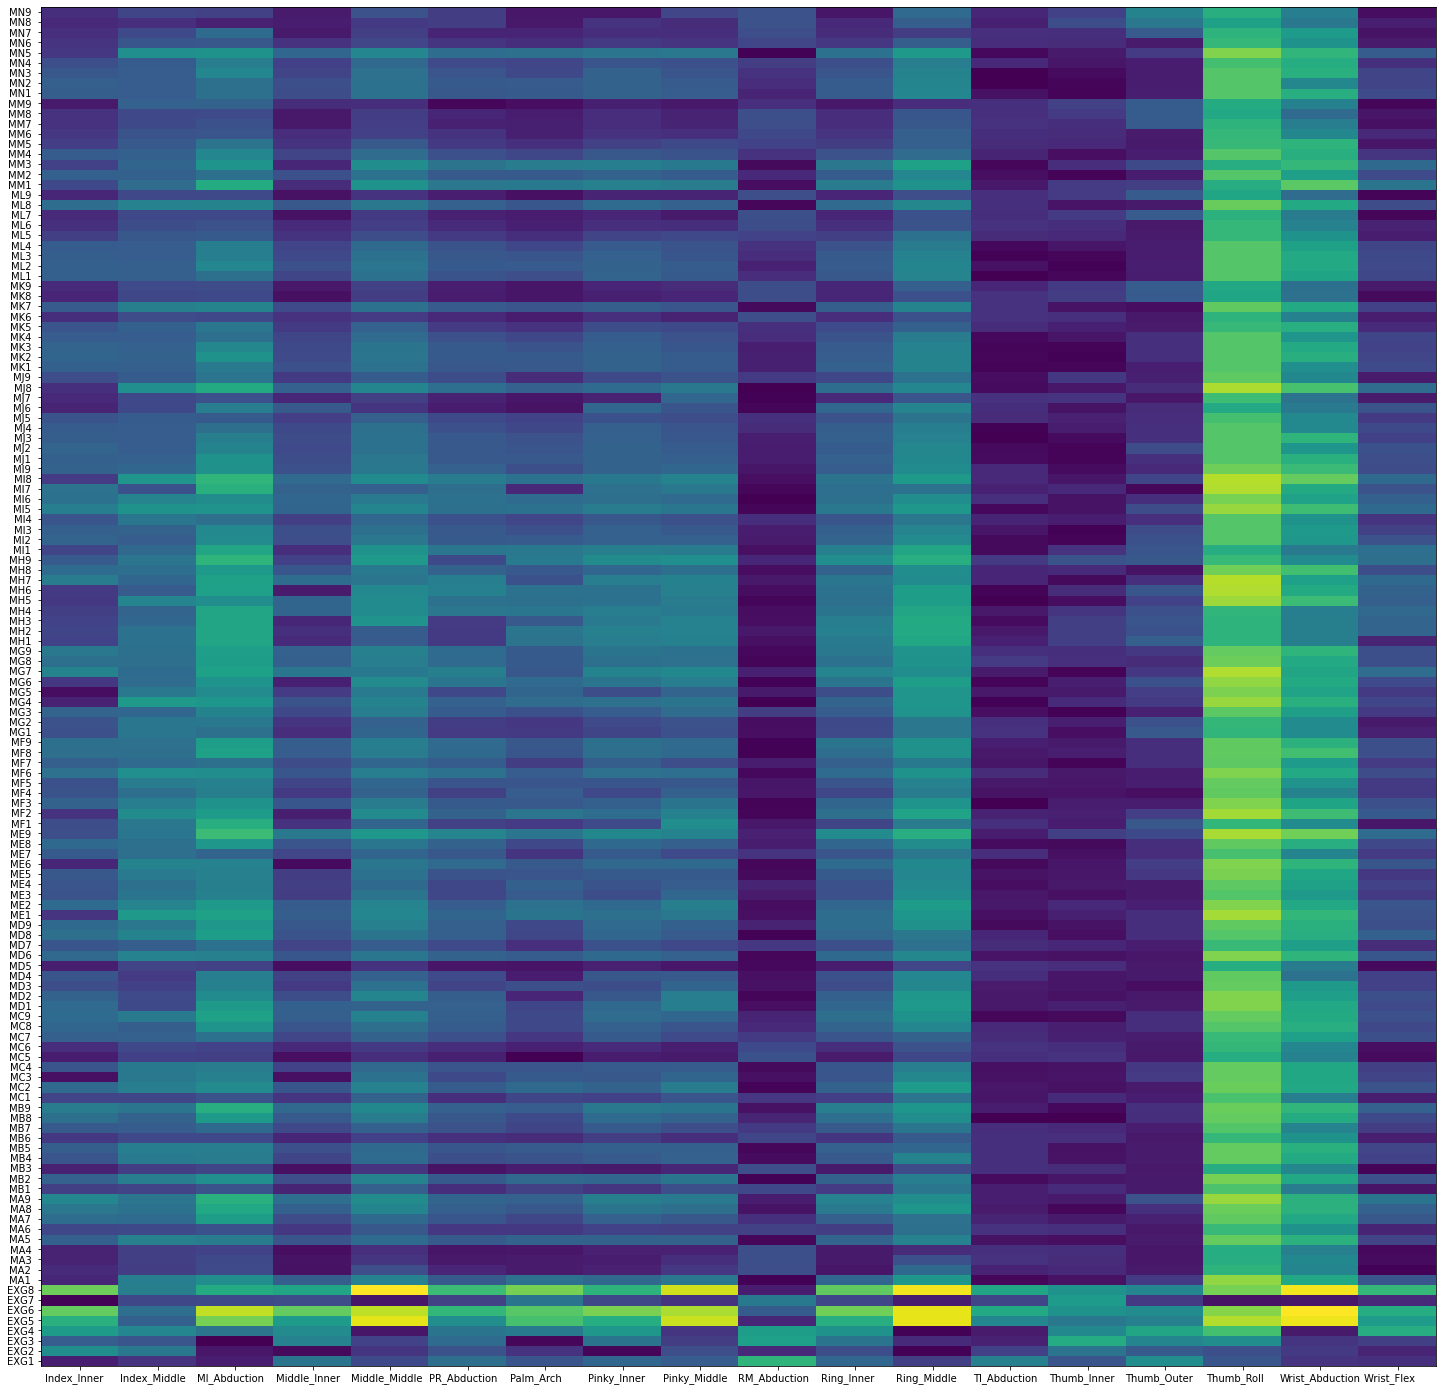

movement: pinch
subj: todos
  speed =="slow" & movement =="pinch"


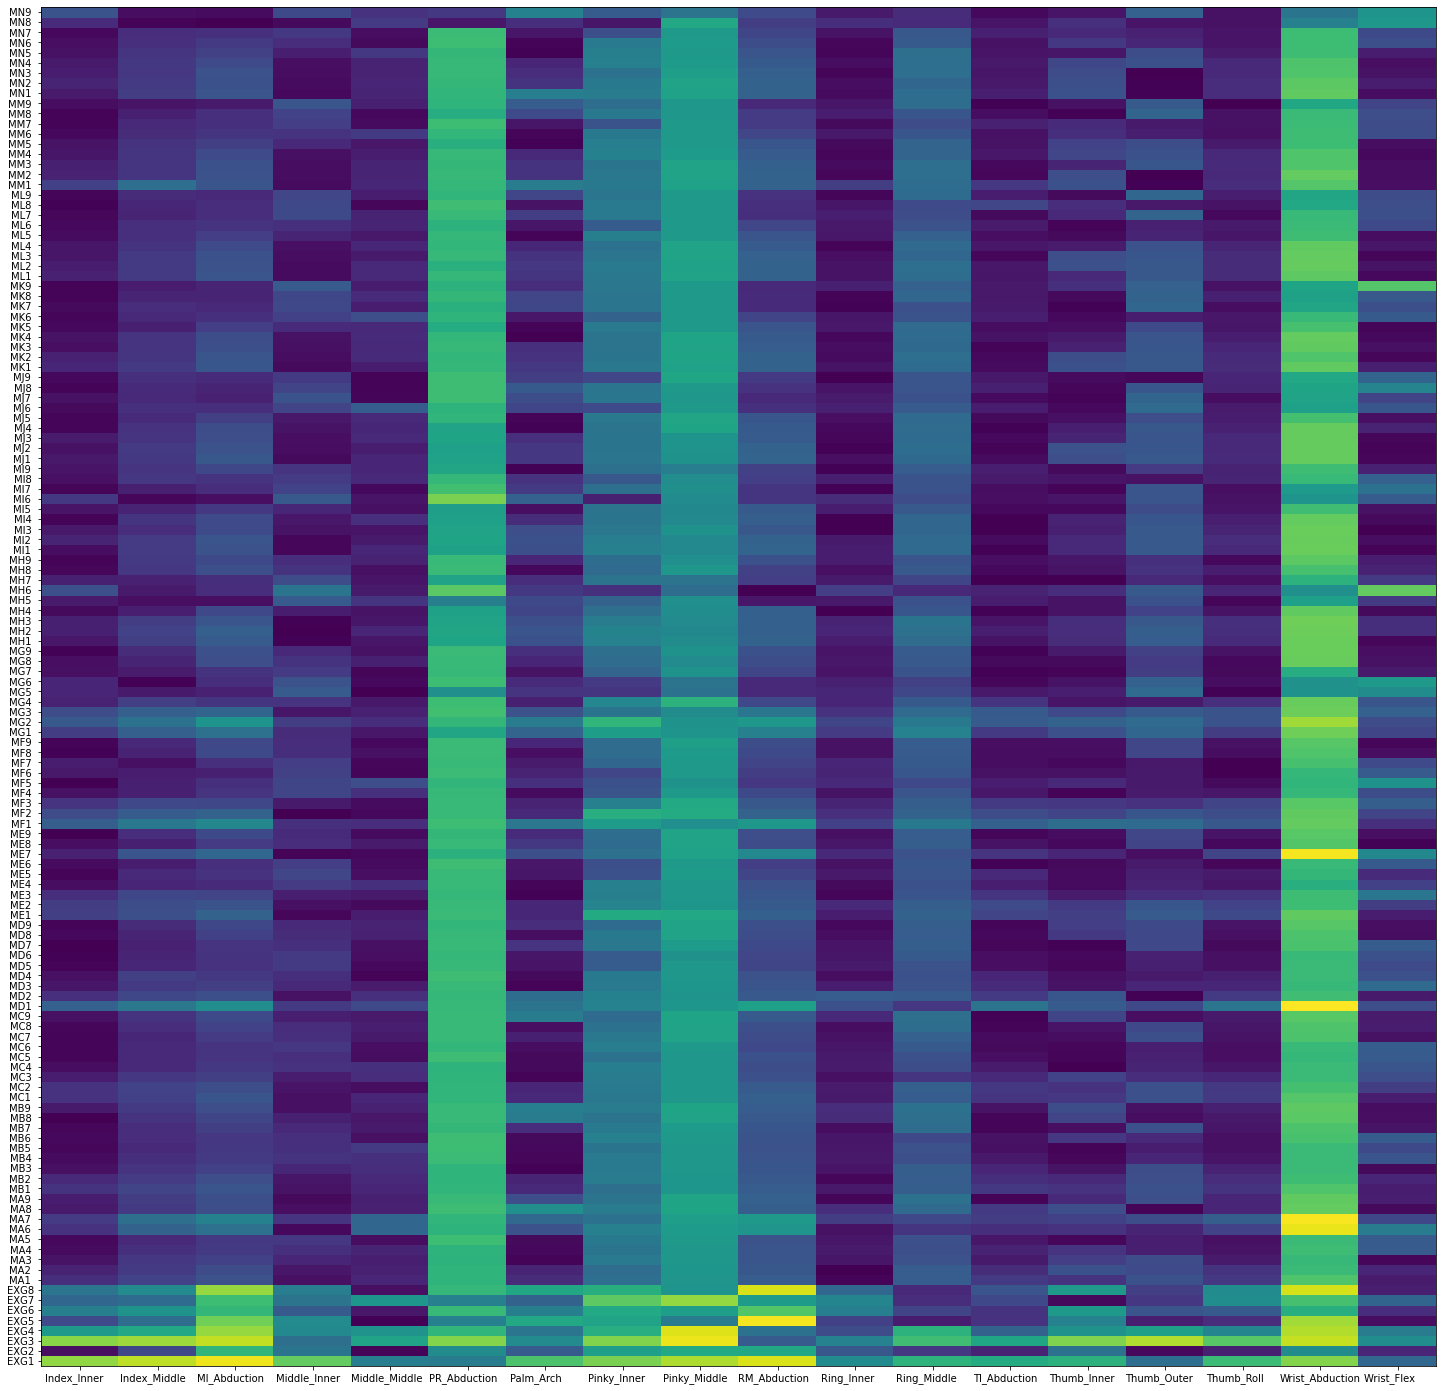

movement: thumbExt
subj: todos
  speed =="slow" & movement =="thumbExt"


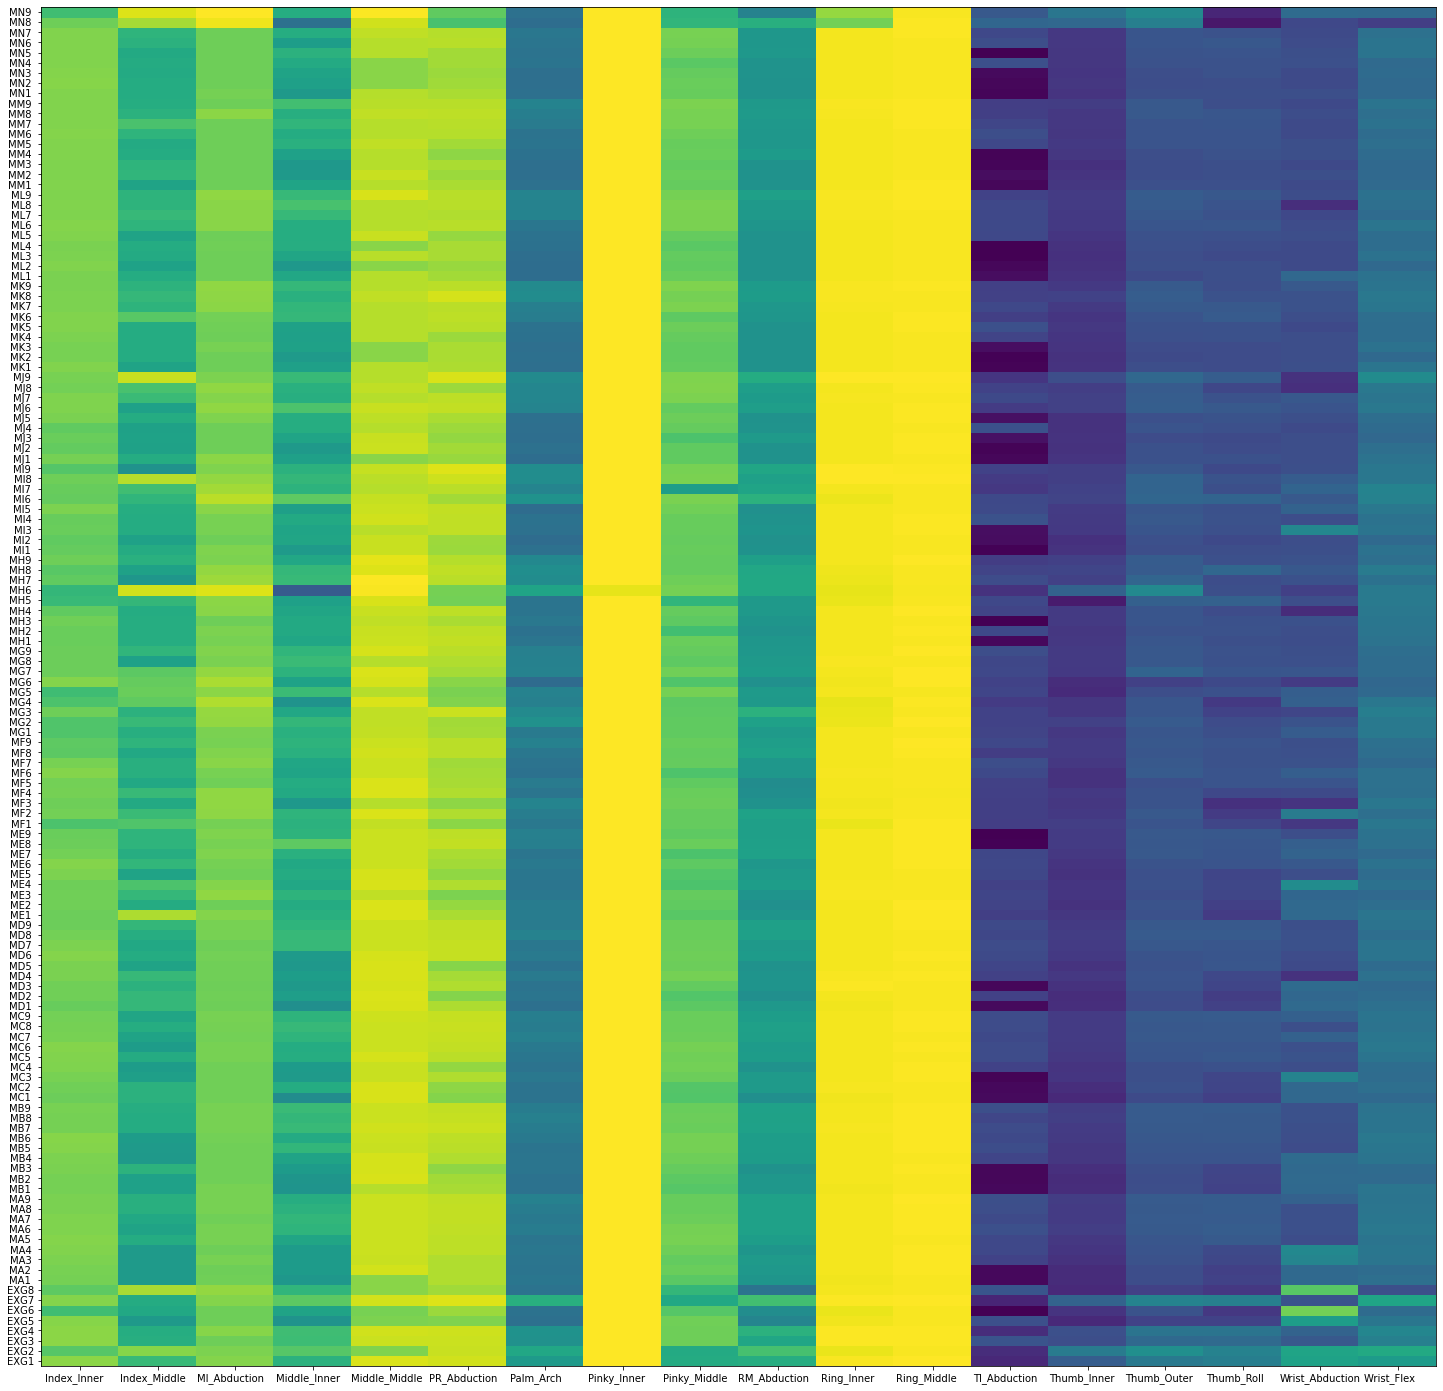

movement: disc
subj: todos
  speed =="slow" & movement =="disc"


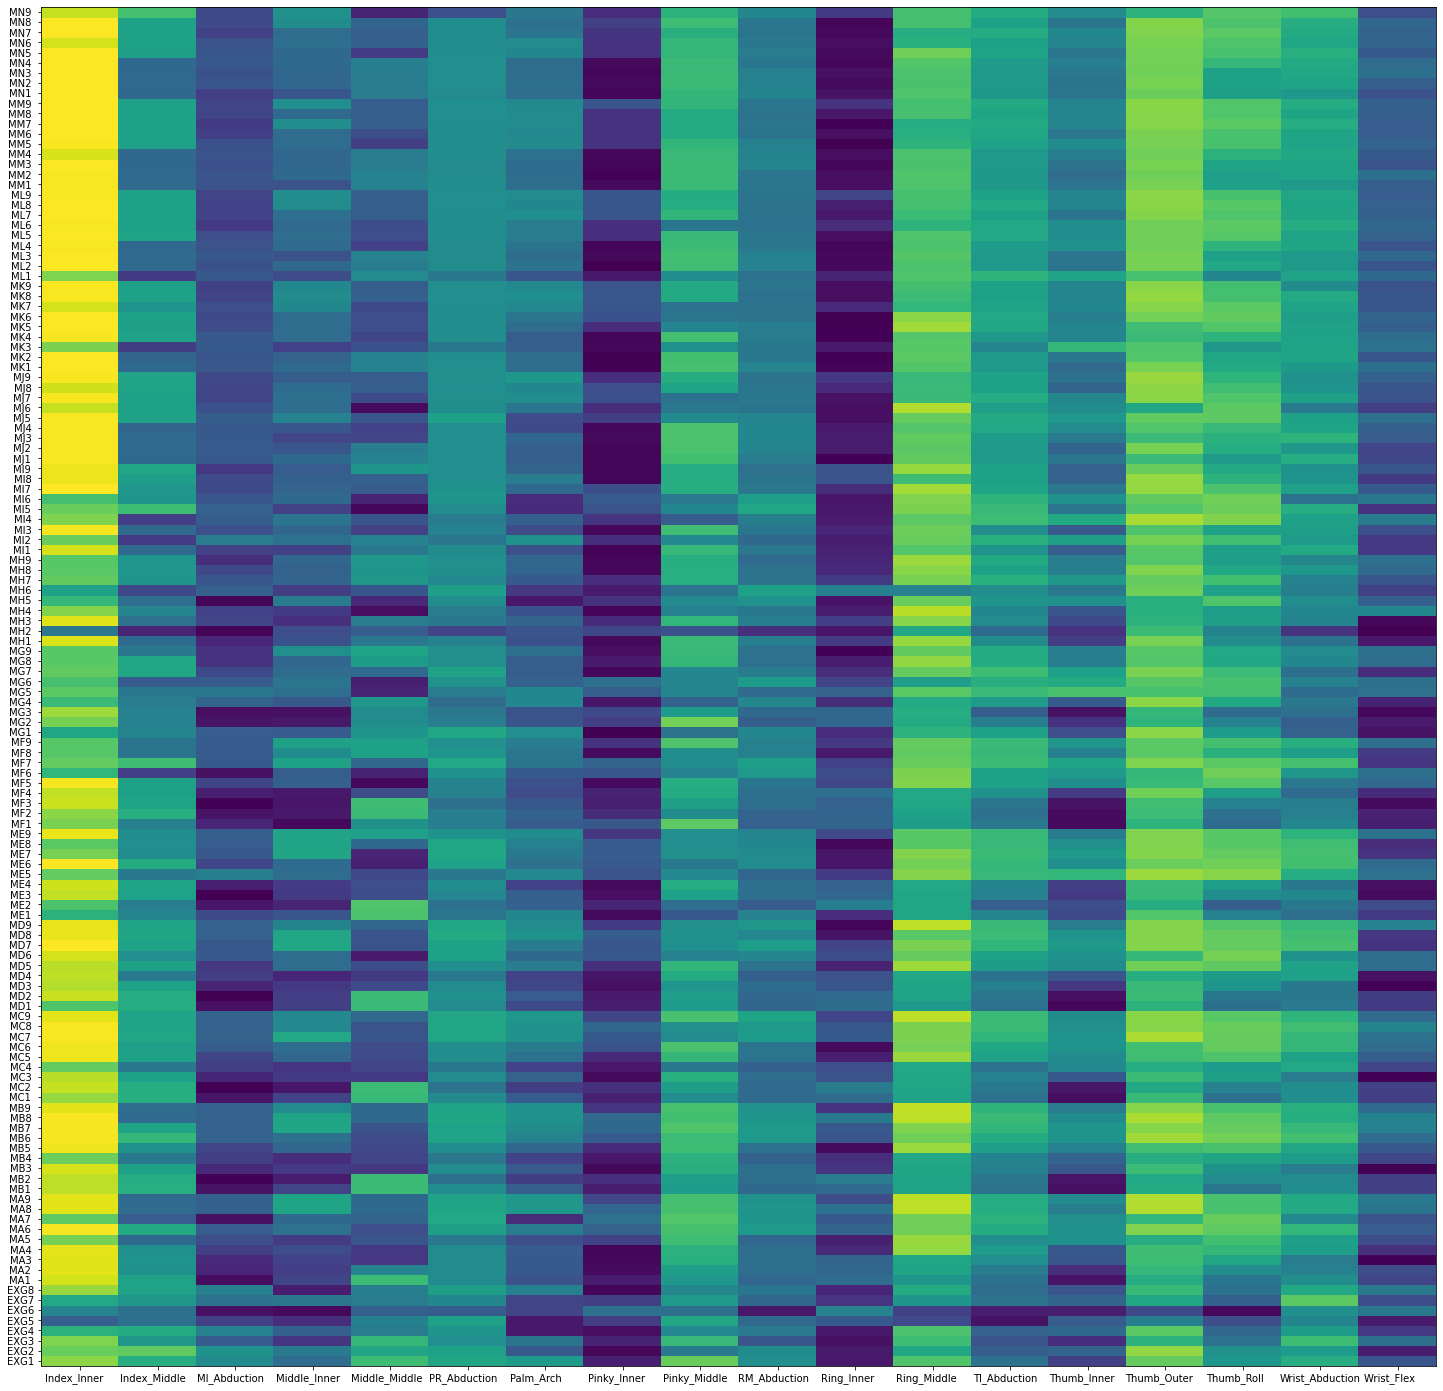

In [ ]:
subj = 1
subj_str = 'subj01'
speed = "slow"
#fast slow

movimentos= ["cilinder", "point", "3digit", "thumbFlex", "index", "index_flex", "thumbAdd", "middle", "fist", "middle_flex", "pinch", "thumbExt", "disc" ]

tabelas_correlacao_dict[subj] = tabelas_correlacao_dict[subj].dropna()
tabelas_correlacao_dict[subj]['correlacao'] = tabelas_correlacao_dict[subj]['correlacao'].astype(np.float64)
tabela = tabelas_correlacao_dict[subj].groupby(['channels_emg','channels_glove', 'movement'])['correlacao'].mean()


for j in np.arange(0,13) :
  print("movement:", movimentos[j])
  tabela[subj_str, movimentos[j], speed] = selecionar(tabelas_correlacao_dict[subj], speedx= speed, movementx= movimentos[j])

  matriz[subj_str, movimentos[j], speed] = pd.pivot_table(tabela[subj_str, movimentos[j], speed], values='correlacao', index='channels_emg', columns='channels_glove')
    
  plt.figure(figsize=(25,25))
  plt.pcolor(matriz[subj_str, movimentos[j], speed].abs())
  plt.yticks(np.arange(0.5, len(matriz[subj_str, movimentos[j], speed].index), 1), matriz[subj_str, movimentos[j], speed].index)
  plt.xticks(np.arange(0.5, len(matriz[subj_str, movimentos[j], speed].columns), 1), matriz[subj_str, movimentos[j], speed].columns)
  plt.show()

index               15
channels_emg      MB7 
Media           0.2269
letra_emg            B
numero_emg           7
Name: 110, dtype: object


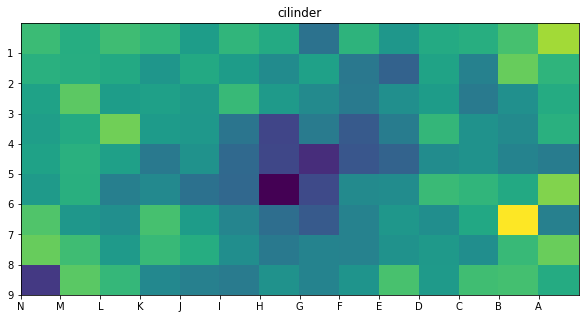

index                108
channels_emg        MM1 
Media           0.331887
letra_emg              M
numero_emg             1
Name: 17, dtype: object


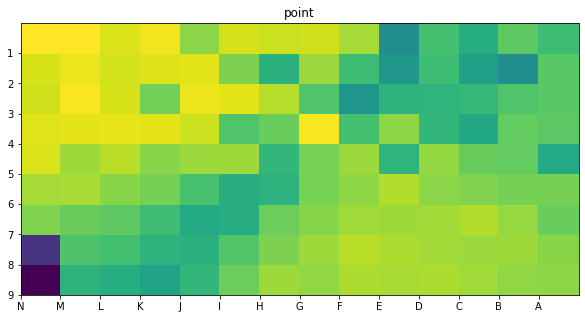

index             55
channels_emg    MG2 
Media           0.25
letra_emg          G
numero_emg         2
Name: 70, dtype: object


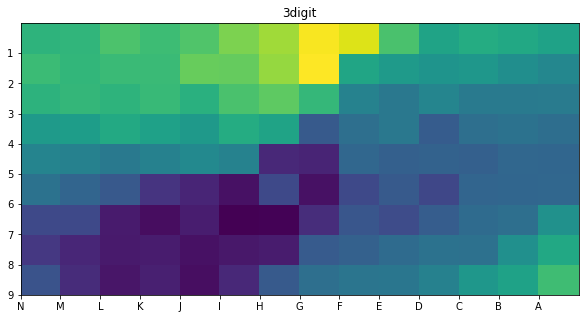

index                 71
channels_emg        MH9 
Media           0.255498
letra_emg              H
numero_emg             9
Name: 54, dtype: object


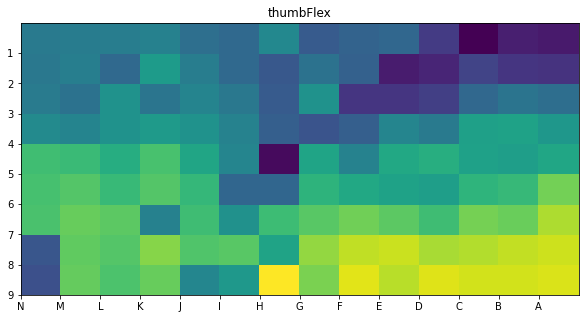

index                 89
channels_emg        MJ9 
Media           0.374735
letra_emg              J
numero_emg             9
Name: 36, dtype: object


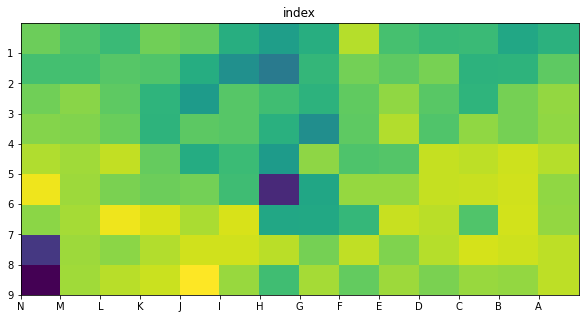

index                 47
channels_emg        MF3 
Media           0.267554
letra_emg              F
numero_emg             3
Name: 78, dtype: object


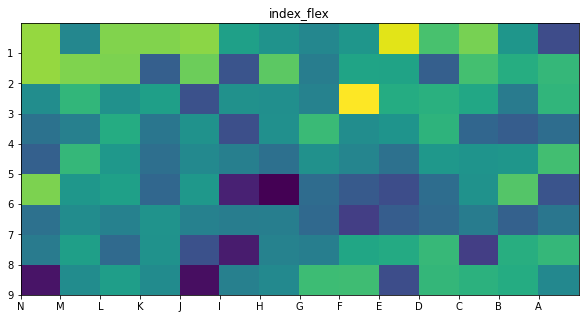

index                 70
channels_emg        MH8 
Media           0.393109
letra_emg              H
numero_emg             8
Name: 55, dtype: object


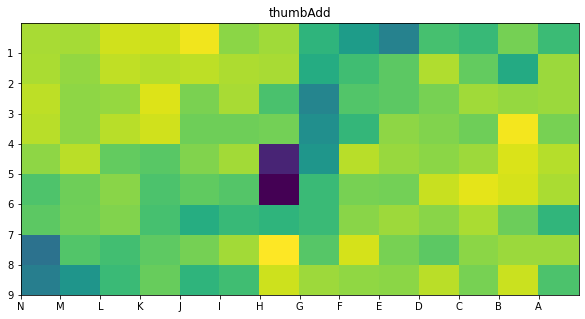

index                 55
channels_emg        MG2 
Media           0.407866
letra_emg              G
numero_emg             2
Name: 70, dtype: object


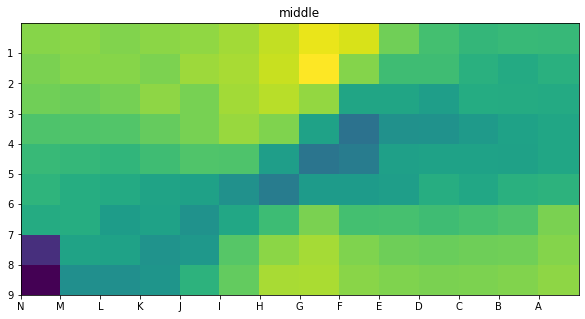

index                 45
channels_emg        MF1 
Media           0.179856
letra_emg              F
numero_emg             1
Name: 80, dtype: object


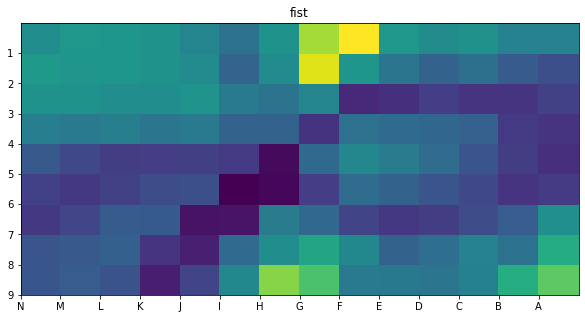

index                 44
channels_emg        ME9 
Media           0.209635
letra_emg              E
numero_emg             9
Name: 81, dtype: object


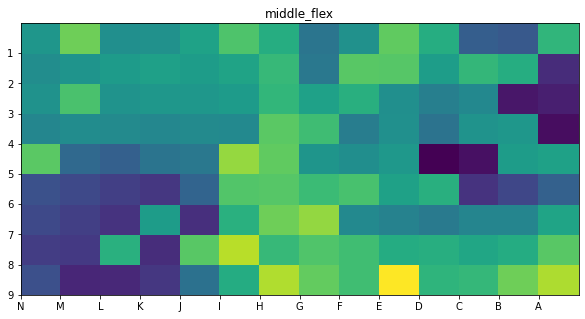

index                 55
channels_emg        MG2 
Media           0.165051
letra_emg              G
numero_emg             2
Name: 70, dtype: object


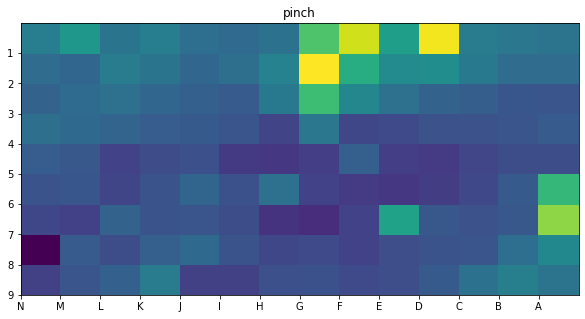

index                 89
channels_emg        MJ9 
Media           0.320939
letra_emg              J
numero_emg             9
Name: 36, dtype: object


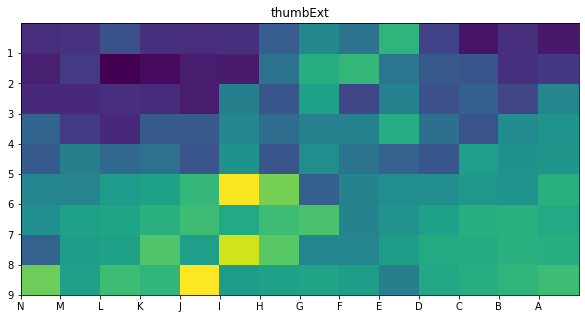

index                 16
channels_emg        MB8 
Media           0.275921
letra_emg              B
numero_emg             8
Name: 109, dtype: object


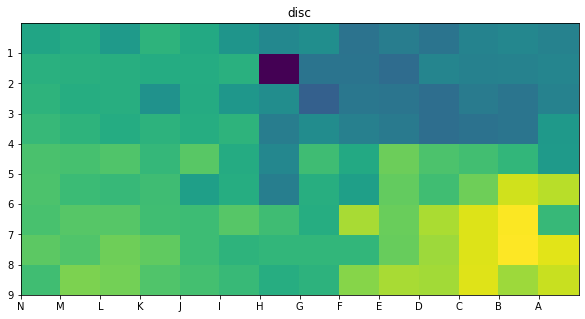

In [ ]:
media_matriz = dict()
tabela_media_matriz = dict()
tabela_media_matriz_ordenada = dict()
matriz_HD_sEMG = dict()

for i in range(len(movimentos)) :
  media_matriz[subj_str, movimentos[i], speed] = matriz[subj_str, movimentos[i], speed].iloc[8:].abs().mean(axis = 1)
  tabela_media_matriz[subj_str, movimentos[i], speed] = media_matriz[subj_str, movimentos[i], speed].reset_index(name='Media')

  for j in range(len(tabela_media_matriz[subj_str, movimentos[i], speed])) :
    tabela_media_matriz[subj_str, movimentos[i], speed].loc[j,'letra_emg'] = tabela_media_matriz[subj_str, movimentos[i], speed]['channels_emg'][j][1]
    tabela_media_matriz[subj_str, movimentos[i], speed].loc[j,'numero_emg']= tabela_media_matriz[subj_str, movimentos[i], speed]['channels_emg'][j][2]

  x = tabela_media_matriz[subj_str, movimentos[i], speed].sort_values(by=['letra_emg', 'numero_emg'], ascending=[False, False])
  tabela_media_matriz_ordenada[subj_str, movimentos[i], speed] = x.reset_index()

  matriz_HD_sEMG[subj_str, movimentos[i], speed] = np.zeros((9, 14))
  contador= 0
  
  max = tabela_media_matriz_ordenada[subj_str, movimentos[i], speed].loc[tabela_media_matriz_ordenada[subj_str, movimentos[i], speed]['Media'].idxmax()]
  print(max)

  for c in np.arange(0,14):
    for l in np.arange(0,9):
      matriz_HD_sEMG[subj_str, movimentos[i], speed][l, c] = tabela_media_matriz_ordenada[subj_str, movimentos[i], speed]['Media'][contador]
      contador = contador + 1

  plt.figure(figsize=(10,5))
  plt.title(movimentos[i])
  plt.pcolor(matriz_HD_sEMG[subj_str, movimentos[i], speed])
  plt.xticks(ticks = np.arange(0, 14), labels = tabela_media_matriz_ordenada[subj_str, movimentos[i], speed]['letra_emg'].unique())
  plt.yticks(ticks = np.arange(0,9), labels = np.arange(9,0,-1))
  plt.show()

In [ ]:
hickle.dump(matriz, '/content/drive/MyDrive/PDPD/Dicionário/matriz.hkl', mode='w')
hickle.dump(tabela, '/content/drive/MyDrive/PDPD/Dicionário/tabela.hkl', mode='w')
hickle.dump(media_matriz, '/content/drive/MyDrive/PDPD/Dicionário/media_matriz.hkl', mode='w')
hickle.dump(tabela_media_matriz, '/content/drive/MyDrive/PDPD/Dicionário/tabela_media_matriz.hkl', mode='w')
hickle.dump(tabela_media_matriz_ordenada, '/content/drive/MyDrive/PDPD/Dicionário/tabela_media_matriz_ordenada.hkl', mode='w')
hickle.dump(matriz_HD_sEMG, '/content/drive/MyDrive/PDPD/Dicionário/matriz_HD_sEMG.hkl', mode='w')

/usr/local/lib/python3.7/dist-packages/hickle/loaders/load_builtins.py:110: SerializedWarning: 'DataFrame' type not understood, data has been serialized
  % (py_obj.__class__.__name__, reason_str), SerializedWarning)
/usr/local/lib/python3.7/dist-packages/hickle/loaders/load_builtins.py:110: SerializedWarning: 'Series' type not understood, data has been serialized
  % (py_obj.__class__.__name__, reason_str), SerializedWarning)


subj: 1
subj: todos
  speed =="fast" & movement =="point"


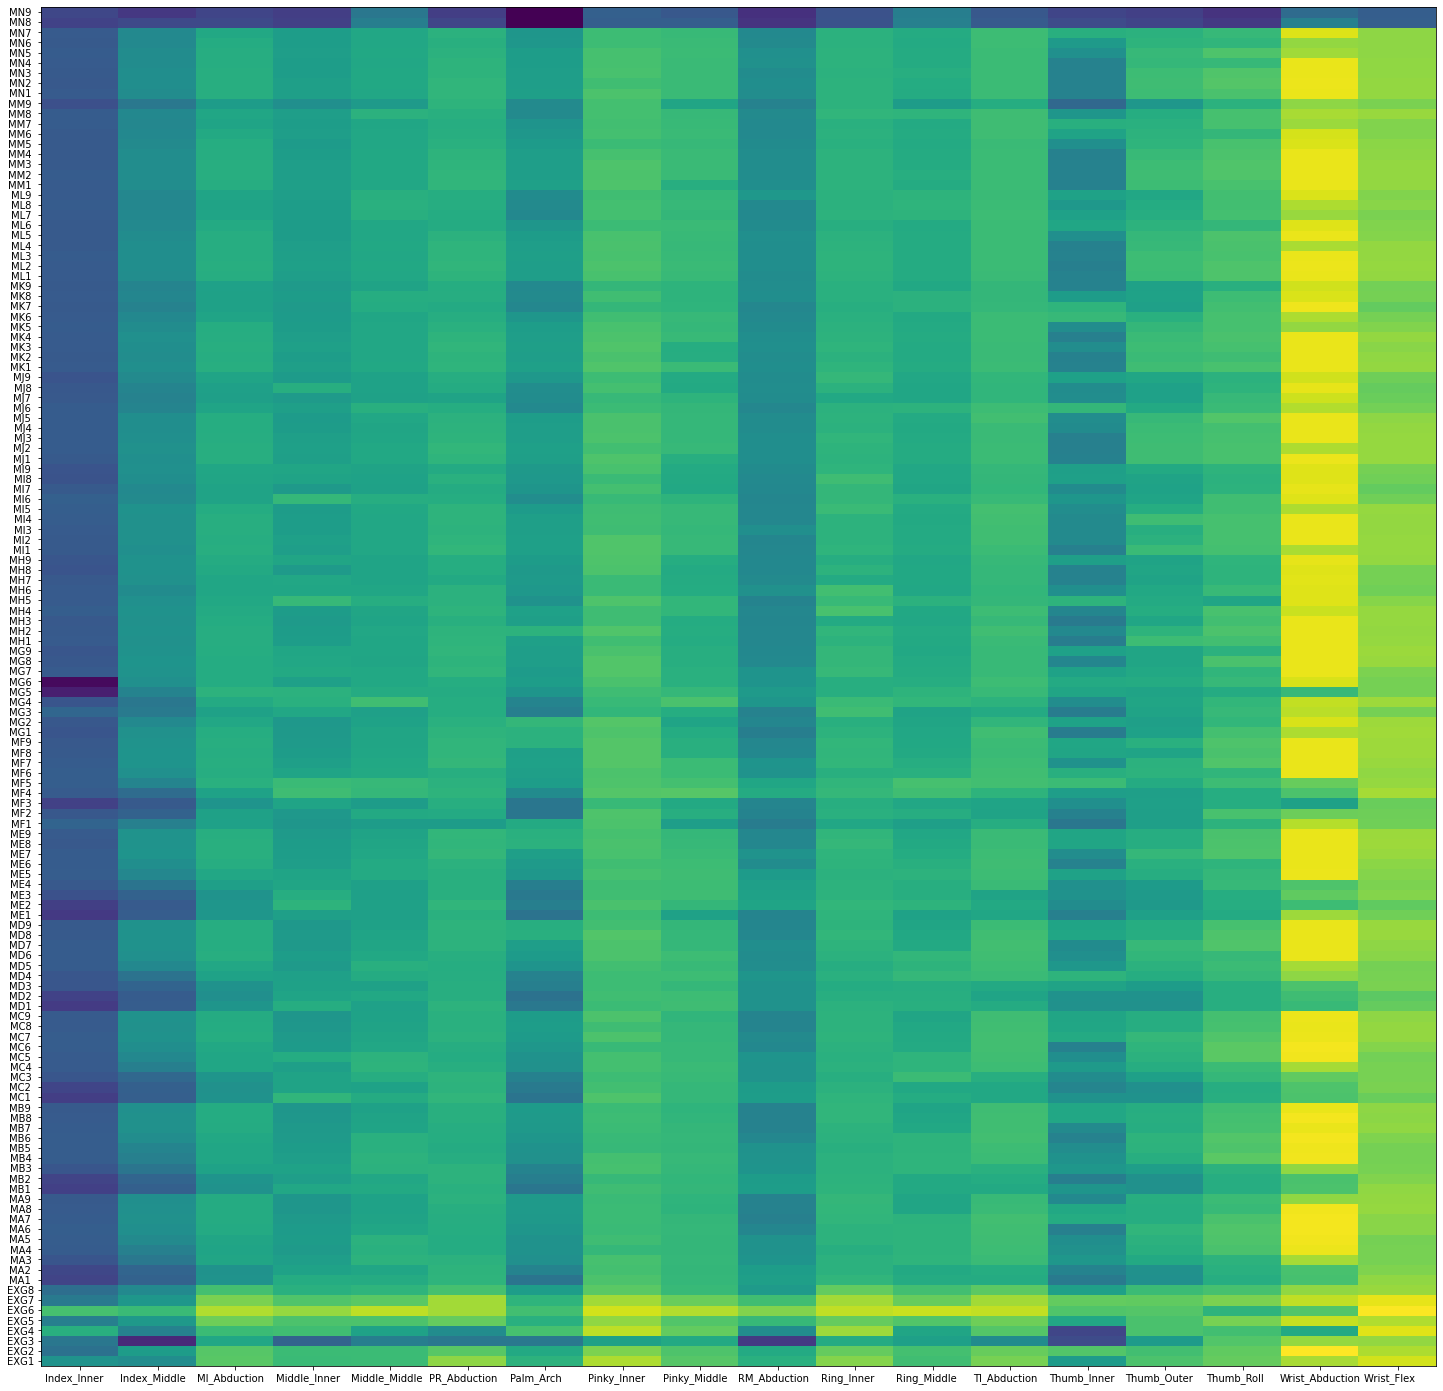

subj: 2
subj: todos
  speed =="fast" & movement =="point"


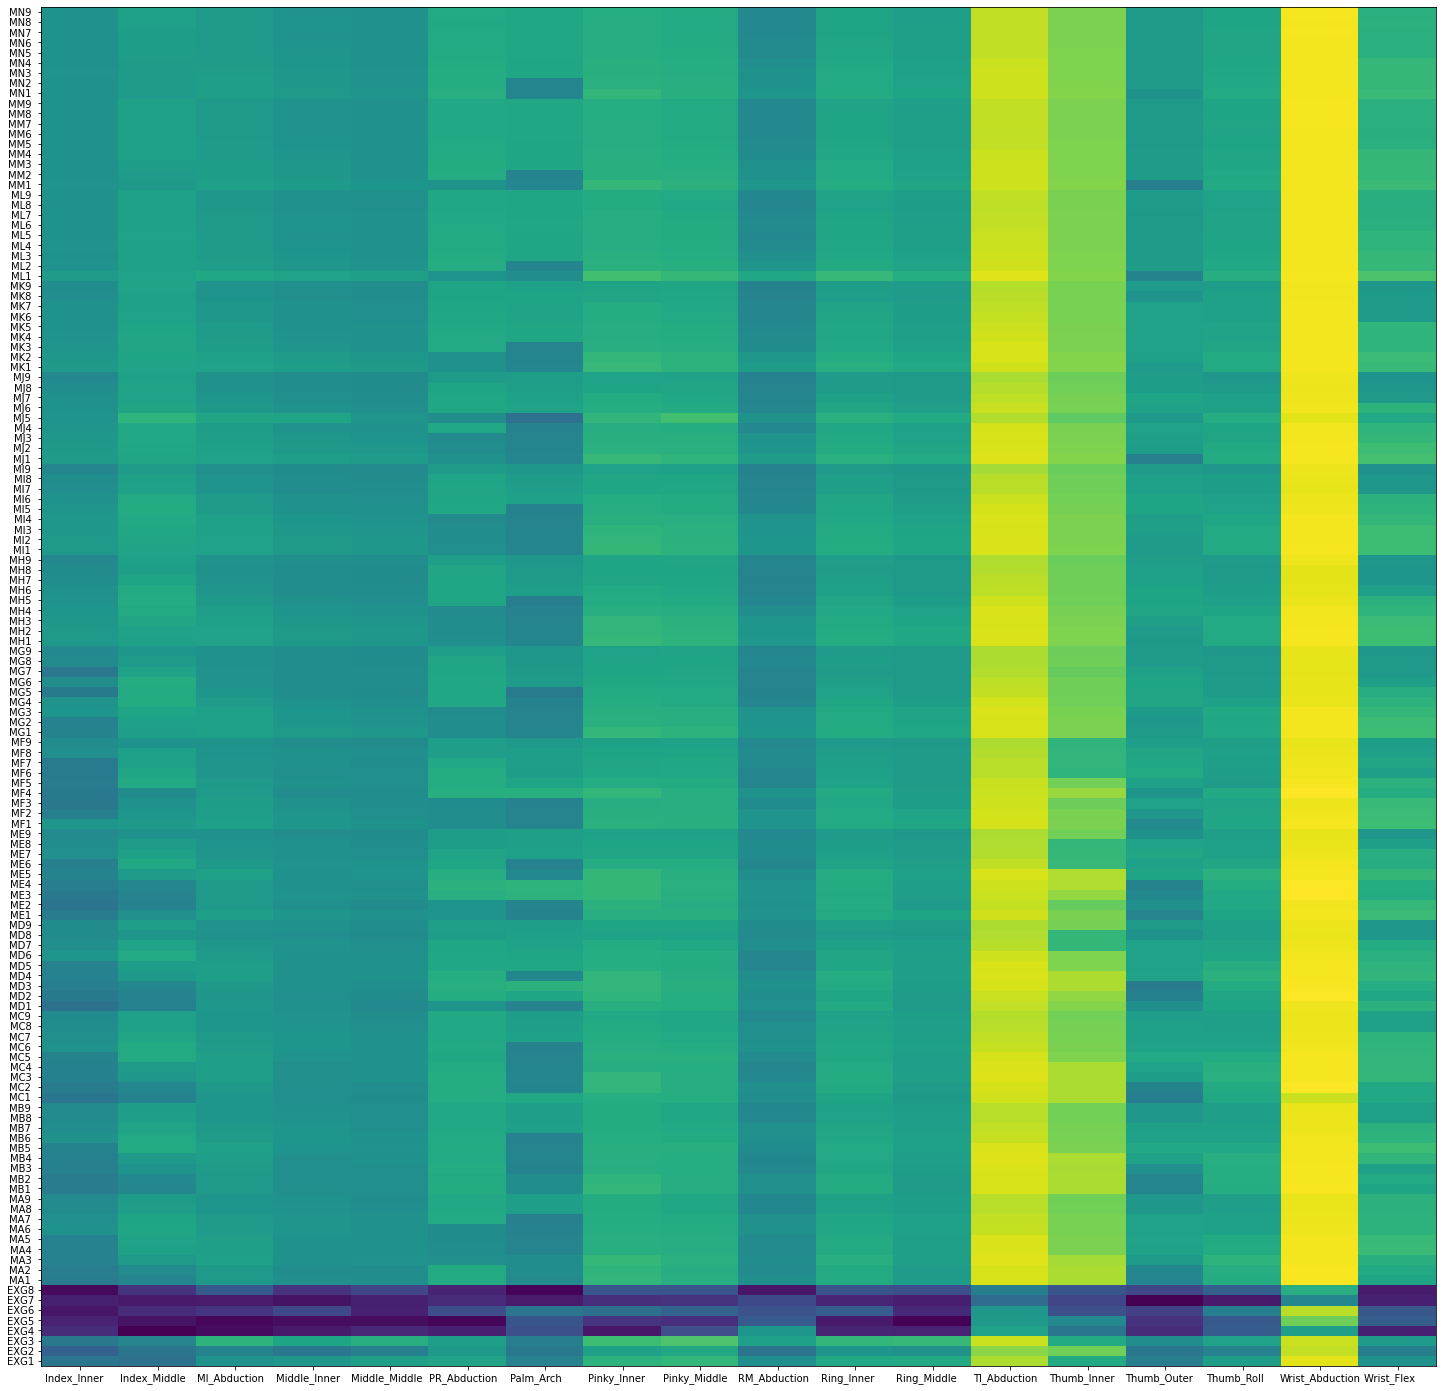

subj: 3
subj: todos
  speed =="fast" & movement =="point"


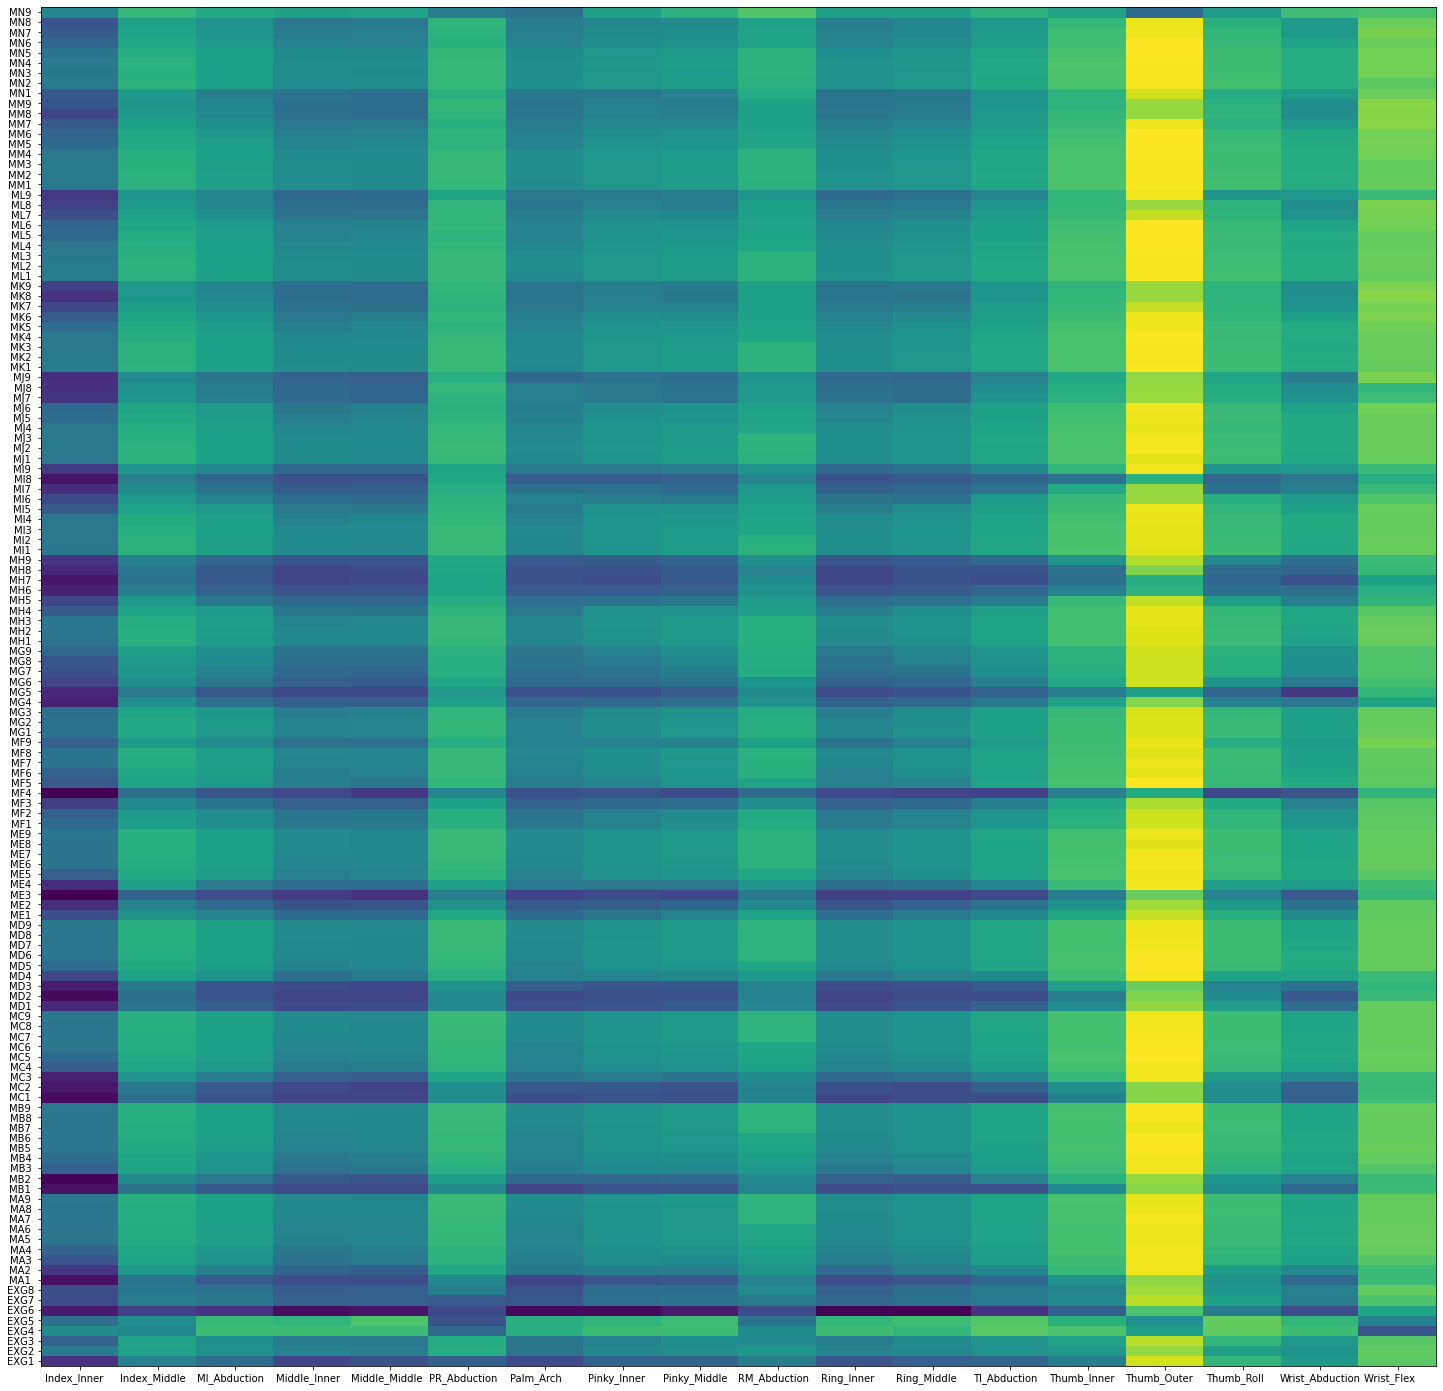

subj: 4
subj: todos
  speed =="fast" & movement =="point"


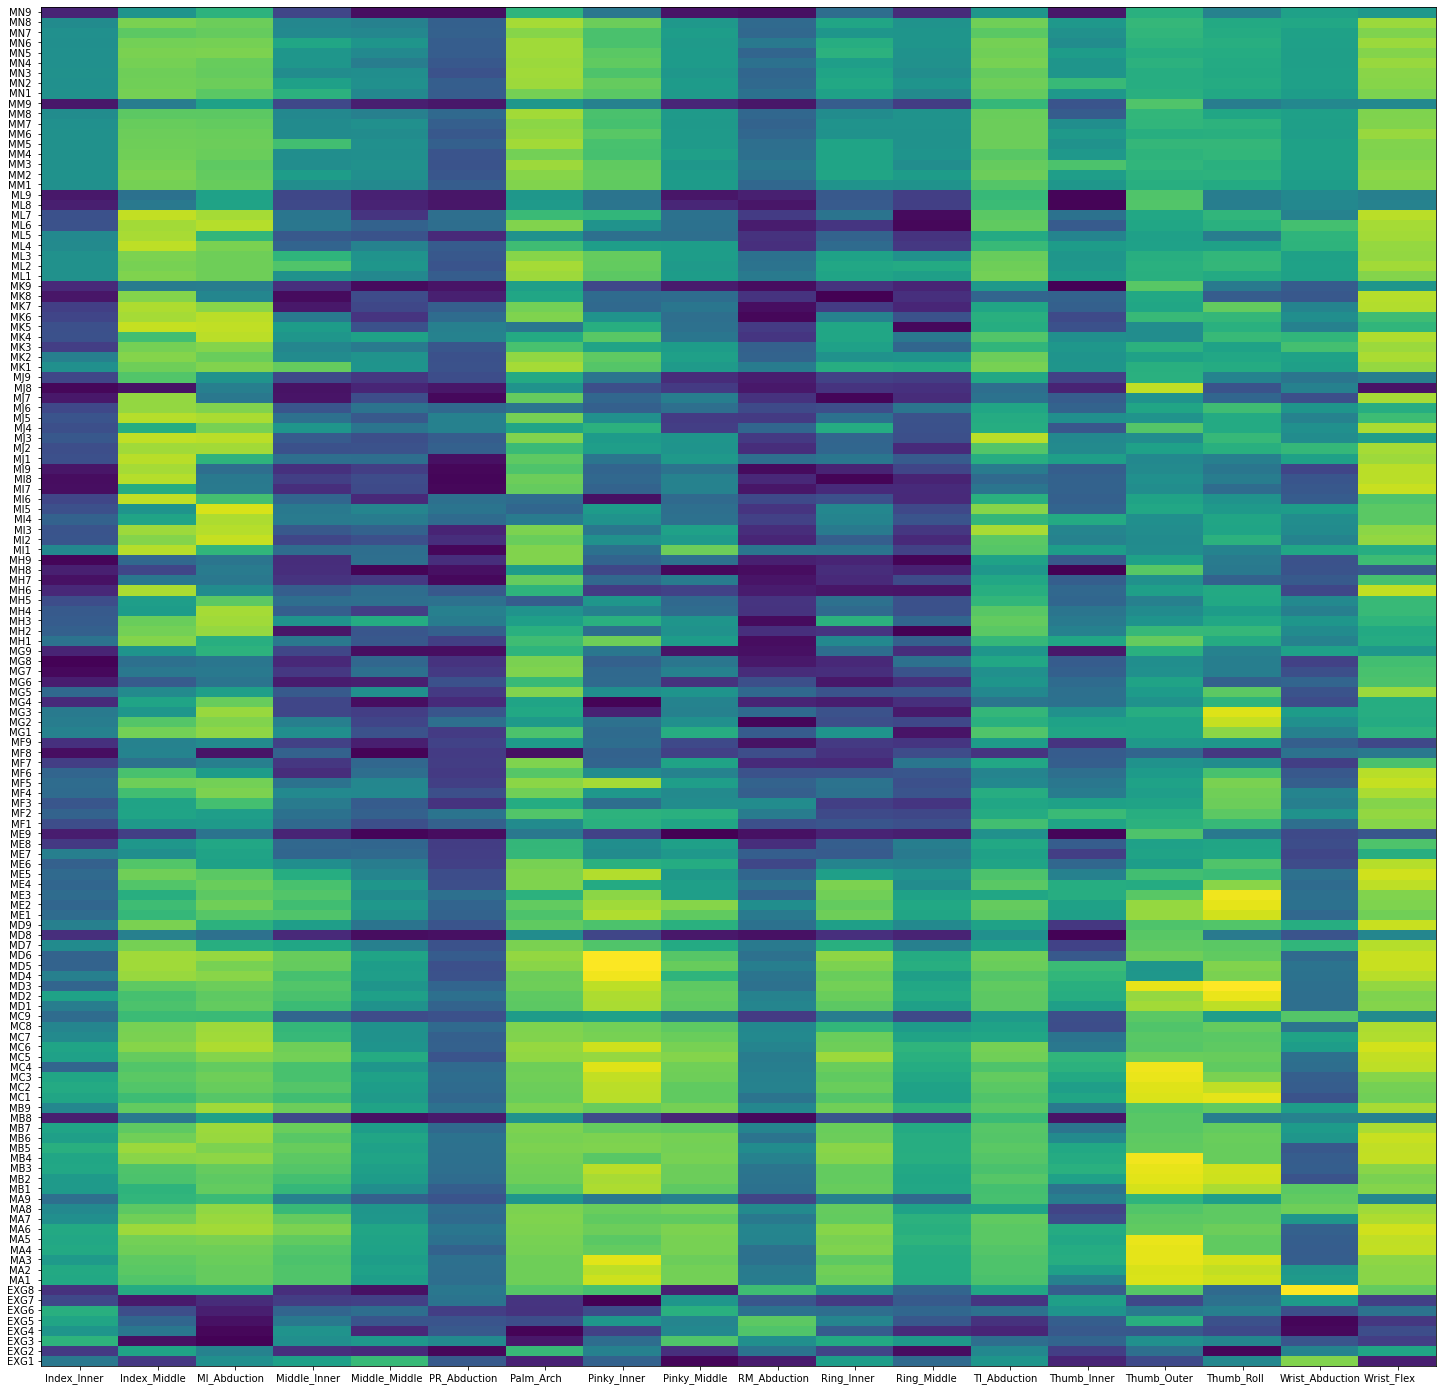

subj: 5
subj: todos
  speed =="fast" & movement =="point"


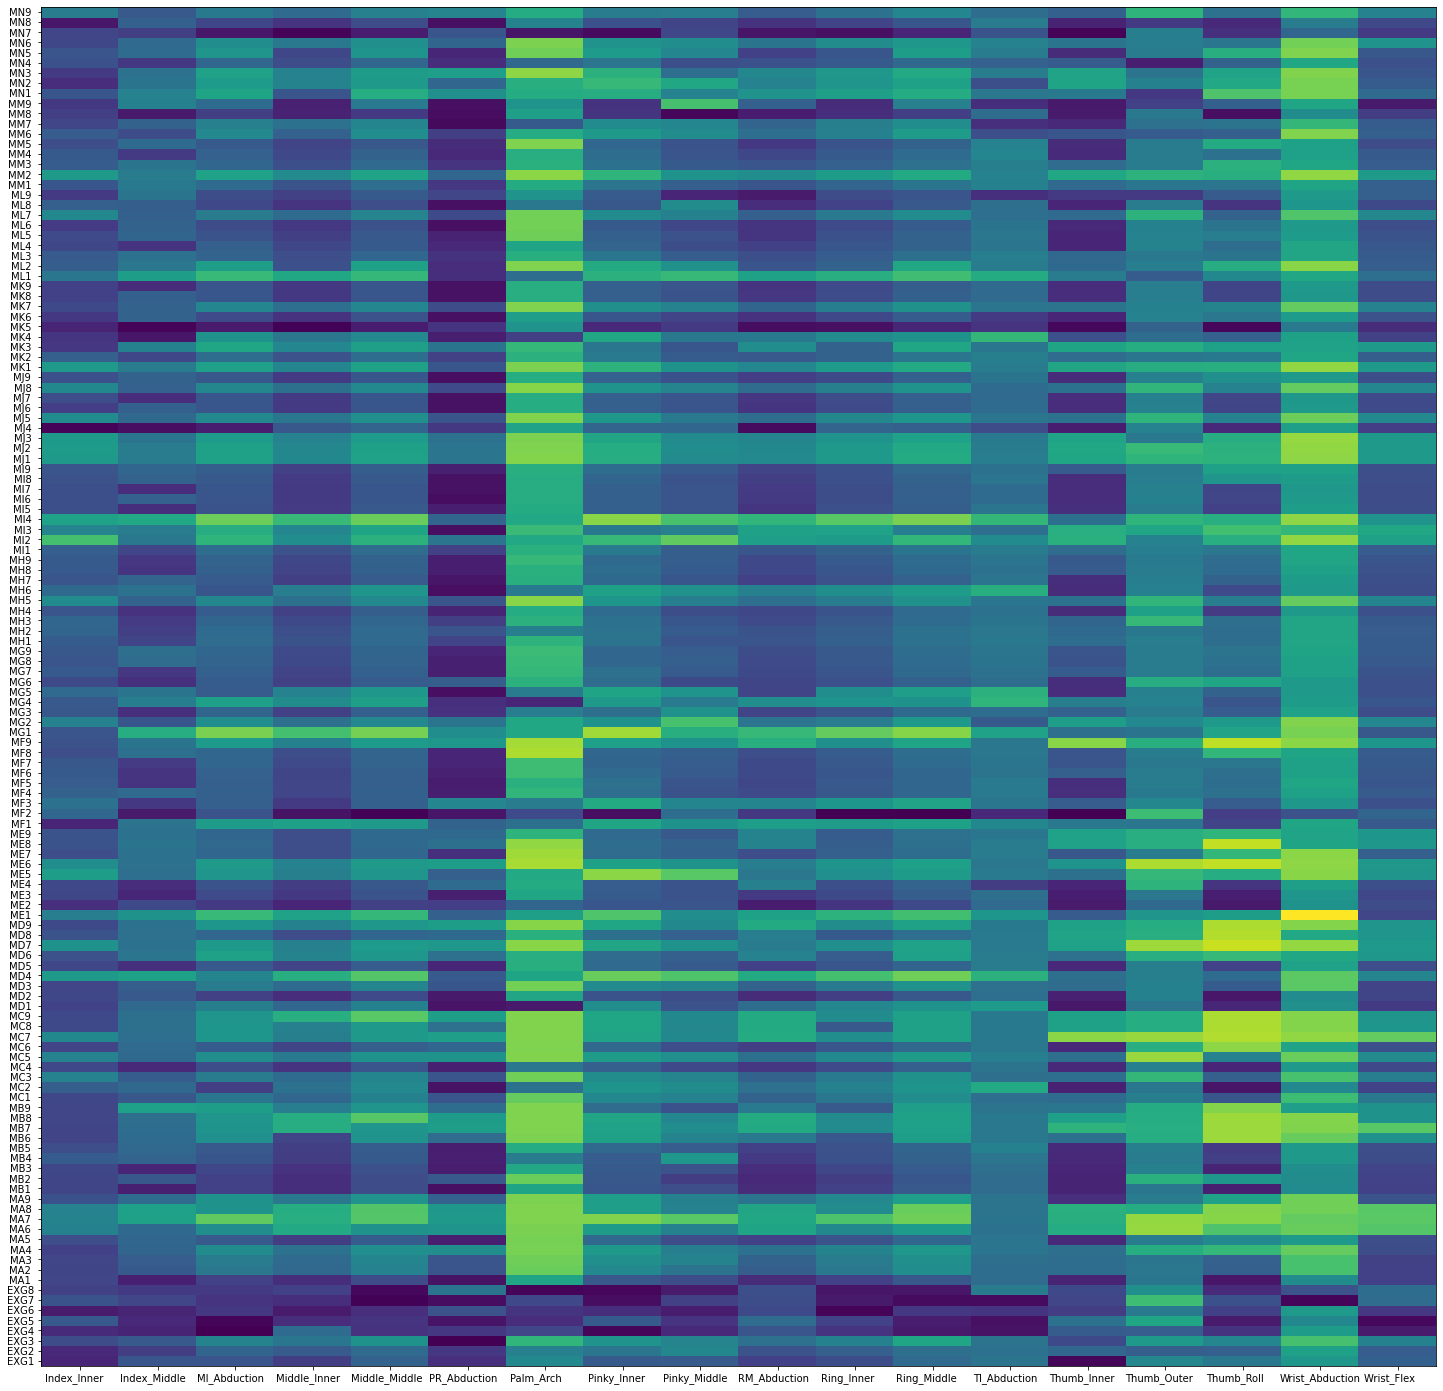

subj: 6
subj: todos
  speed =="fast" & movement =="point"


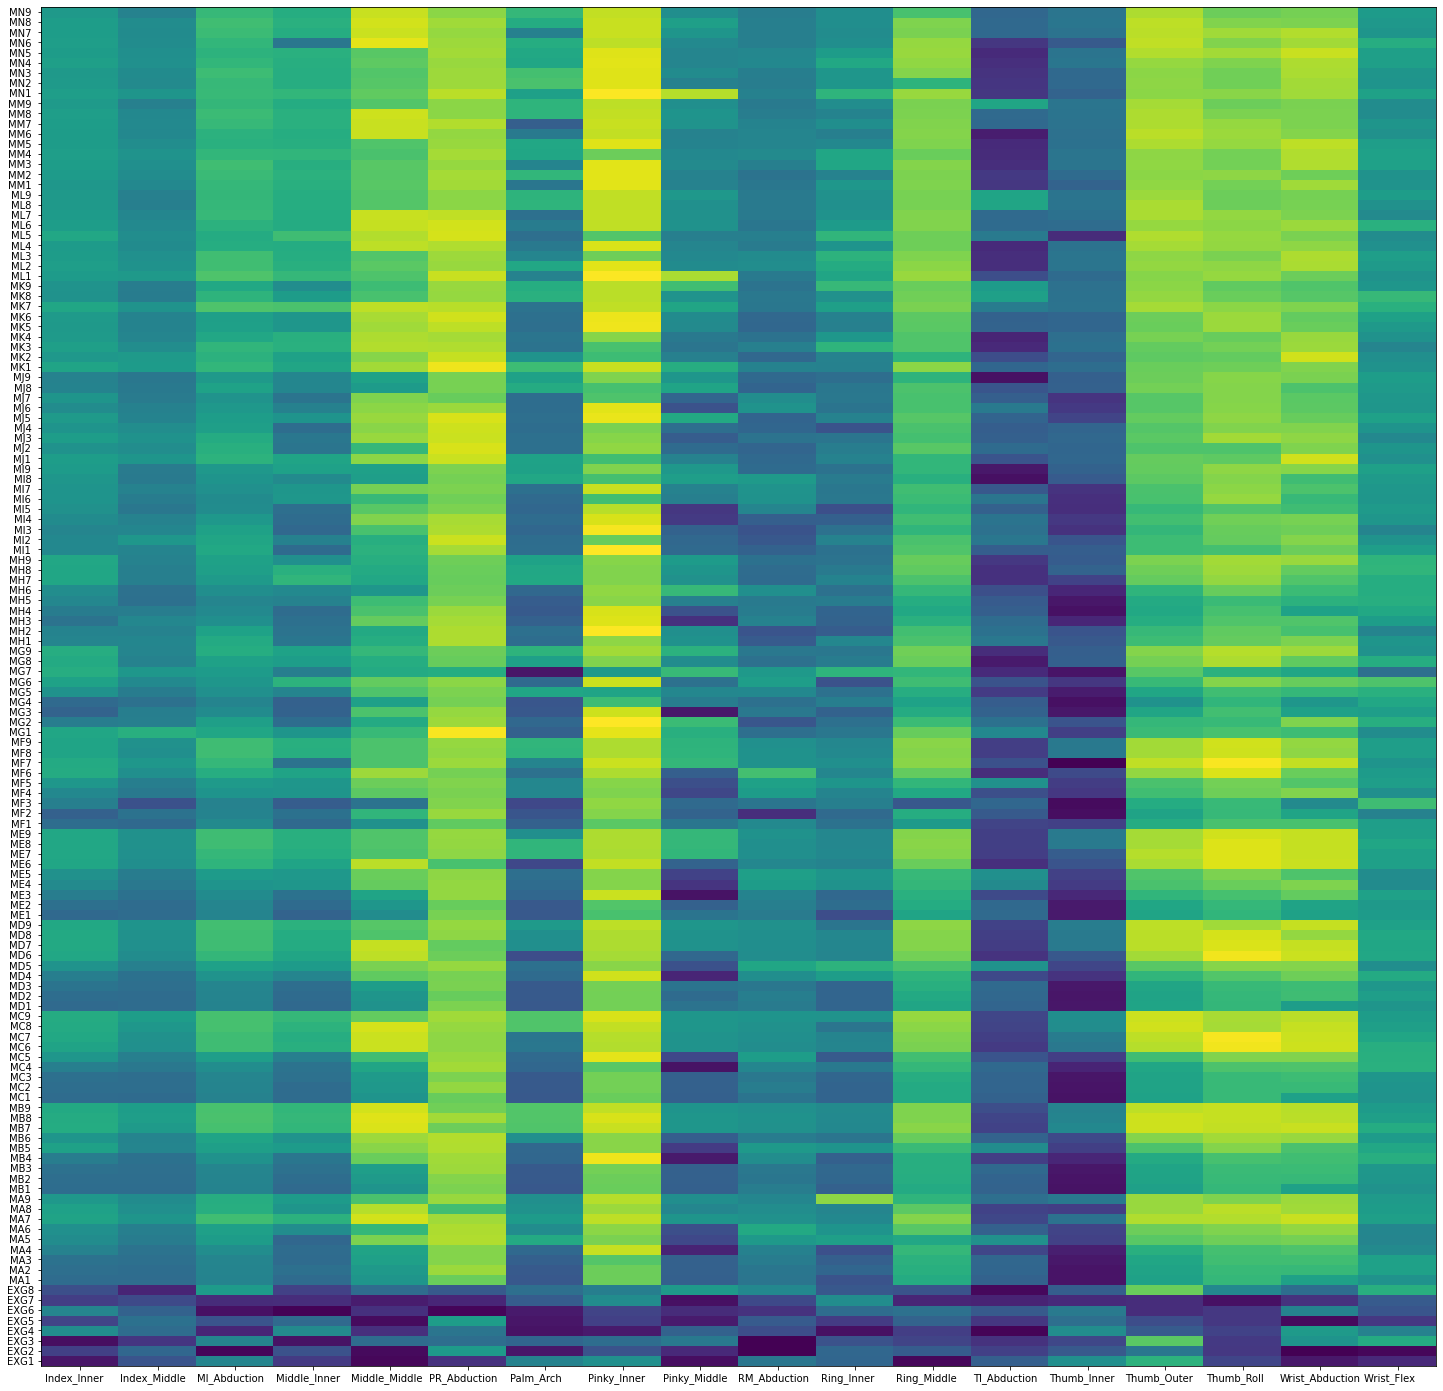

subj: 7
subj: todos
  speed =="fast" & movement =="point"


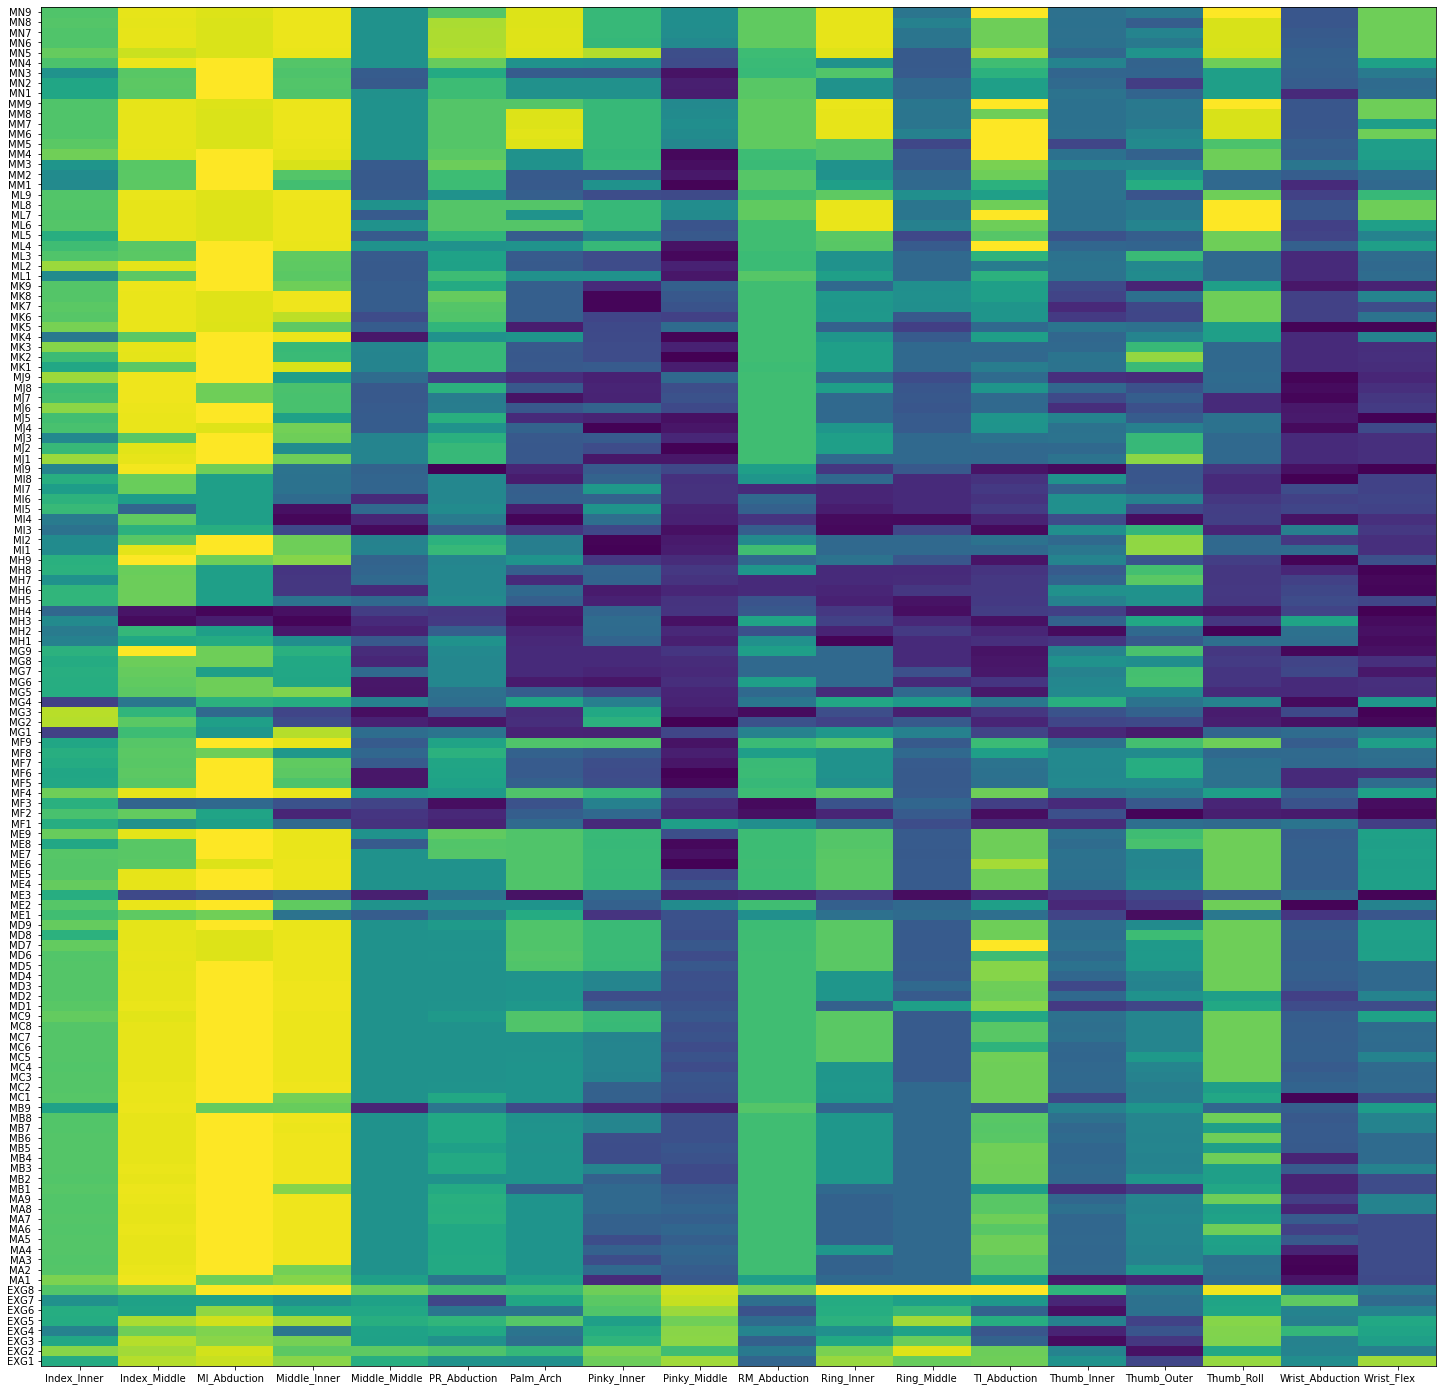

subj: 8
subj: todos
  speed =="fast" & movement =="point"


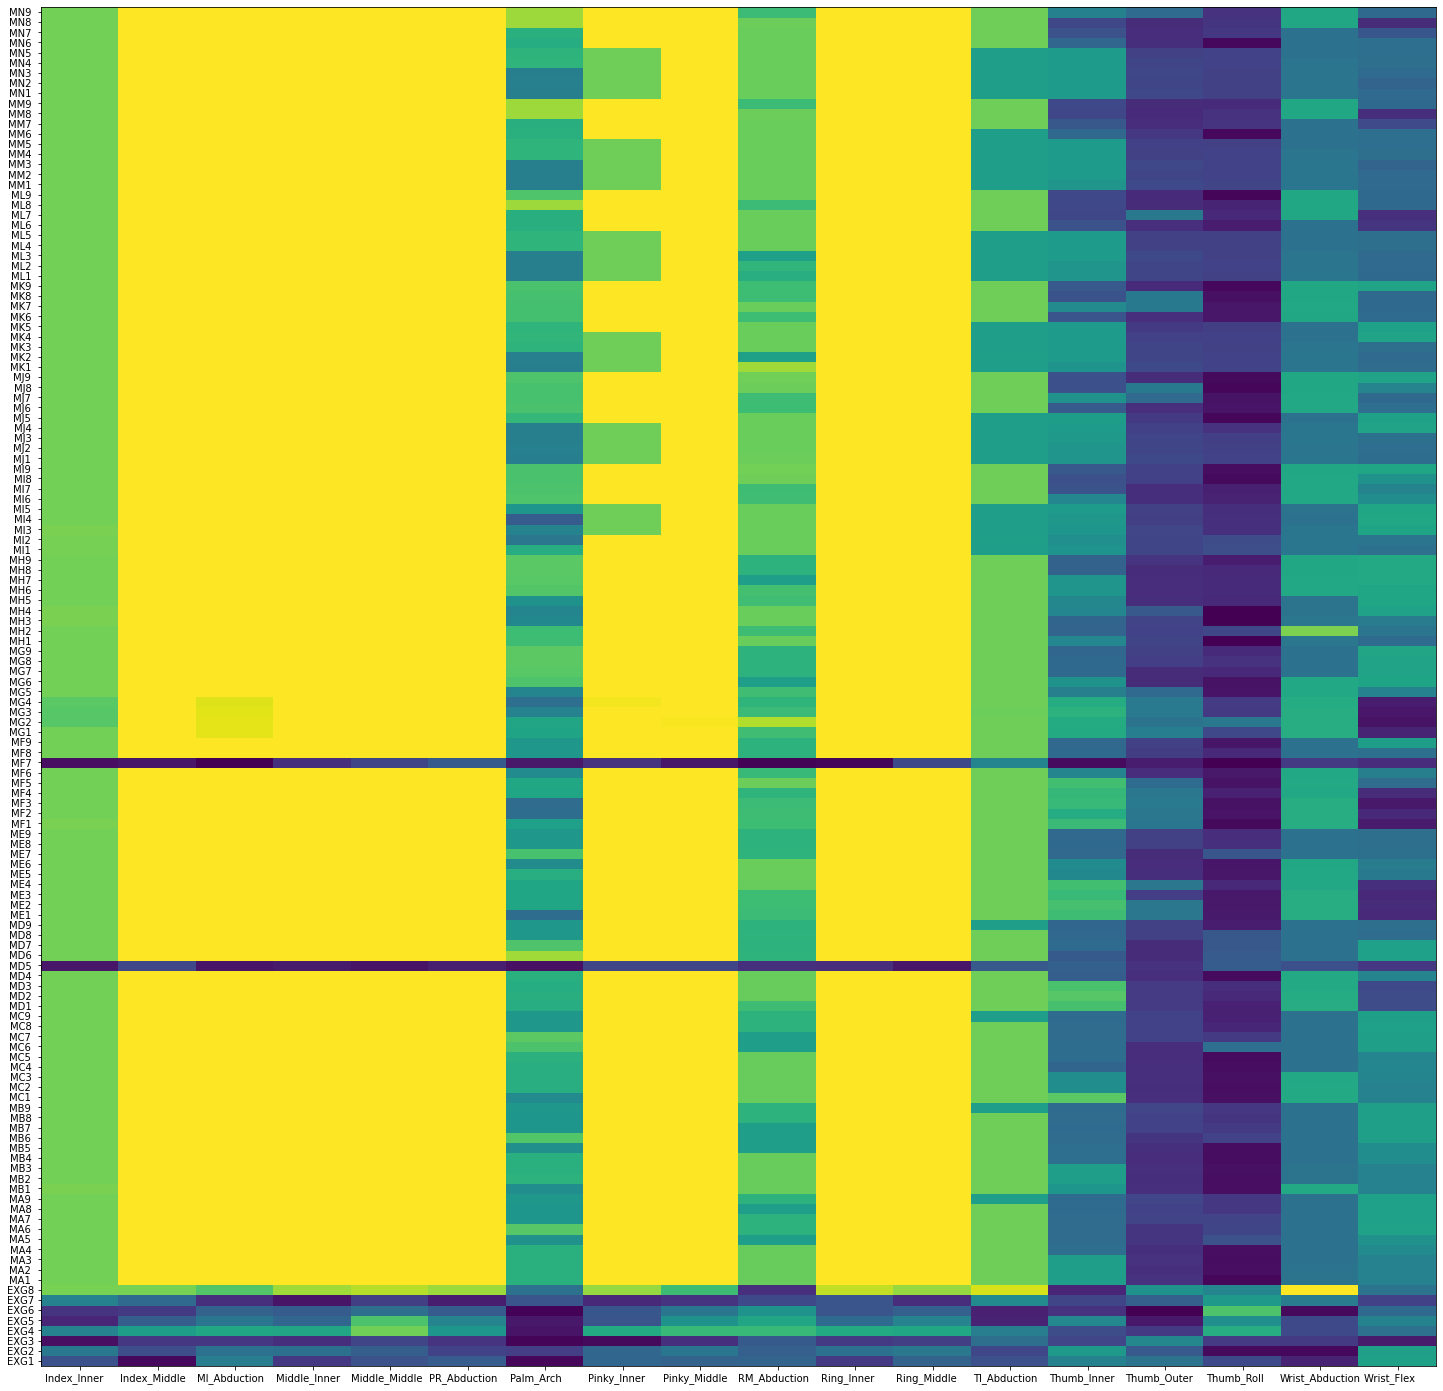

subj: 9
subj: todos
  speed =="fast" & movement =="point"


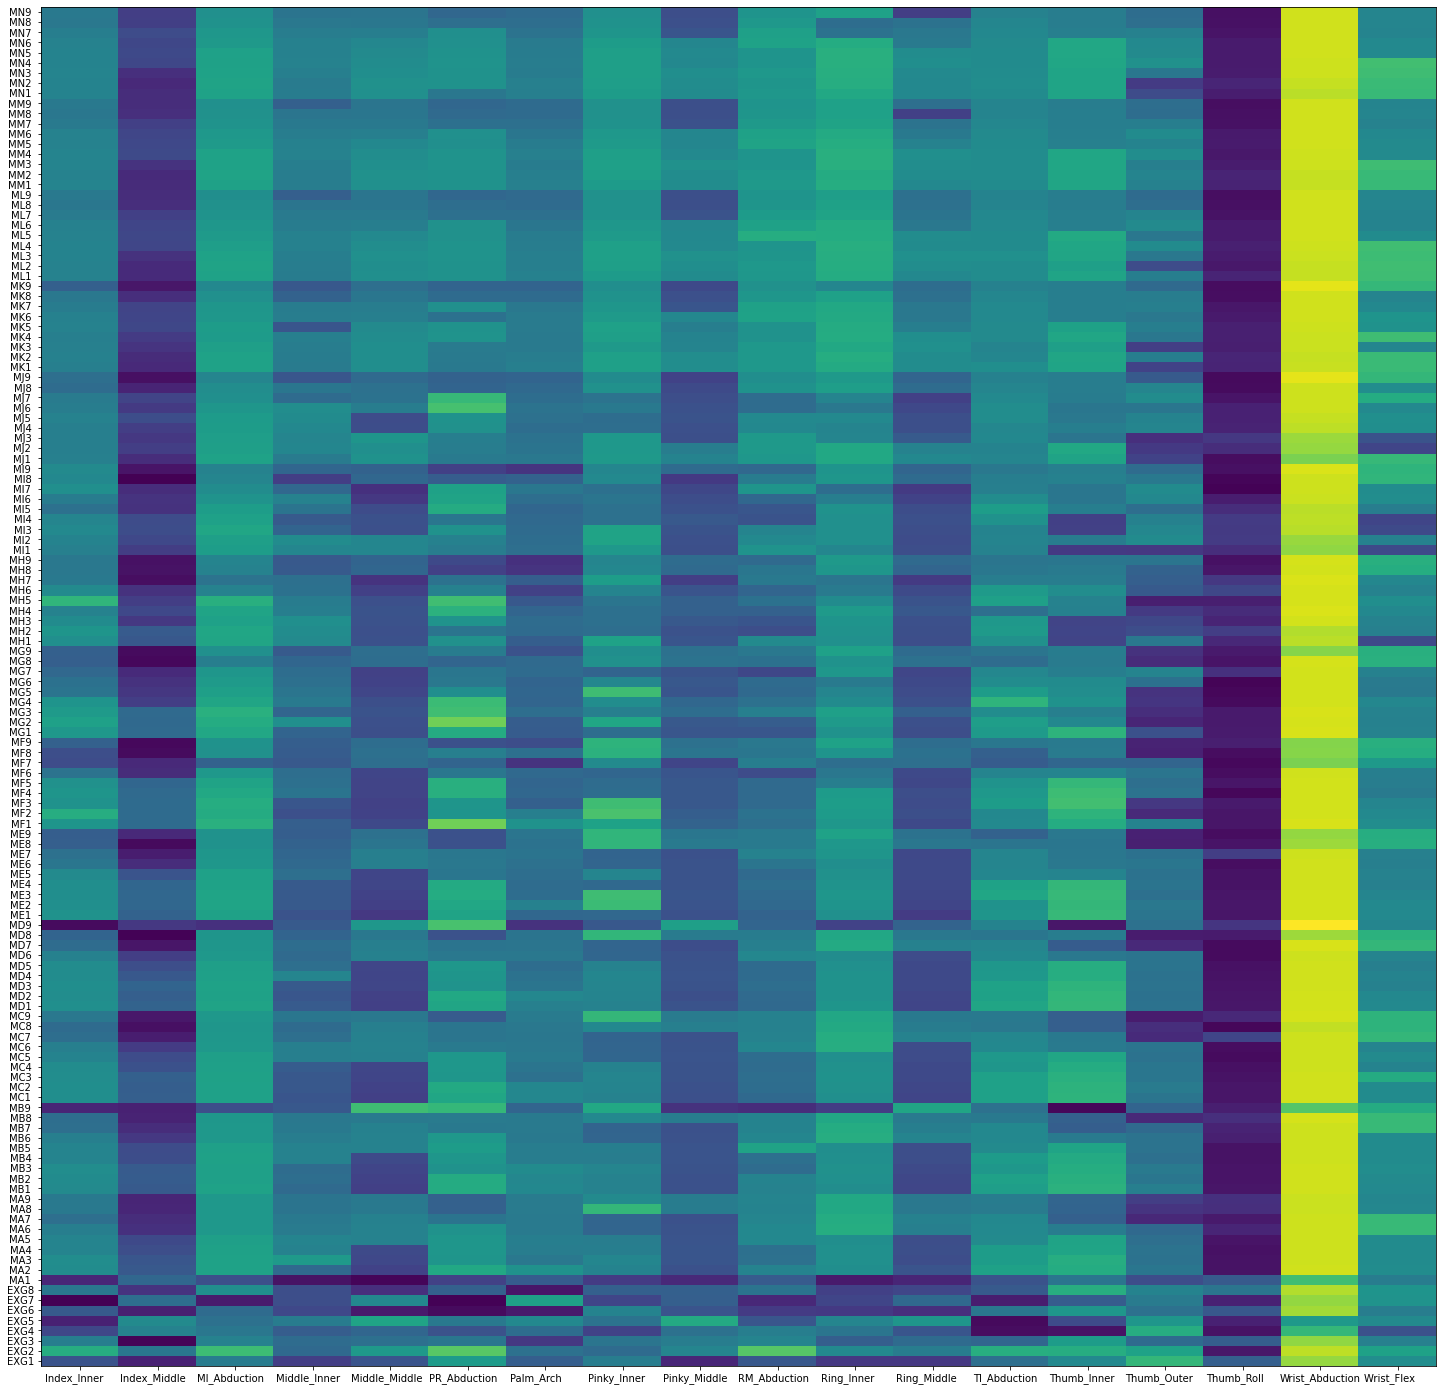

subj: 10
subj: todos
  speed =="fast" & movement =="point"


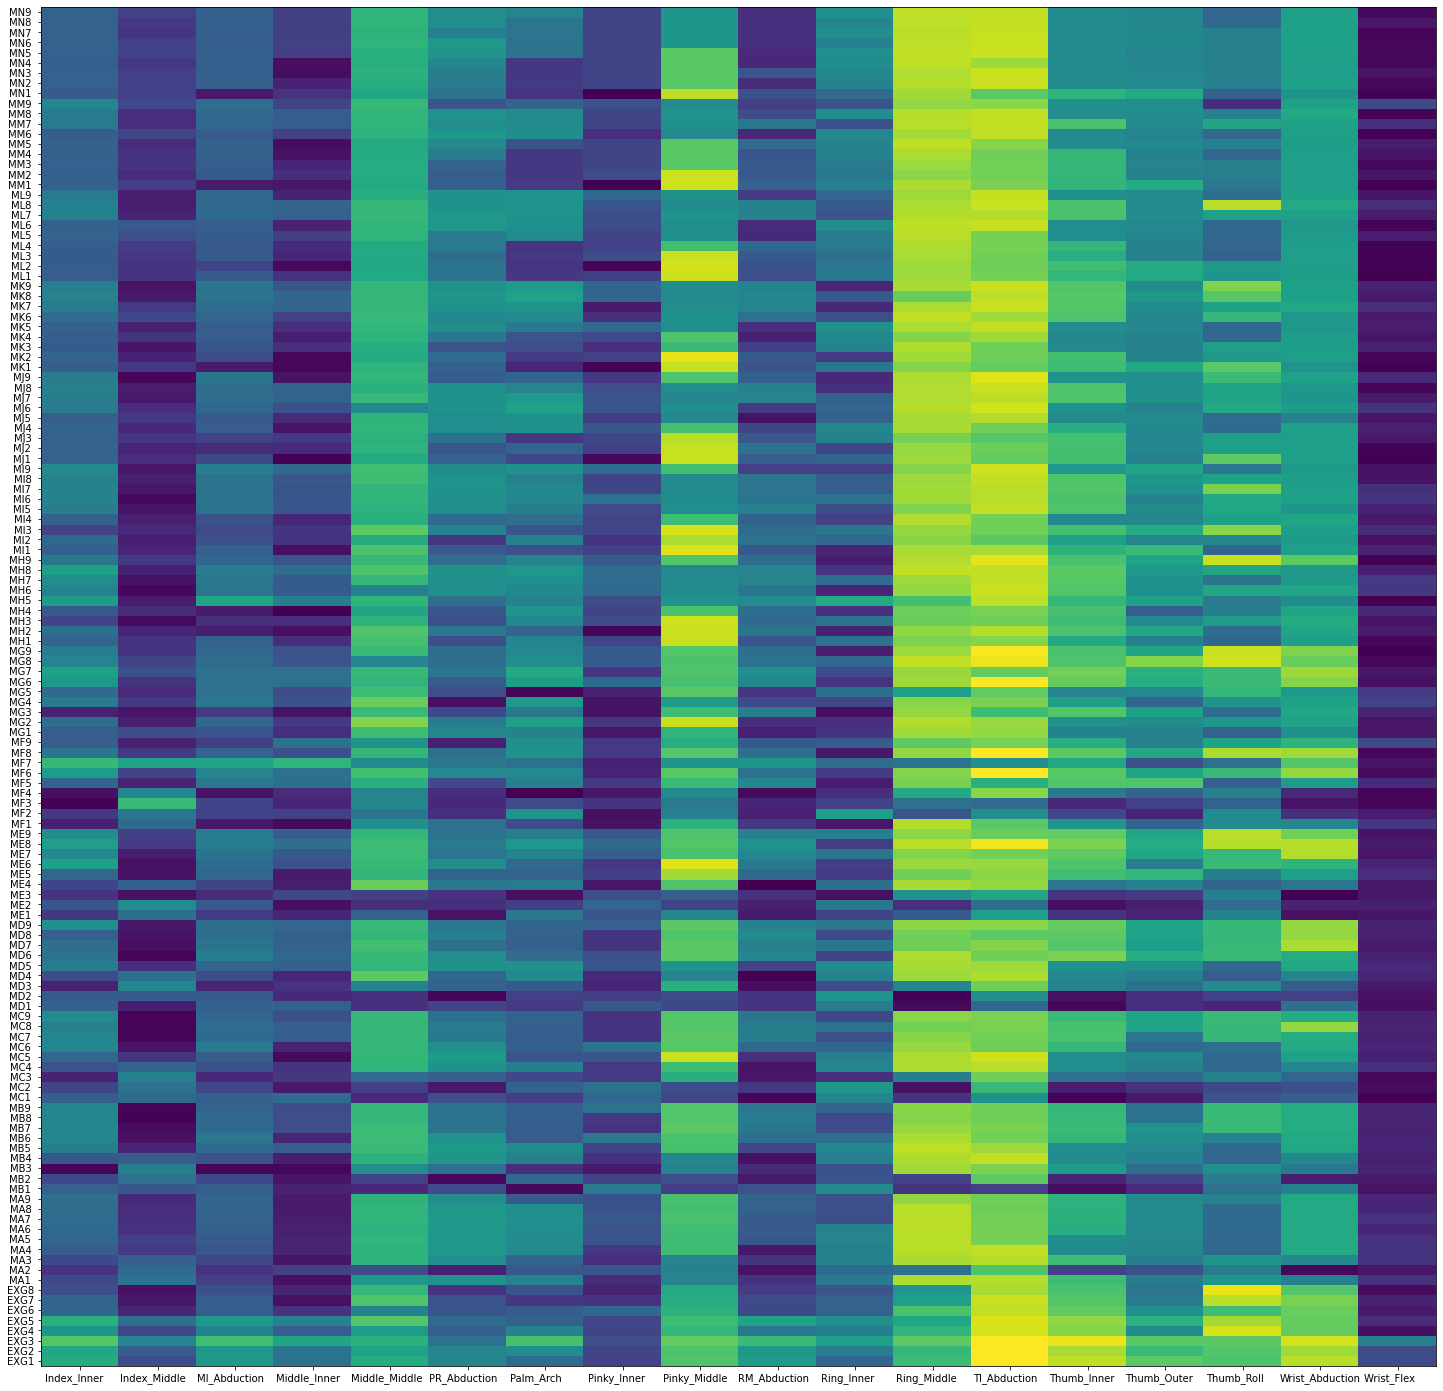

subj: 11
subj: todos
  speed =="fast" & movement =="point"


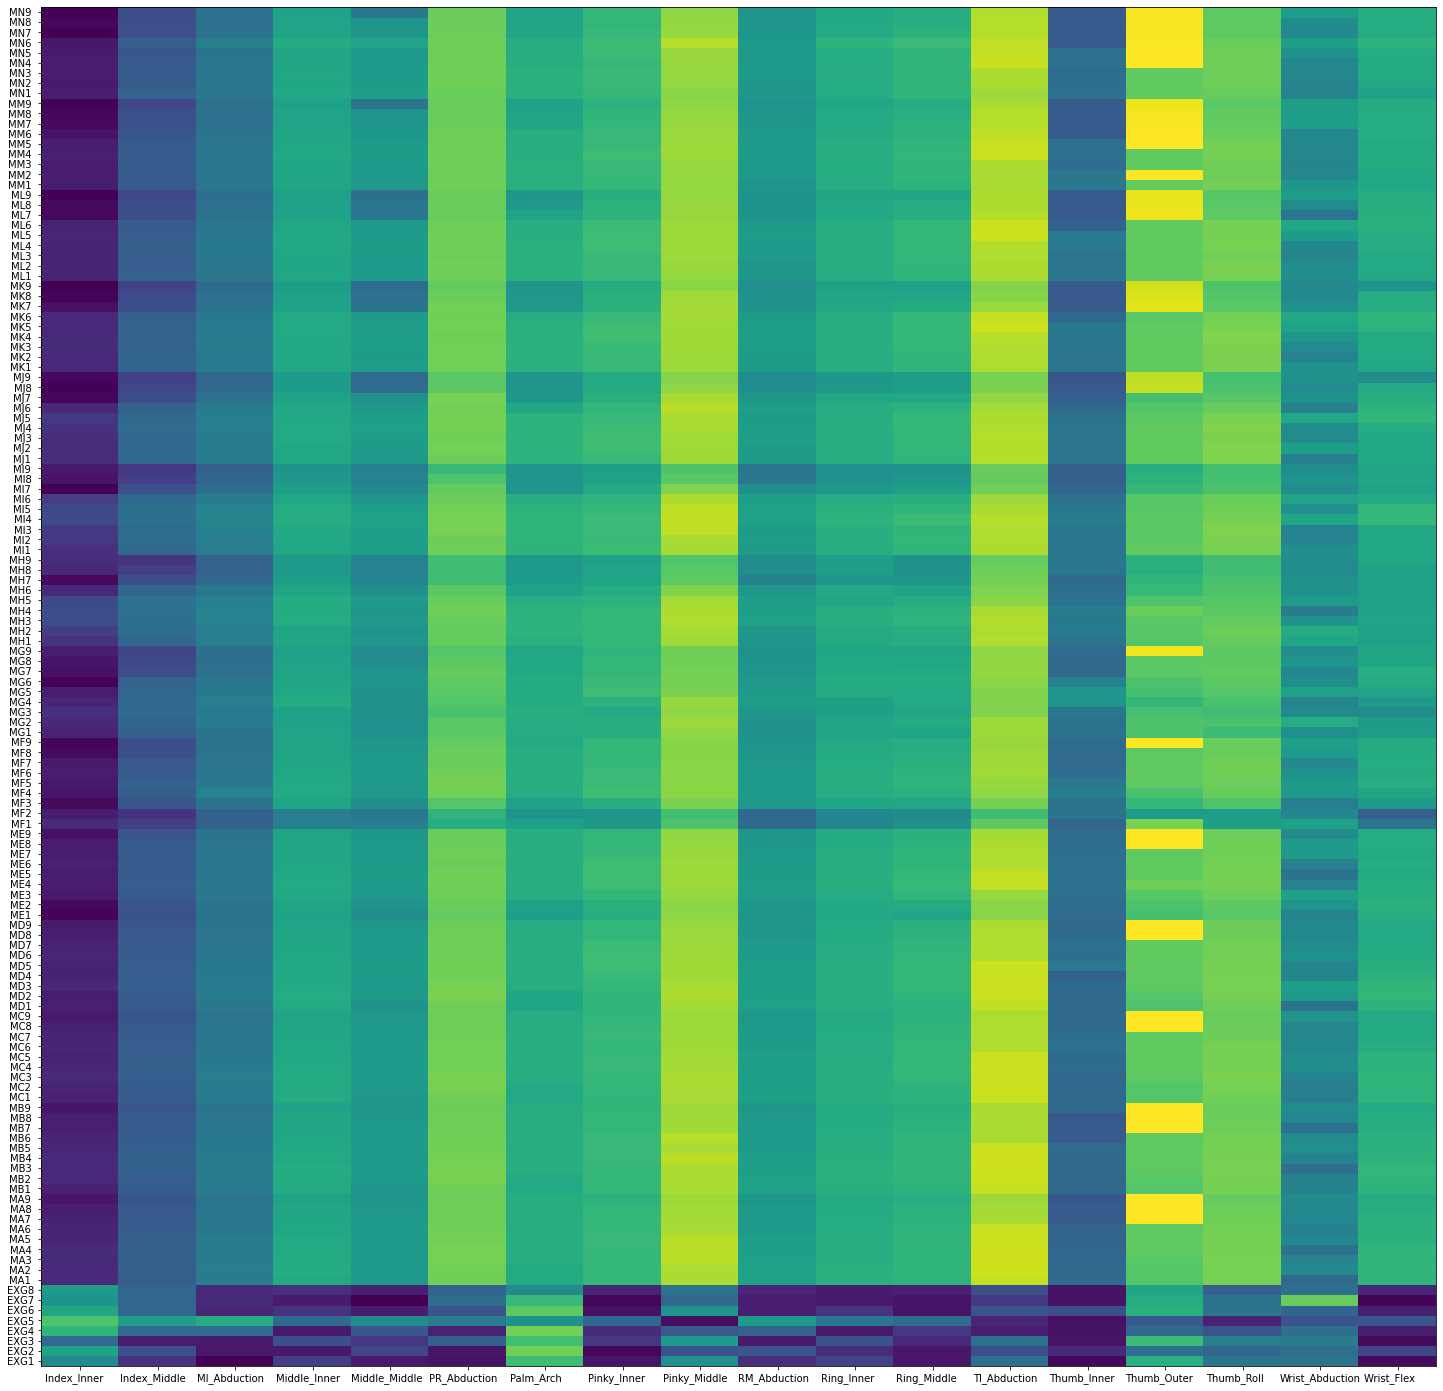

subj: 12
subj: todos
  speed =="fast" & movement =="point"


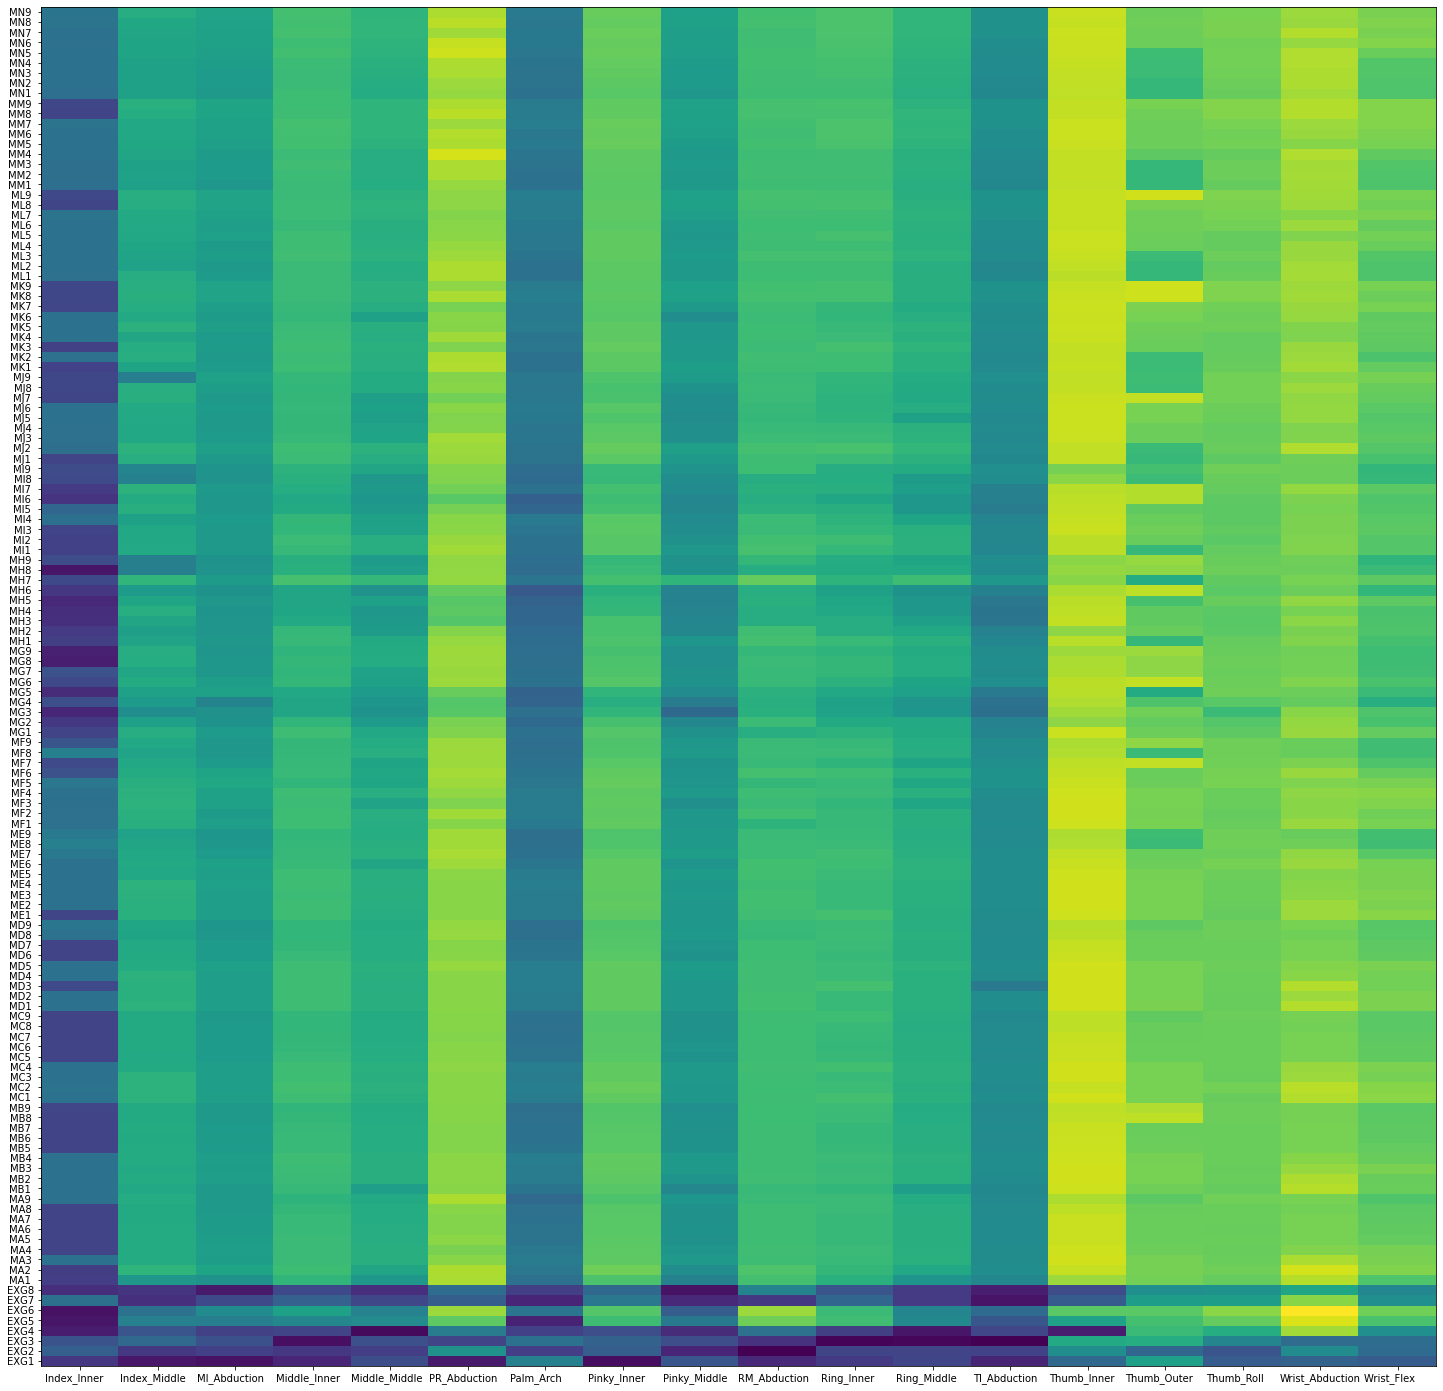

subj: 13
subj: todos
  speed =="fast" & movement =="point"


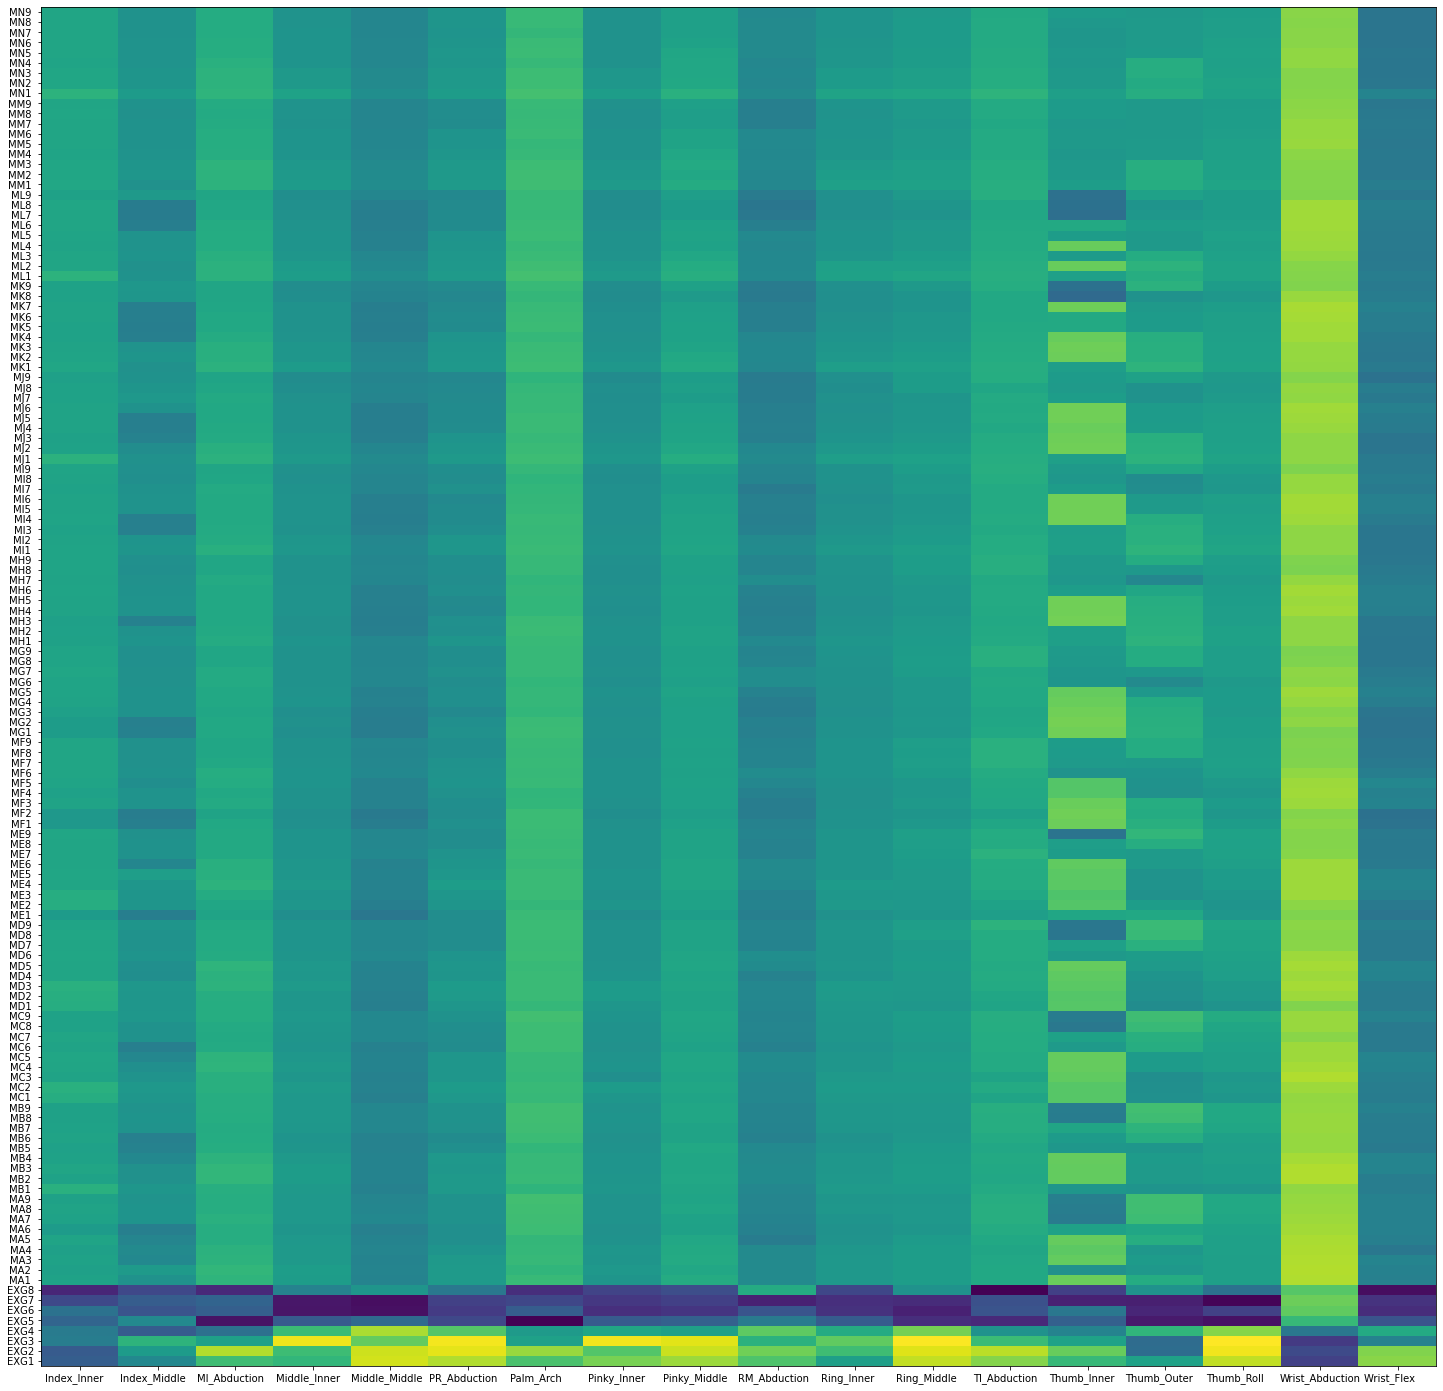

subj: 14
subj: todos
  speed =="fast" & movement =="point"


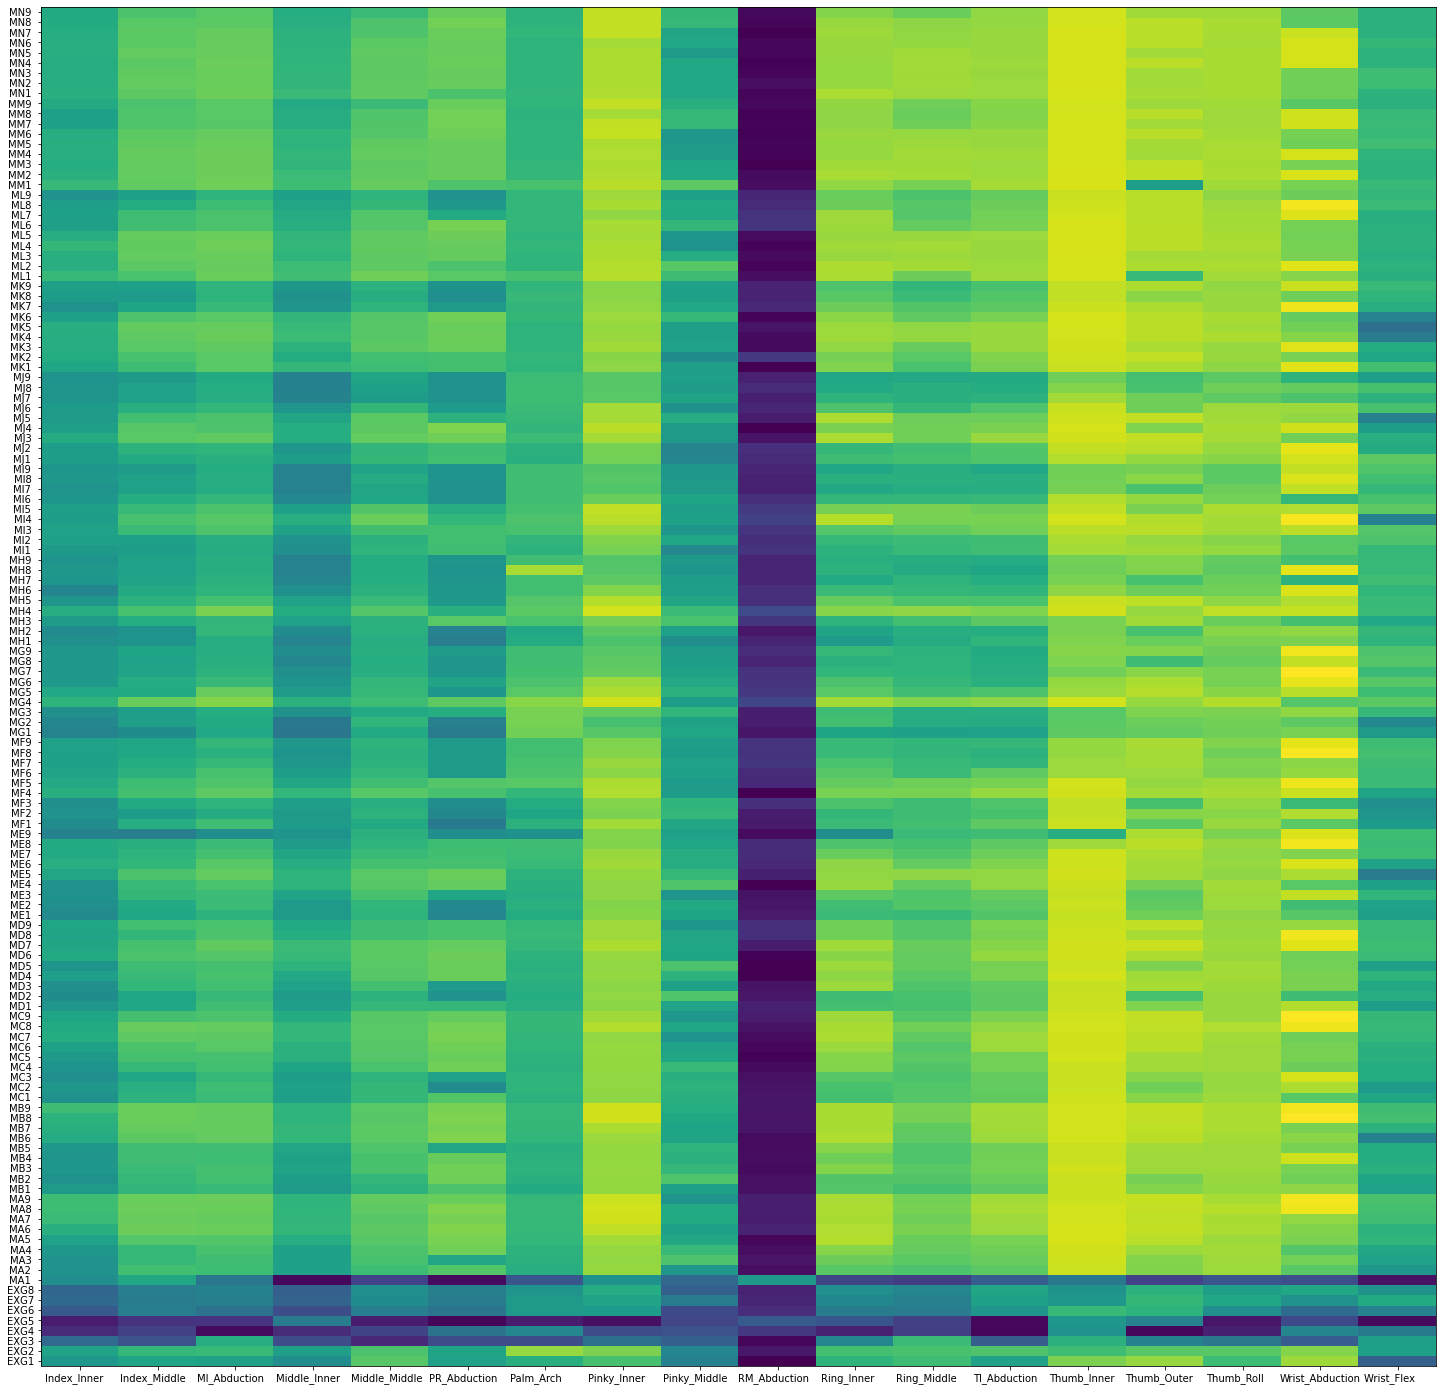

subj: 15
subj: todos
  speed =="fast" & movement =="point"


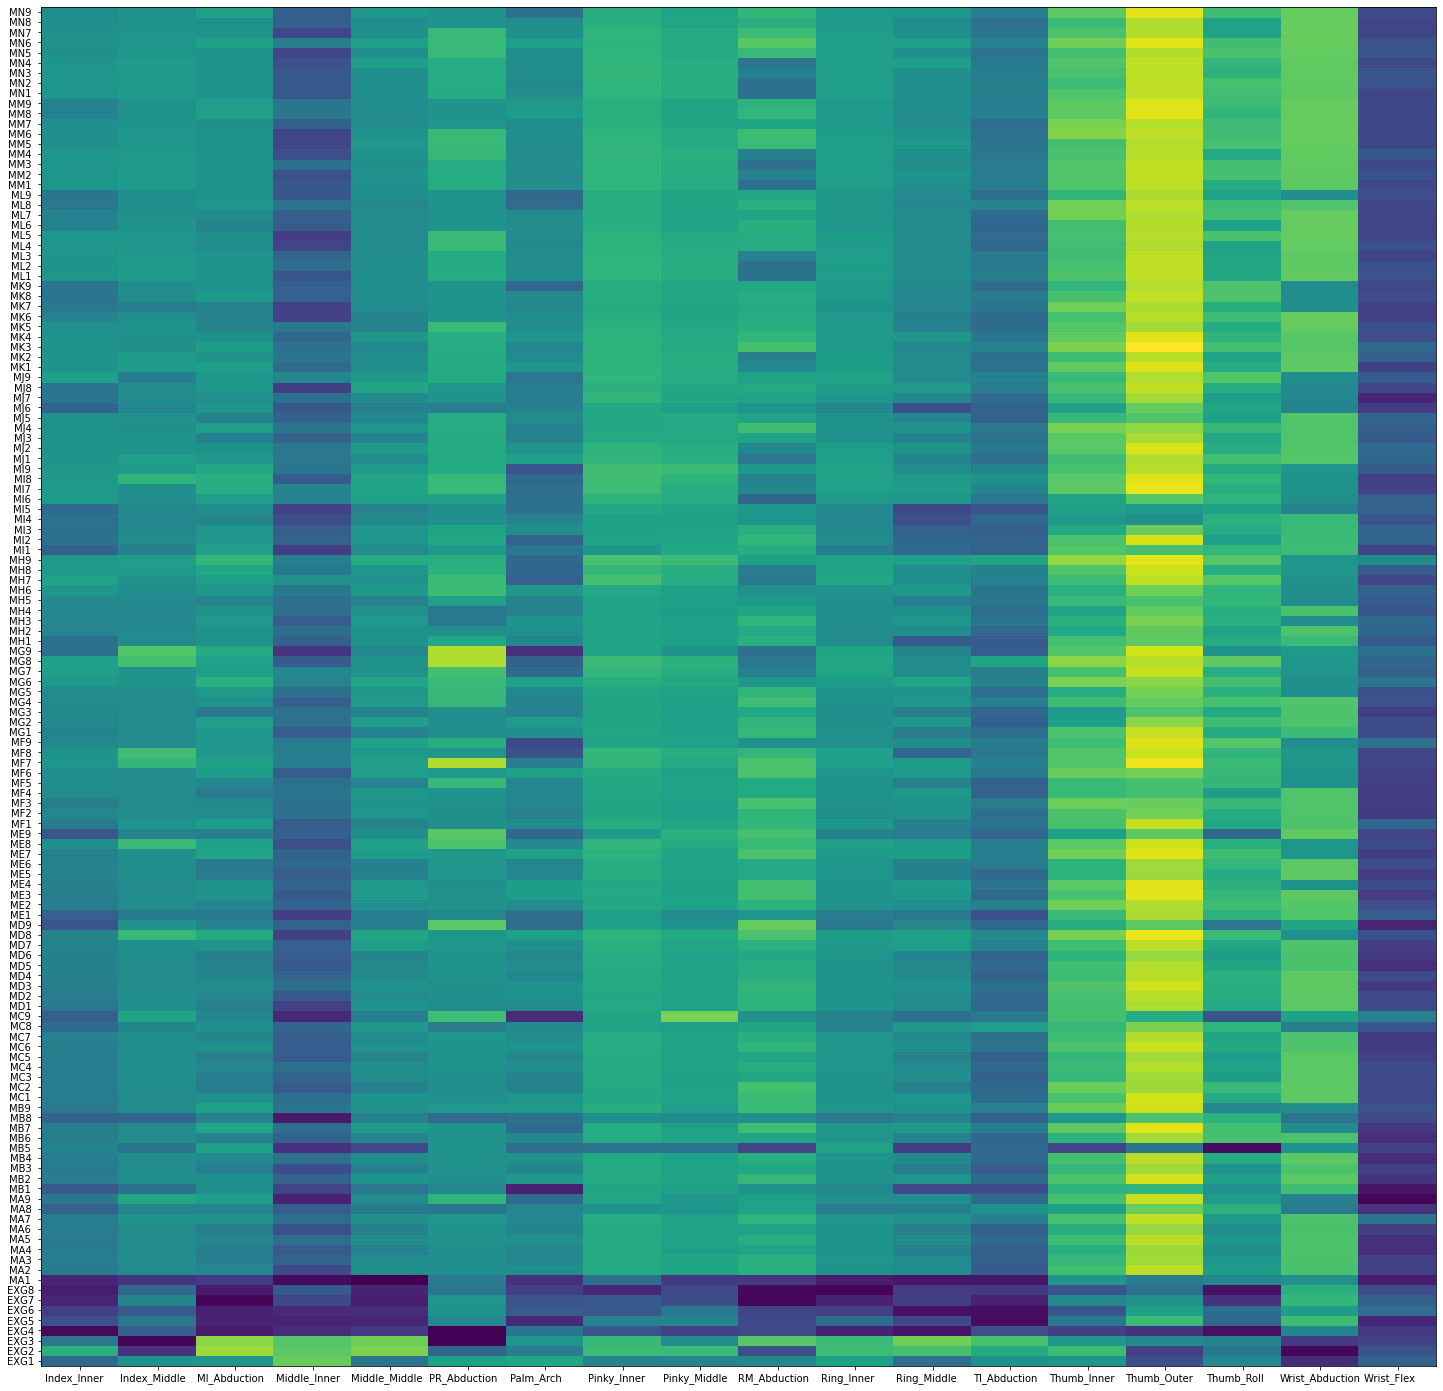

subj: 16
subj: todos
  speed =="fast" & movement =="point"


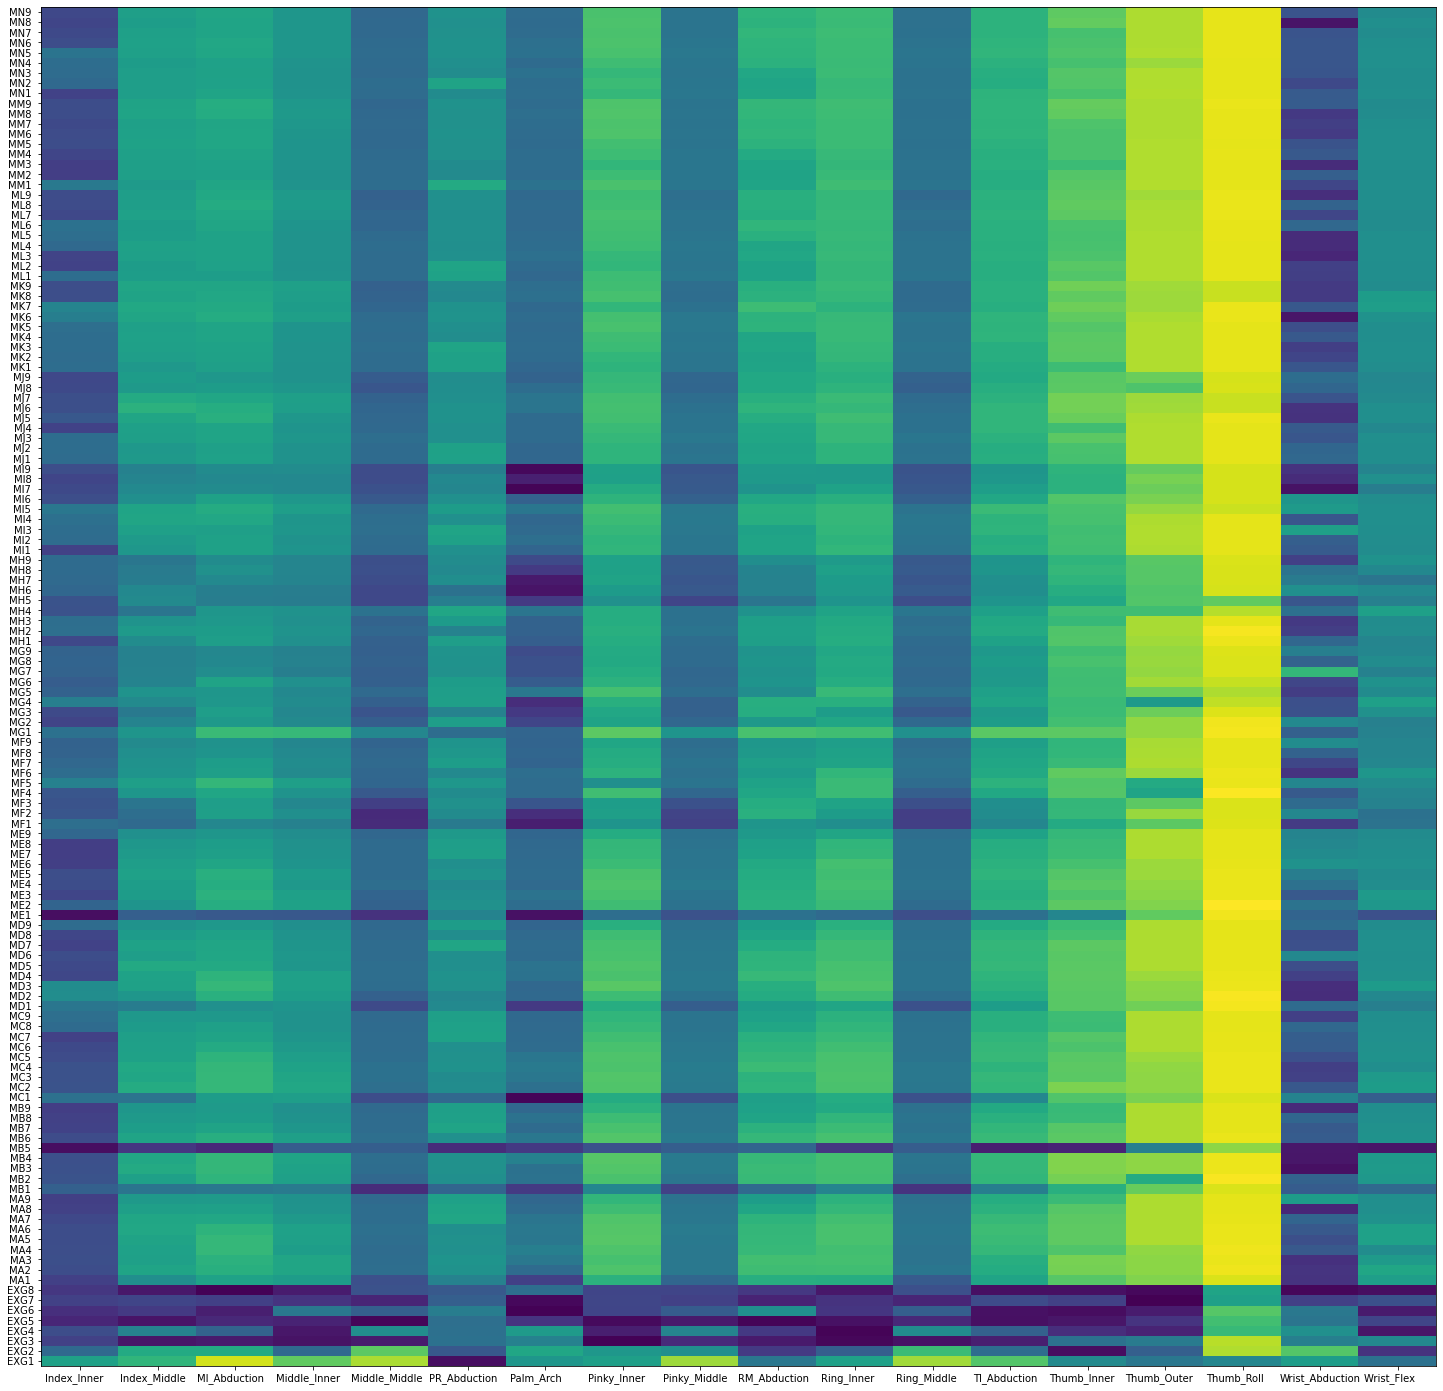

subj: 17
subj: todos
  speed =="fast" & movement =="point"


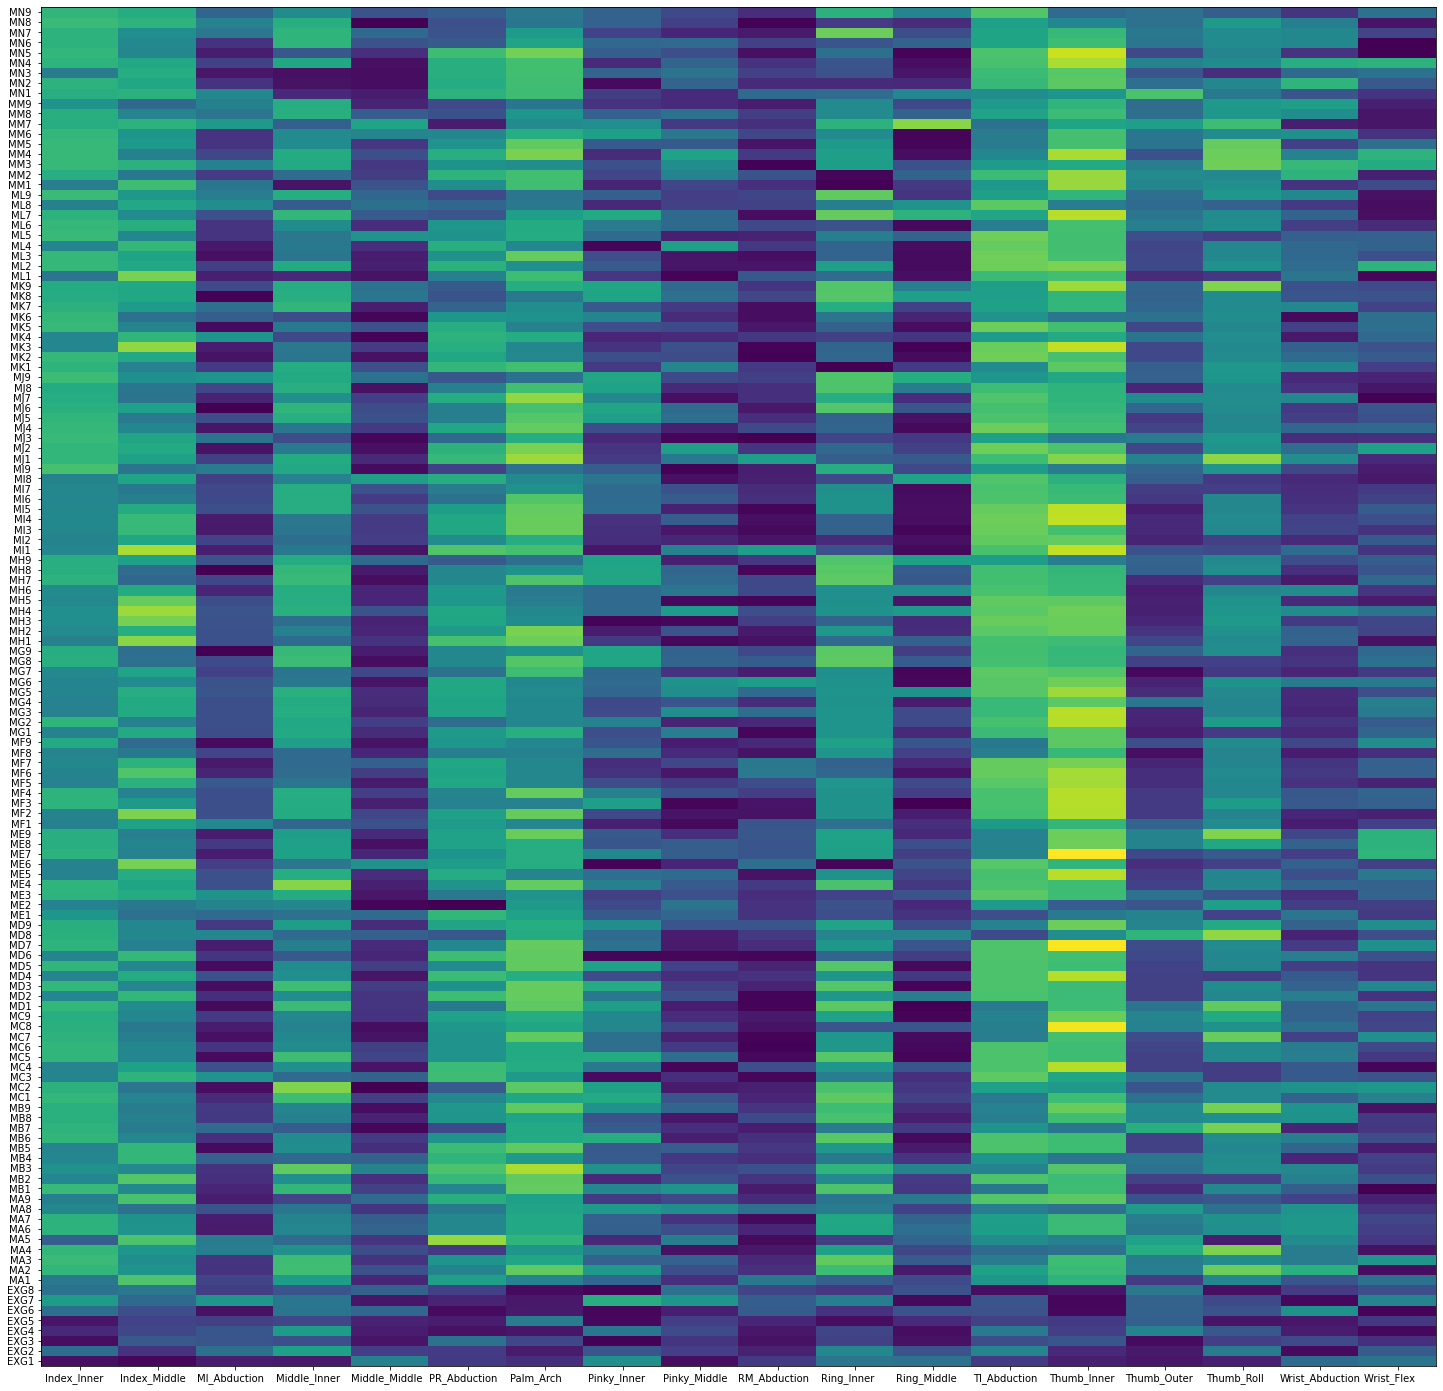

subj: 18
subj: todos
  speed =="fast" & movement =="point"


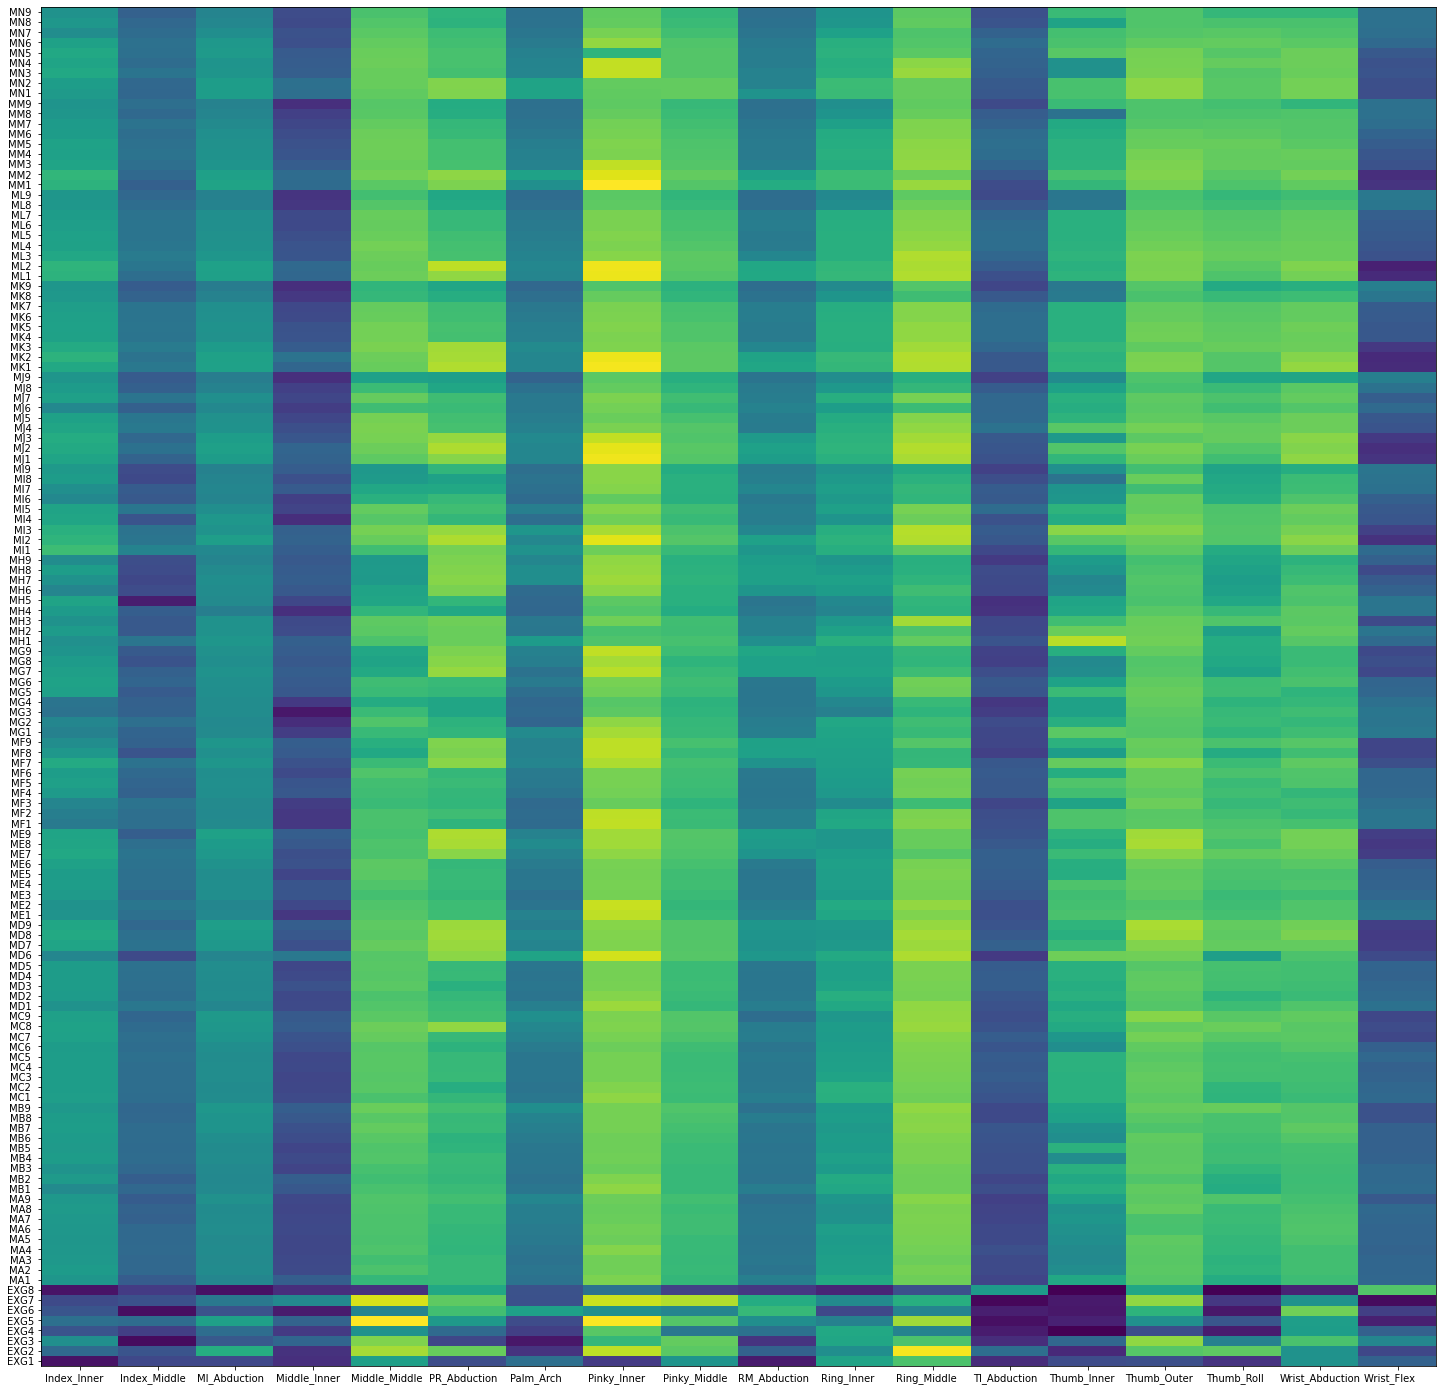

subj: 19
subj: todos
  speed =="fast" & movement =="point"


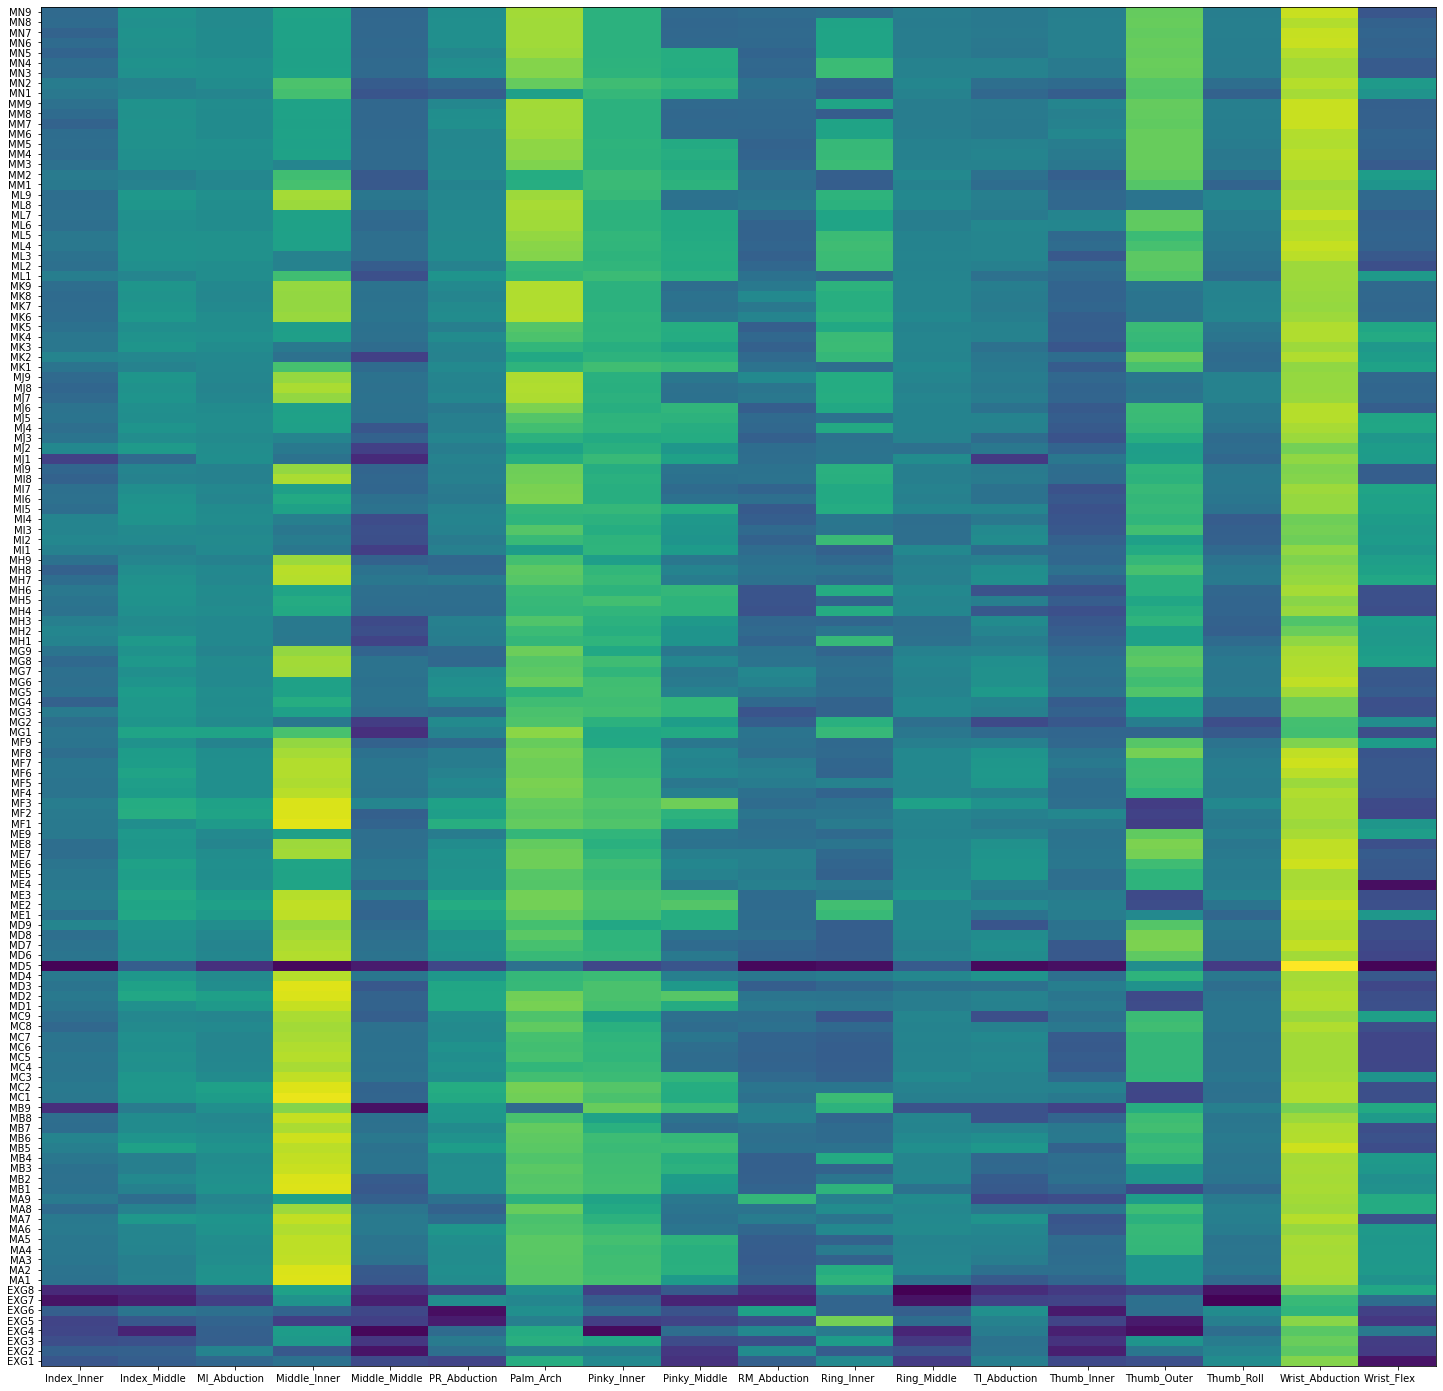

subj: 20
subj: todos
  speed =="fast" & movement =="point"


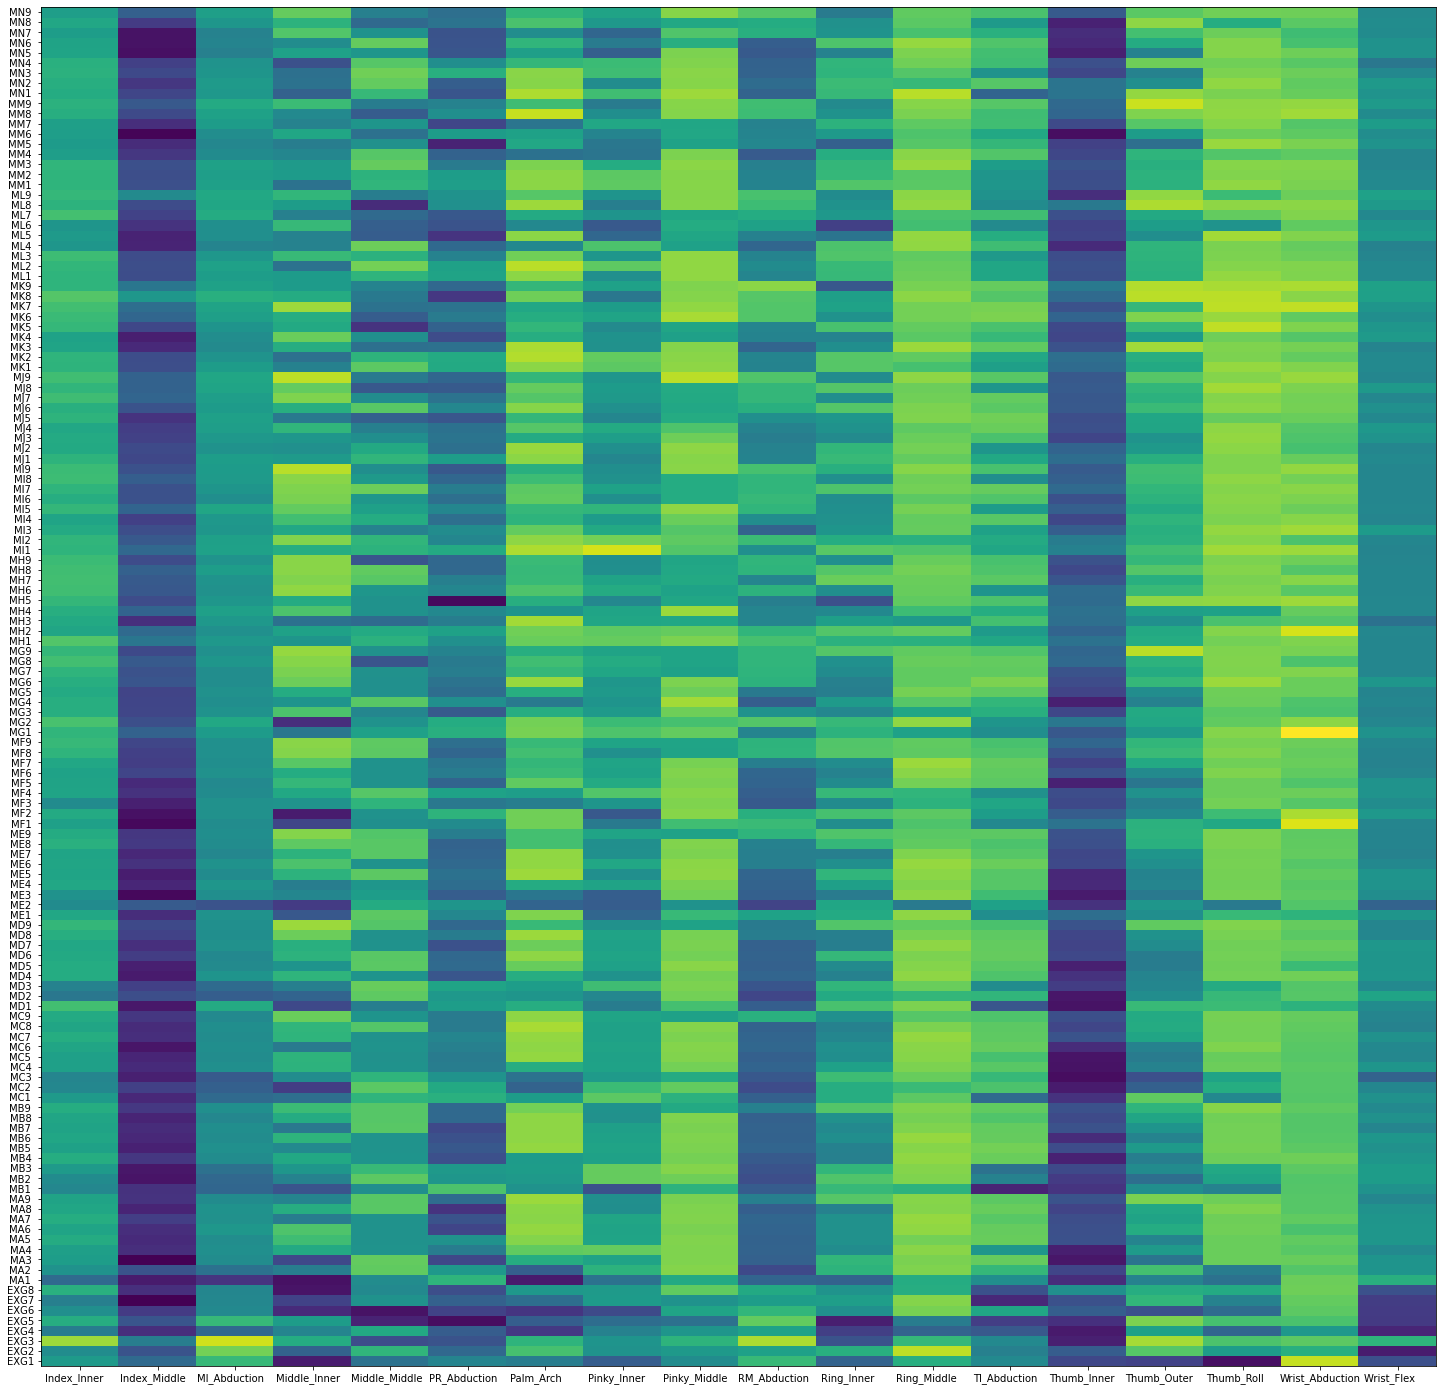

subj: 21
subj: todos
  speed =="fast" & movement =="point"


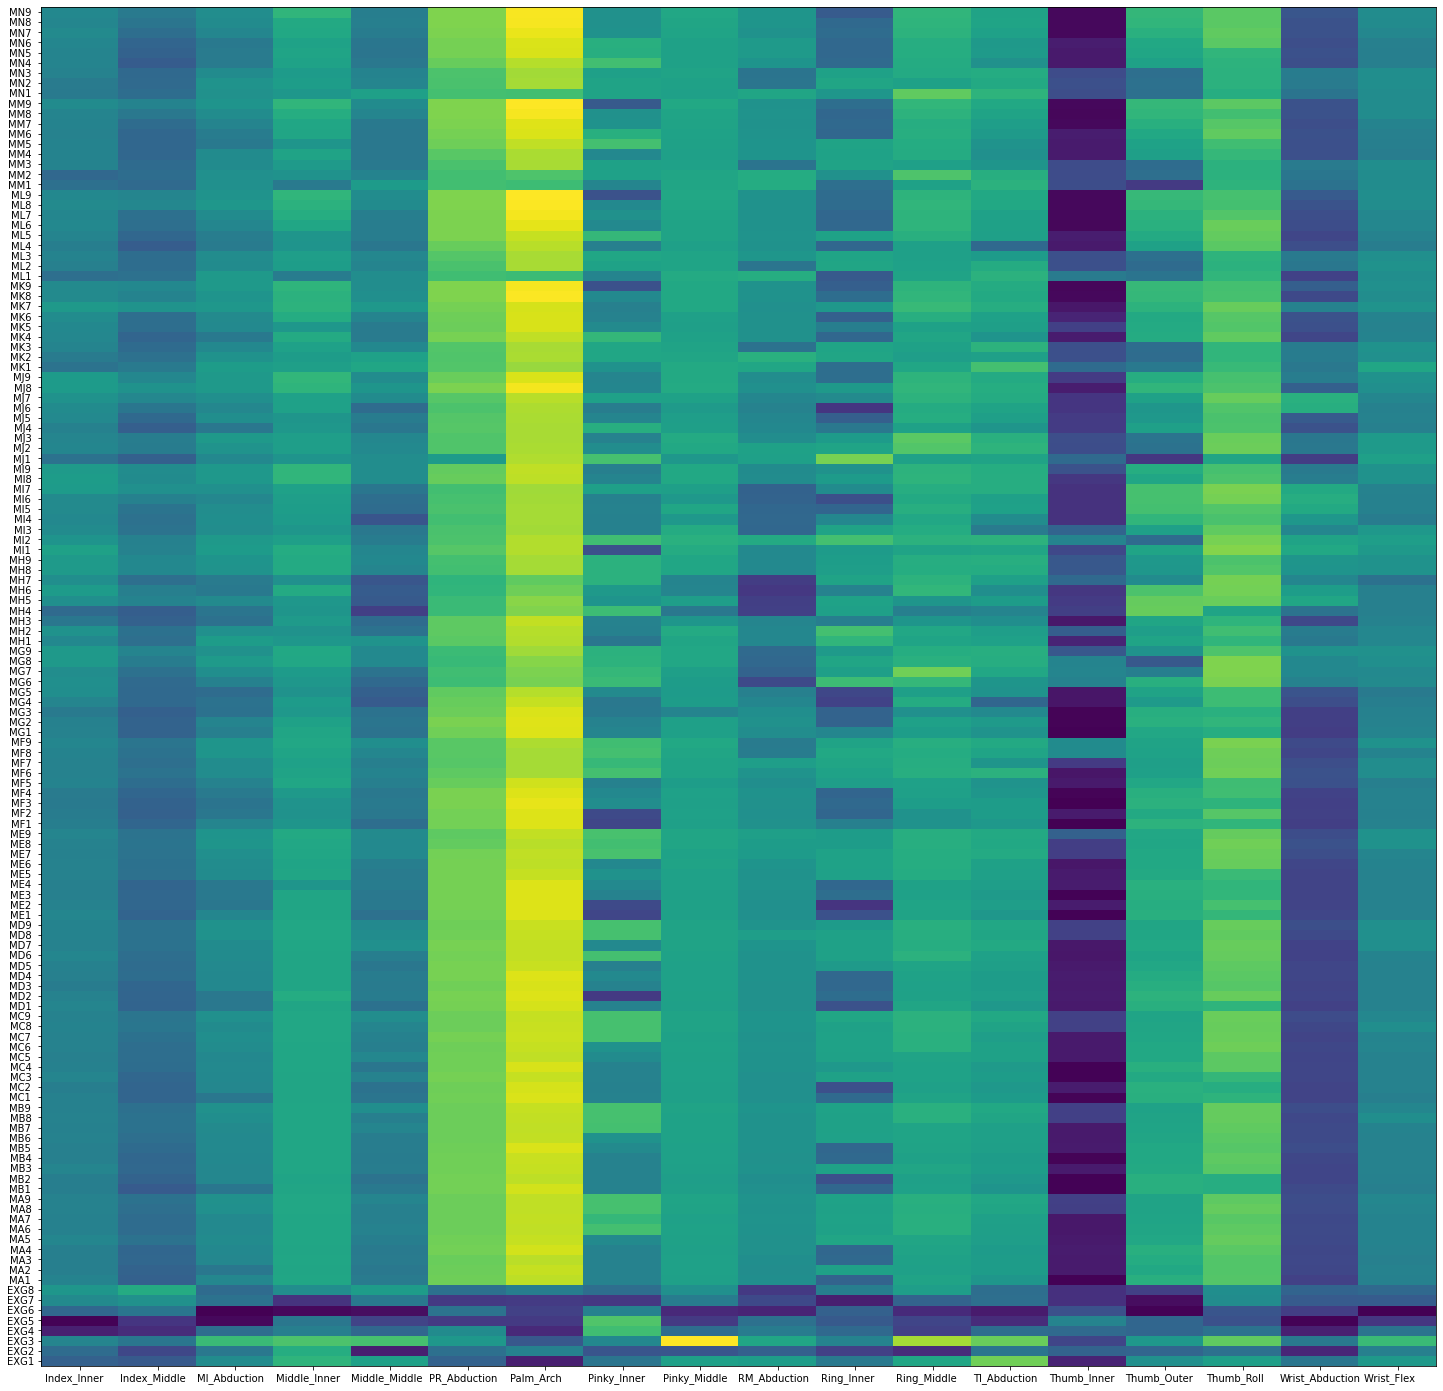

subj: 22
subj: todos
  speed =="fast" & movement =="point"


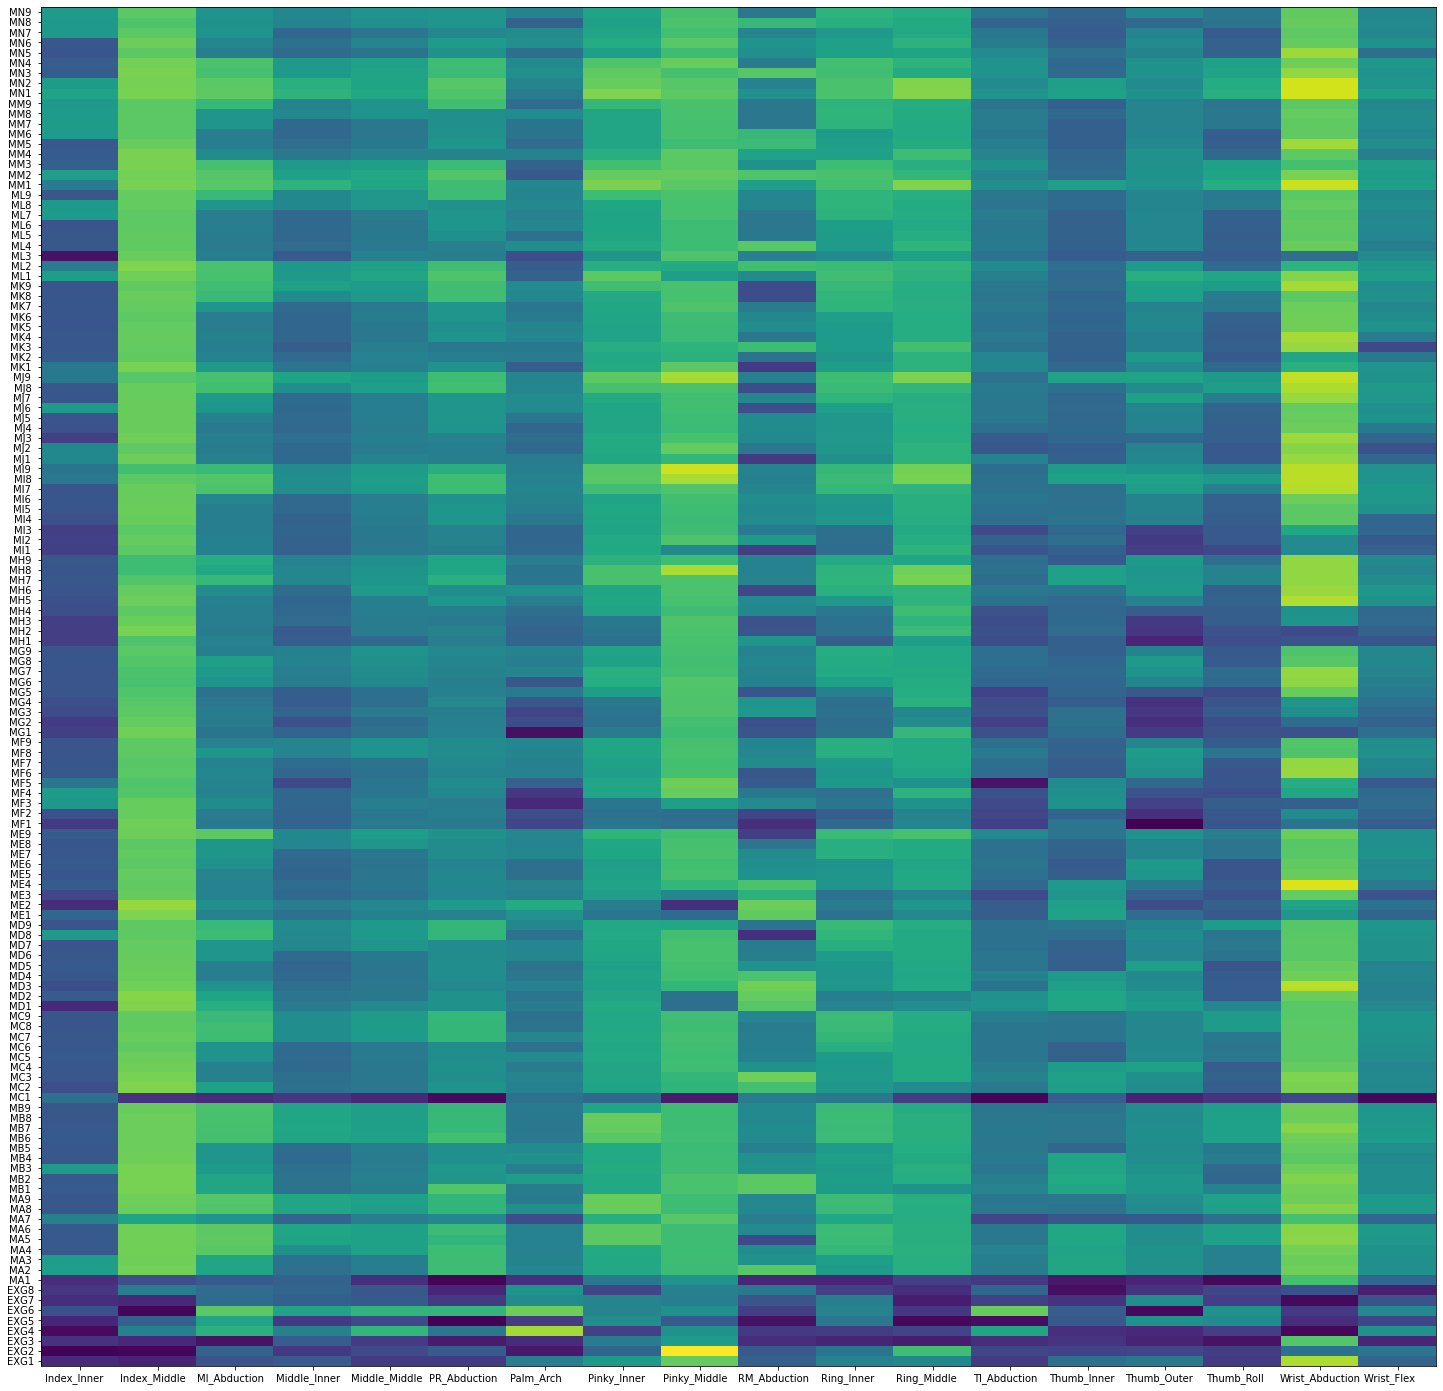

subj: 23
subj: todos
  speed =="fast" & movement =="point"


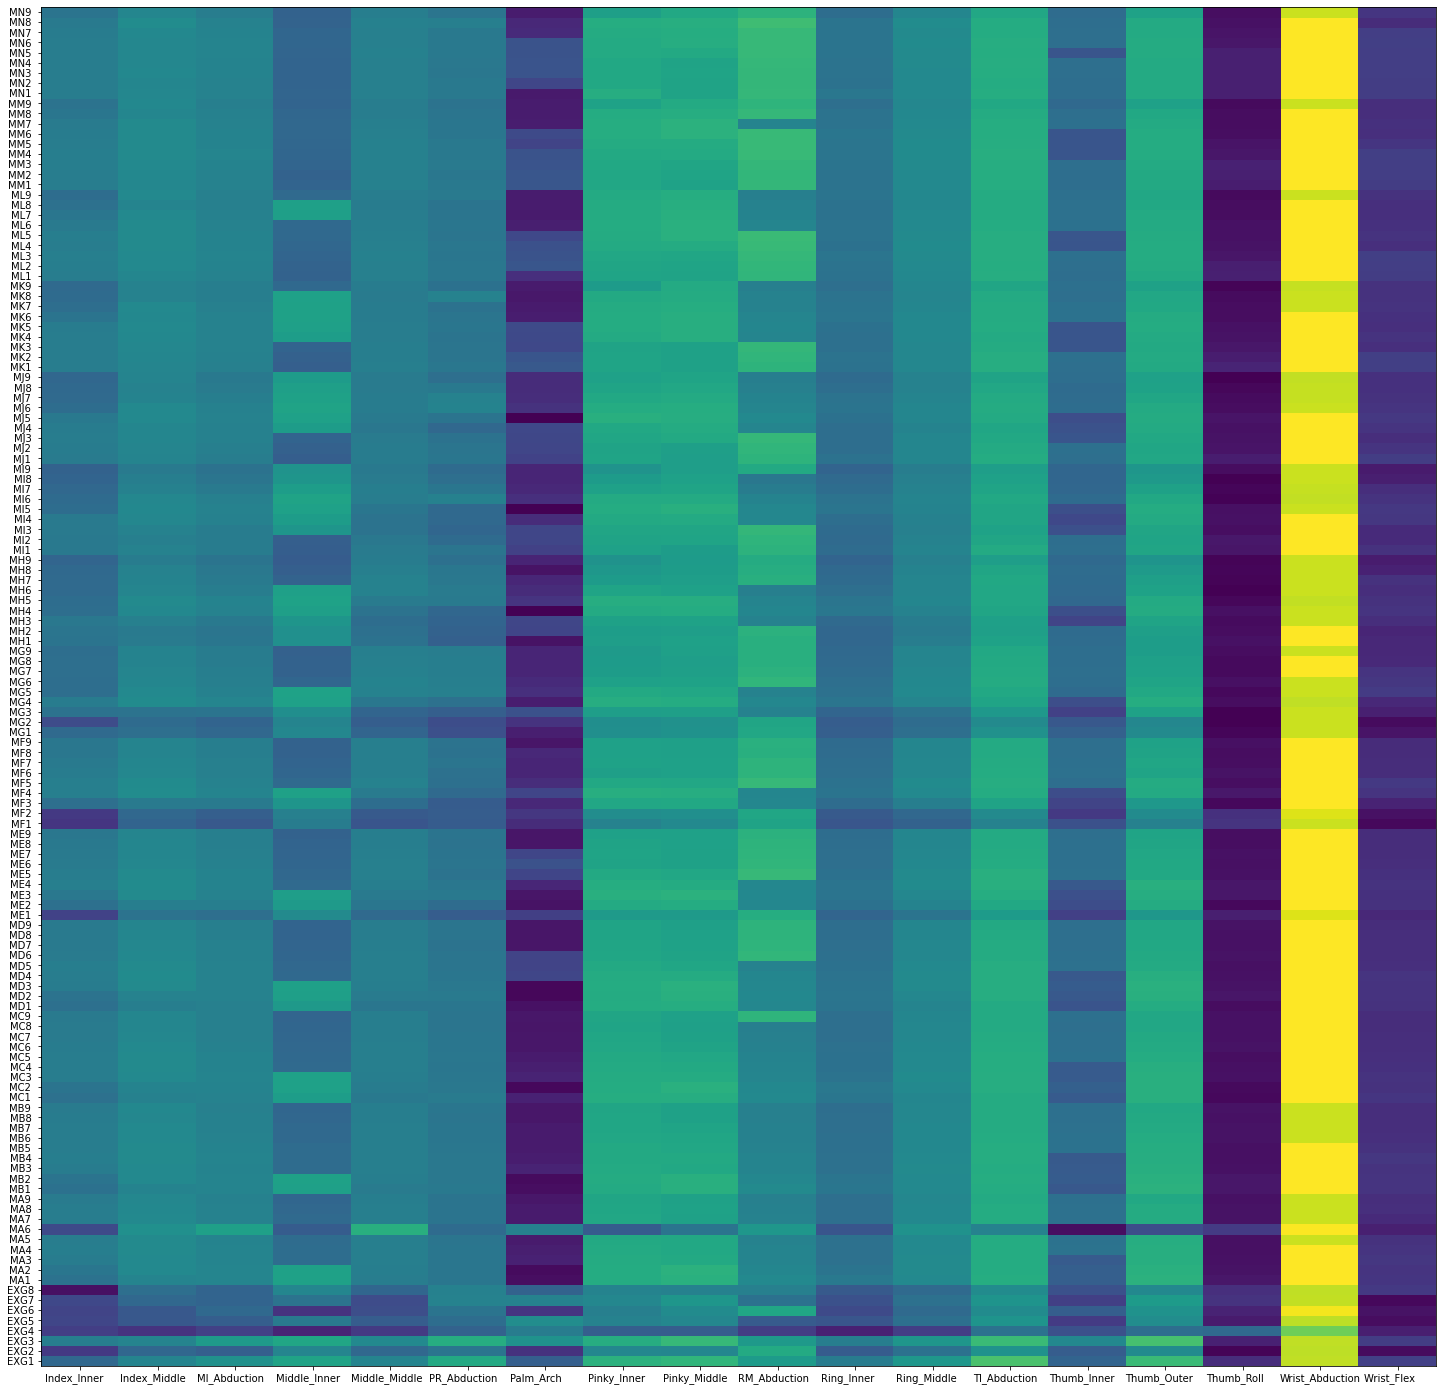

subj: 24
subj: todos
  speed =="fast" & movement =="point"


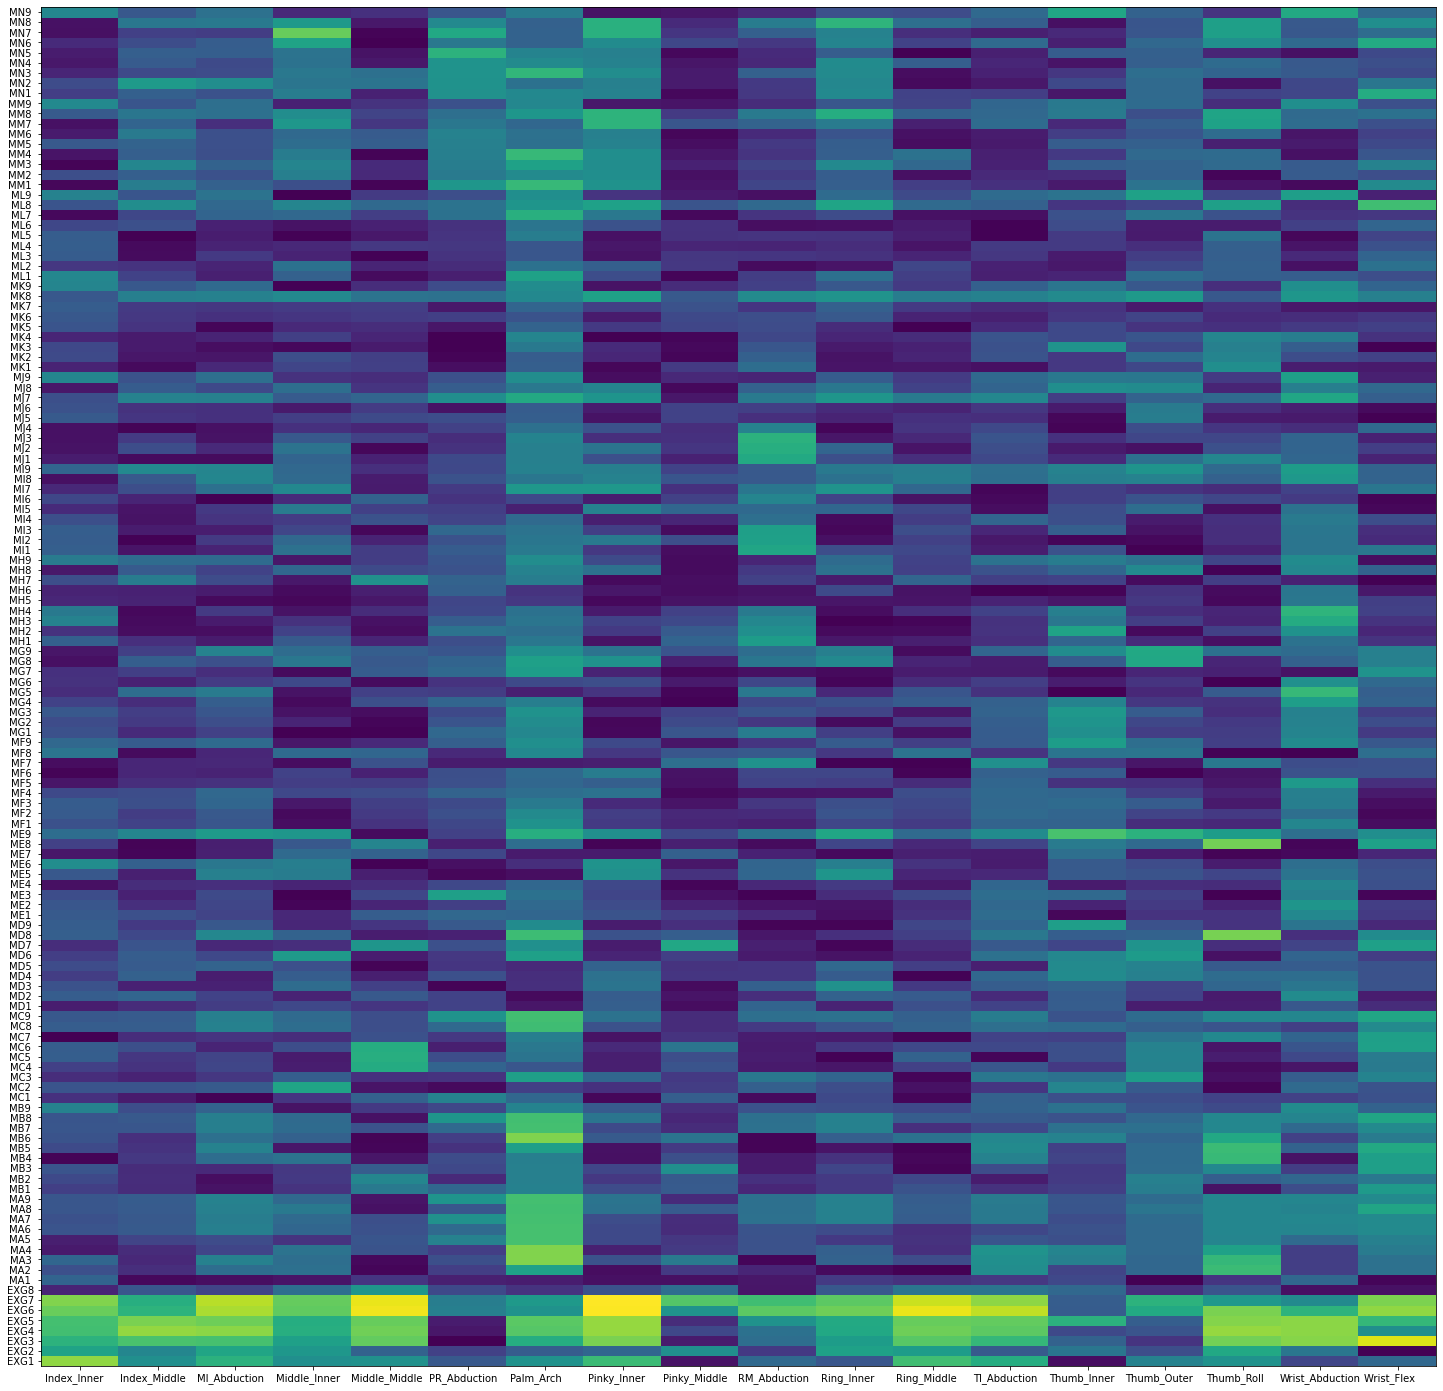

subj: 25
subj: todos
  speed =="fast" & movement =="point"


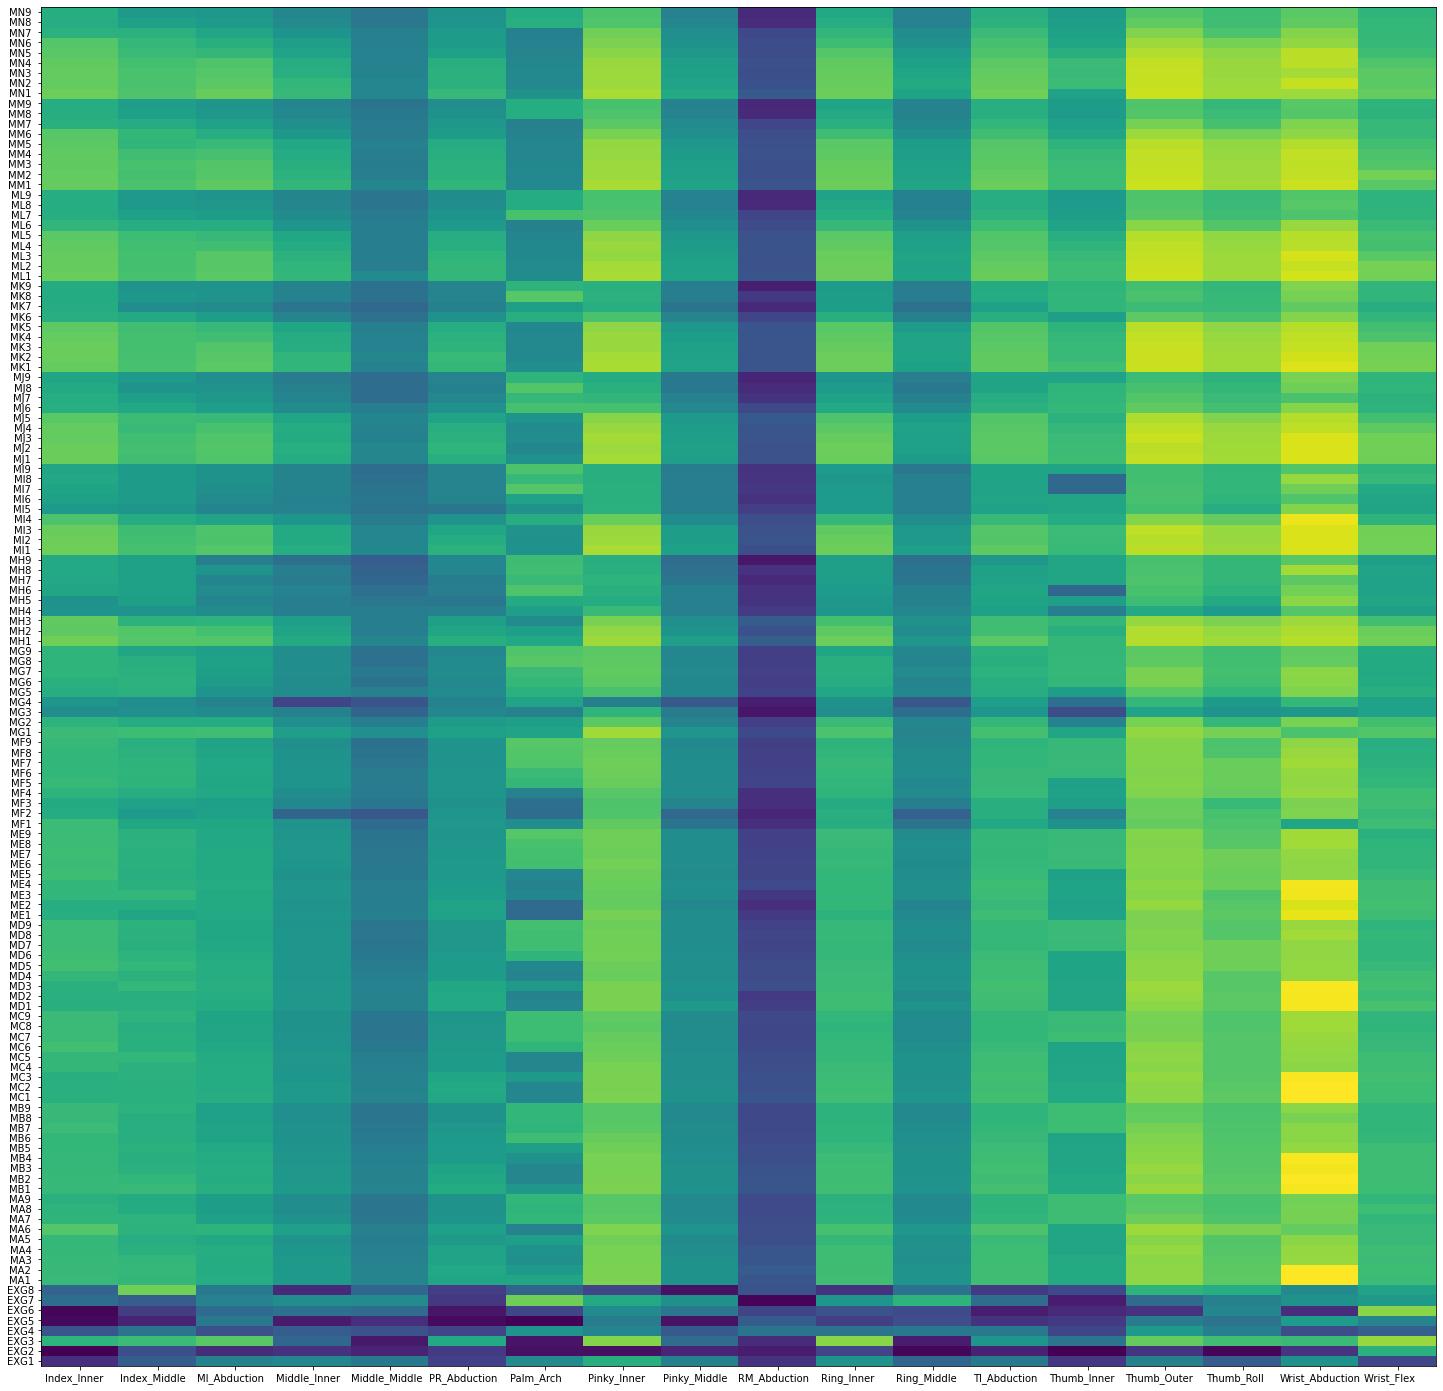

In [ ]:
movimento = 'point'
speed = 'fast'

matriz = dict()
tabela = dict()

for j in np.arange(1,26) :
  tabelas_correlacao_dict[j] = tabelas_correlacao_dict[j].dropna()
  tabelas_correlacao_dict[j]['correlacao'] = tabelas_correlacao_dict[j]['correlacao'].astype(np.float64)
  tabela = tabelas_correlacao_dict[j].groupby(['channels_emg','channels_glove', 'movement'])['correlacao'].mean()

  print("subj:", j)

  tabela["subj"+str(j), movimento, speed] = selecionar(tabelas_correlacao_dict[j], speedx= speed, movementx= movimento)

  matriz["subj"+str(j), movimento, speed] = pd.pivot_table(tabela["subj"+str(j), movimento, speed], values='correlacao', index='channels_emg', columns='channels_glove')
    
  plt.figure(figsize=(25,25))
  plt.pcolor(matriz["subj"+str(j), movimento, speed].abs())
  plt.yticks(np.arange(0.5, len(matriz["subj"+str(j), movimento, speed].index), 1), matriz["subj"+str(j), movimento, speed].index)
  plt.xticks(np.arange(0.5, len(matriz["subj"+str(j), movimento, speed].columns), 1), matriz["subj"+str(j), movimento, speed].columns)
  plt.show()

index                 49
channels_emg        MF5 
Media           0.318793
letra_emg              F
numero_emg             5
Name: 76, dtype: object


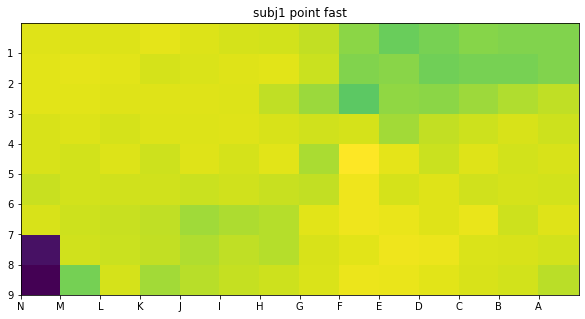

index                 99
channels_emg        ML1 
Media           0.303988
letra_emg              L
numero_emg             1
Name: 26, dtype: object


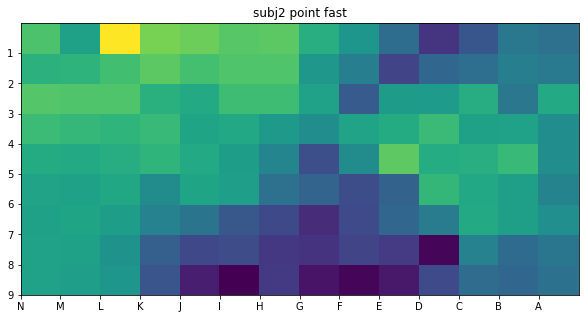

index                120
channels_emg        MN4 
Media           0.289641
letra_emg              N
numero_emg             4
Name: 5, dtype: object


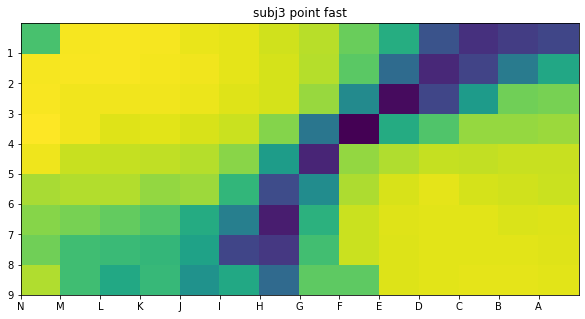

index                  1
channels_emg        MA2 
Media           0.307846
letra_emg              A
numero_emg             2
Name: 124, dtype: object


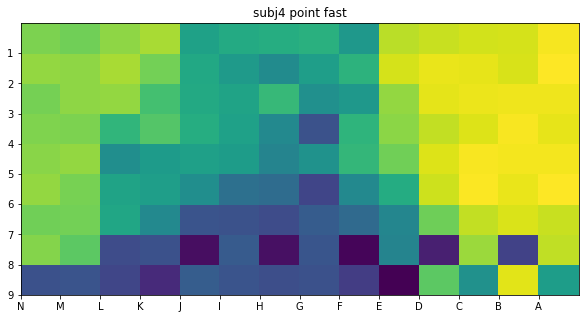

index                  6
channels_emg        MA7 
Media           0.302469
letra_emg              A
numero_emg             7
Name: 119, dtype: object


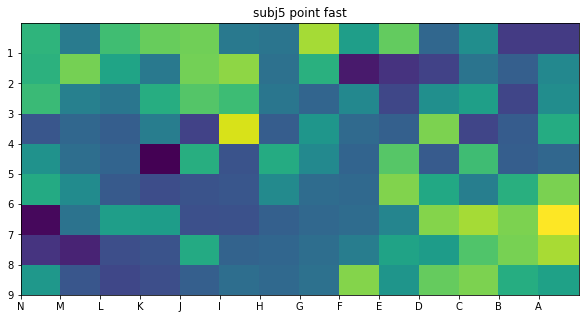

index                 16
channels_emg        MB8 
Media           0.288894
letra_emg              B
numero_emg             8
Name: 109, dtype: object


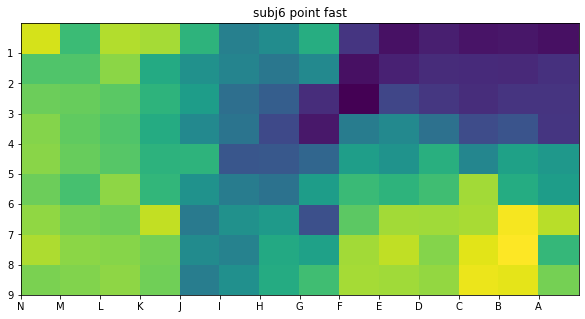

index                113
channels_emg        MM6 
Media           0.358941
letra_emg              M
numero_emg             6
Name: 12, dtype: object


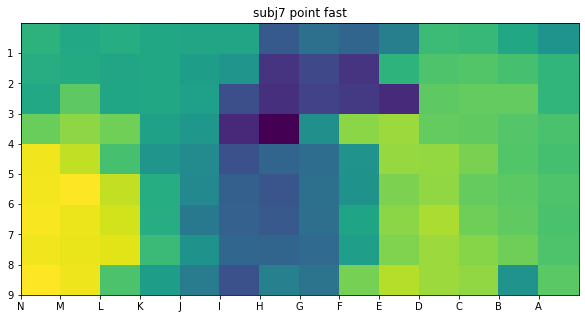

index                 55
channels_emg        MG2 
Media           0.389034
letra_emg              G
numero_emg             2
Name: 70, dtype: object


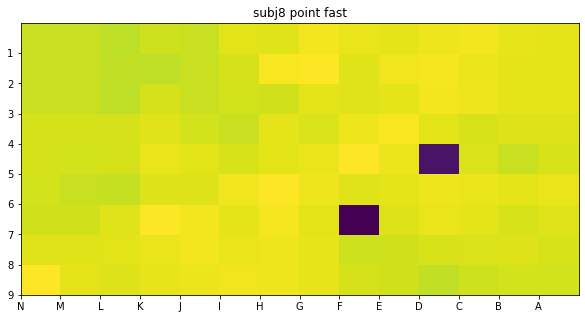

index                120
channels_emg        MN4 
Media           0.249445
letra_emg              N
numero_emg             4
Name: 5, dtype: object


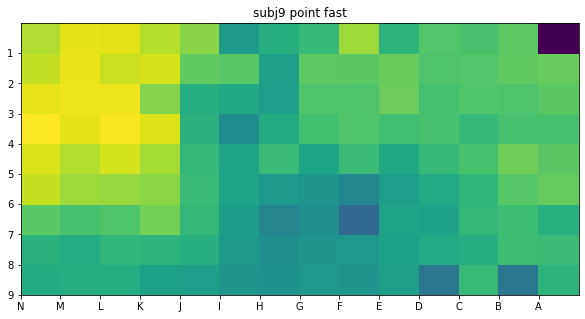

index                 43
channels_emg        ME8 
Media           0.278815
letra_emg              E
numero_emg             8
Name: 82, dtype: object


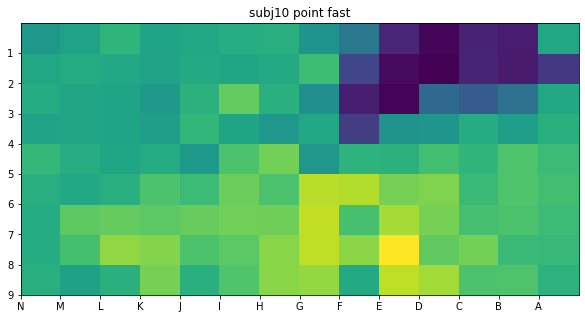

index                 75
channels_emg        MI4 
Media           0.283999
letra_emg              I
numero_emg             4
Name: 50, dtype: object


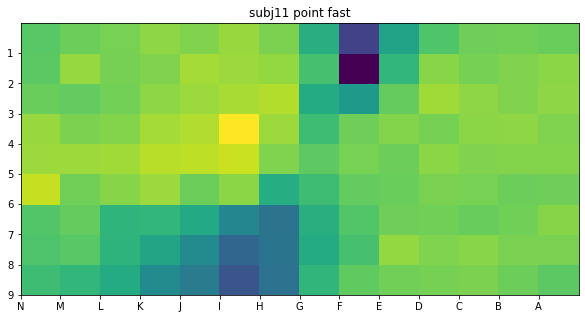

index                125
channels_emg        MN9 
Media           0.253762
letra_emg              N
numero_emg             9
Name: 0, dtype: object


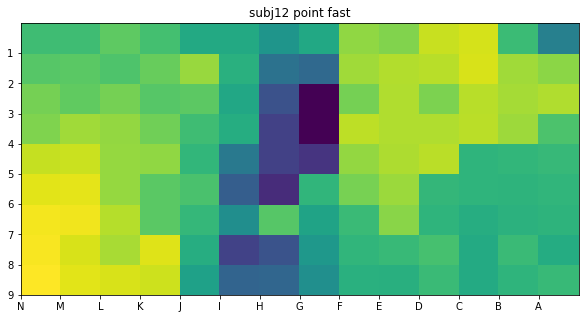

index                117
channels_emg        MN1 
Media           0.291522
letra_emg              N
numero_emg             1
Name: 8, dtype: object


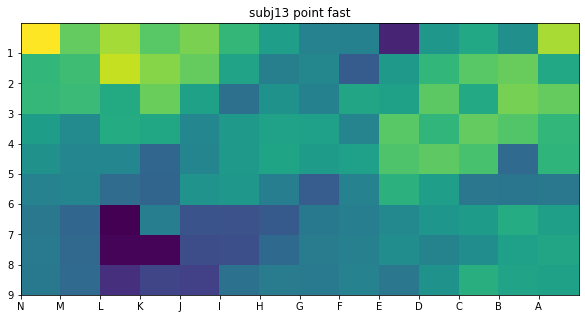

index                  7
channels_emg        MA8 
Media           0.378617
letra_emg              A
numero_emg             8
Name: 118, dtype: object


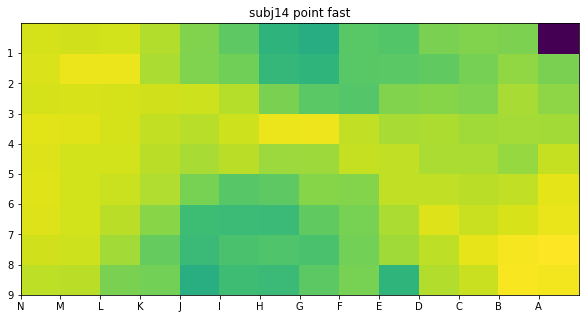

index                 71
channels_emg        MH9 
Media           0.291594
letra_emg              H
numero_emg             9
Name: 54, dtype: object


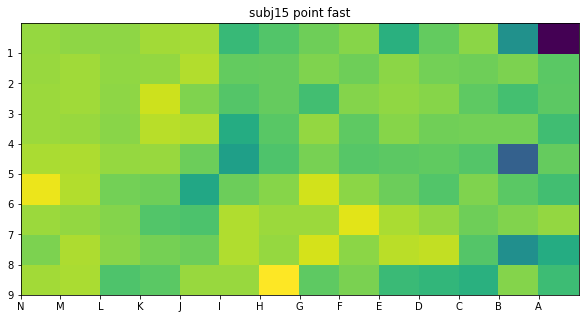

index                 54
channels_emg        MG1 
Media           0.274547
letra_emg              G
numero_emg             1
Name: 71, dtype: object


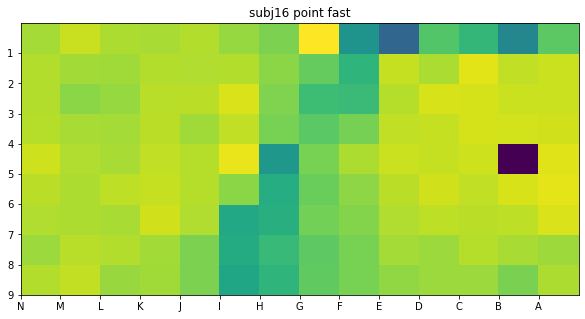

index                 81
channels_emg        MJ1 
Media           0.175781
letra_emg              J
numero_emg             1
Name: 44, dtype: object


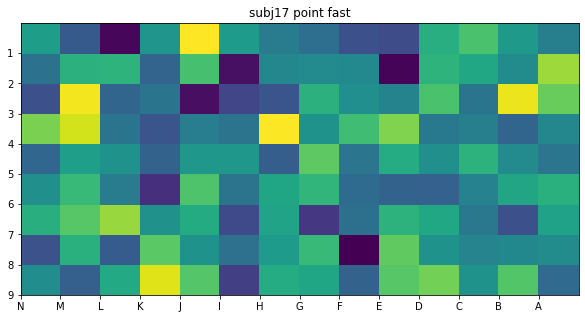

index                 91
channels_emg        MK2 
Media           0.248264
letra_emg              K
numero_emg             2
Name: 34, dtype: object


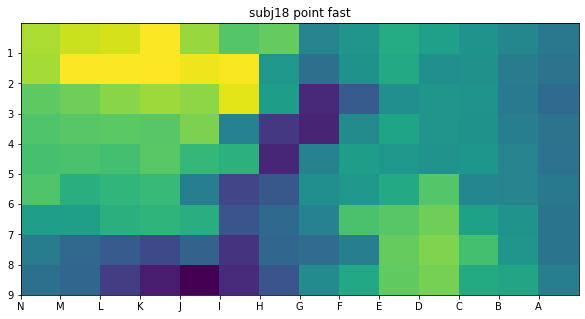

index                 36
channels_emg        ME1 
Media           0.205464
letra_emg              E
numero_emg             1
Name: 89, dtype: object


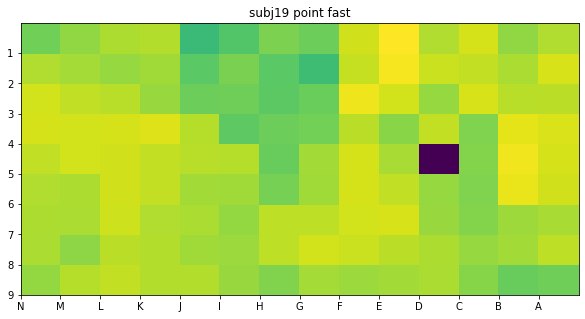

index                 72
channels_emg        MI1 
Media           0.309245
letra_emg              I
numero_emg             1
Name: 53, dtype: object


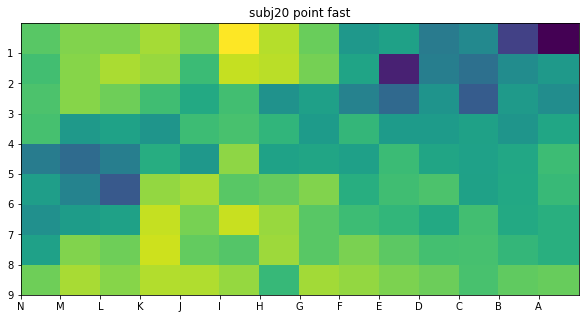

index                 73
channels_emg        MI2 
Media           0.272208
letra_emg              I
numero_emg             2
Name: 52, dtype: object


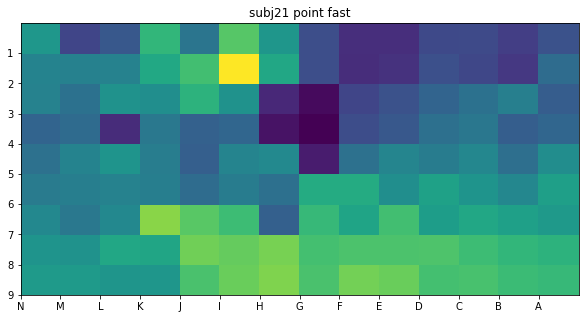

index                117
channels_emg        MN1 
Media           0.264202
letra_emg              N
numero_emg             1
Name: 8, dtype: object


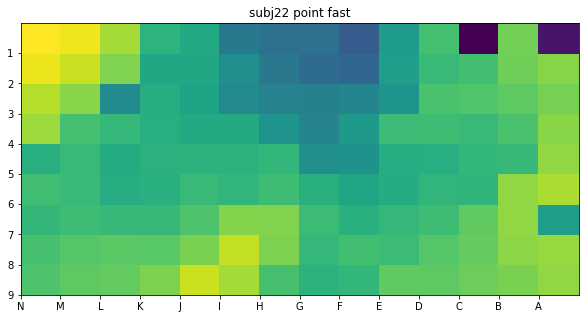

index                122
channels_emg        MN6 
Media           0.232784
letra_emg              N
numero_emg             6
Name: 3, dtype: object


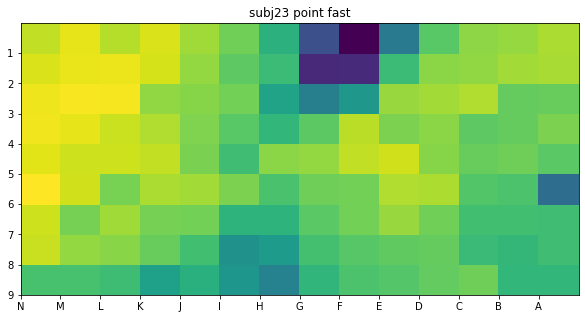

index                 44
channels_emg        ME9 
Media           0.204716
letra_emg              E
numero_emg             9
Name: 81, dtype: object


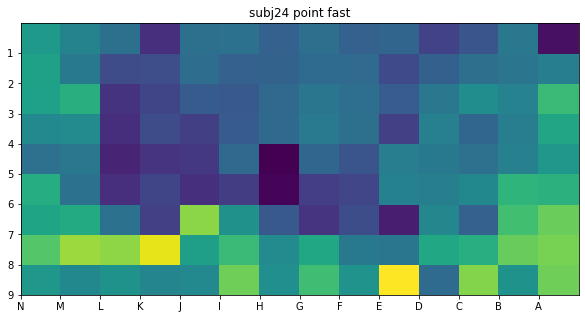

In [ ]:
media_matriz = dict()
tabela_media_matriz = dict()
tabela_media_matriz_ordenada = dict()
matriz_HD_sEMG = dict()

for i in np.arange(1,25) :
  media_matriz["subj"+str(i), movimento, speed] = matriz["subj"+str(i), movimento, speed].iloc[8:].abs().mean(axis = 1)
  tabela_media_matriz["subj"+str(i), movimento, speed] = media_matriz["subj"+str(i), movimento, speed].reset_index(name='Media')

  for j in range(len(tabela_media_matriz["subj"+str(i), movimento, speed])) :
    tabela_media_matriz["subj"+str(i), movimento, speed].loc[j,'letra_emg'] = tabela_media_matriz["subj"+str(i), movimento, speed]['channels_emg'][j][1]
    tabela_media_matriz["subj"+str(i), movimento, speed].loc[j,'numero_emg']= tabela_media_matriz["subj"+str(i), movimento, speed]['channels_emg'][j][2]

  x = tabela_media_matriz["subj"+str(i), movimento, speed].sort_values(by=['letra_emg', 'numero_emg'], ascending=[False, False])
  tabela_media_matriz_ordenada["subj"+str(i), movimento, speed] = x.reset_index()

  matriz_HD_sEMG["subj"+str(i), movimento, speed] = np.zeros((9, 14))
  contador= 0
  
  max = tabela_media_matriz_ordenada["subj"+str(i), movimento, speed].loc[tabela_media_matriz_ordenada["subj"+str(i), movimento, speed]['Media'].idxmax()]
  print(max)

  for c in np.arange(0,14):
    for l in np.arange(0,9):
      matriz_HD_sEMG["subj"+str(i), movimento, speed][l, c] = tabela_media_matriz_ordenada["subj"+str(i), movimento, speed]['Media'][contador]
      contador = contador + 1

  plt.figure(figsize=(10,5))
  plt.title("subj"+str(i) + " " + movimento + " " + speed)
  plt.pcolor(matriz_HD_sEMG["subj"+str(i), movimento, speed])
  plt.xticks(ticks = np.arange(0, 14), labels = tabela_media_matriz_ordenada["subj"+str(i), movimento, speed]['letra_emg'].unique())
  plt.yticks(ticks = np.arange(0,9), labels = np.arange(9,0,-1))
  plt.show()